$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Ejercicio práctico | Challenge 8 Redes Neuronales LSTM}$$

_Profesor: Moisés Meza, Jesus Alvarado_

_Alumnos: Luis Revilla, Sebastian Ríos, Emilio Ochoa_

De acuerdo con el material revisado en clase [5,6], nuestro desafío consiste en la generación de moléculas empleando LSTM, buscando encontrar aquellas con la mayor afinidad por la proteasa principal del SARS-CoV-2.

## Arquitectura y Funcionamiento de LSTM

Las redes neuronales LSTM (Long Short-Term Memory), han demostrado ser una herramienta prometedora en la generación de moléculas con propiedades deseadas.


La arquitectura LSTM es un tipo de red neuronal recurrente que ha mostrado excelentes resultados en la modelización de secuencias y la generación de datos secuenciales. A diferencia de las redes neuronales tradicionales, las LSTM son capaces de aprender y recordar información a largo plazo, lo que las hace especialmente adecuadas para tareas que involucran dependencias temporales y contextos complejos.

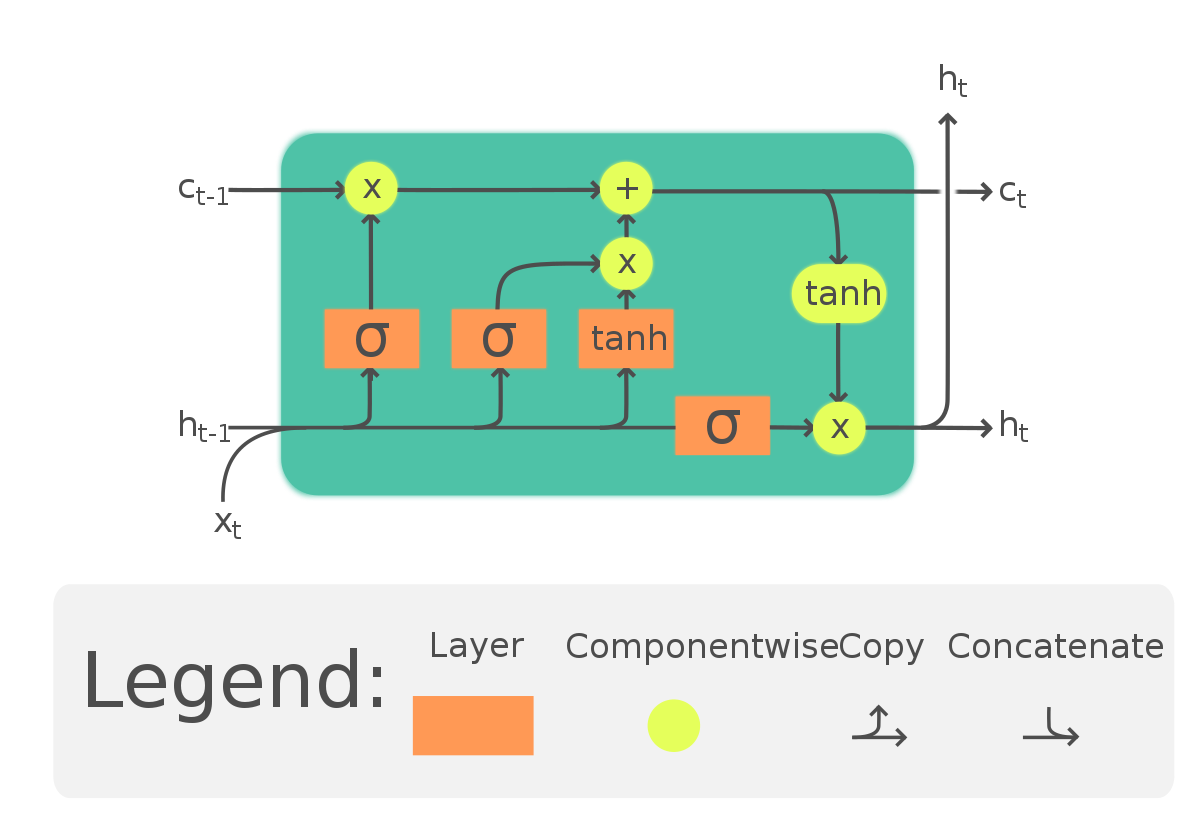

En el presente trabajo, se propone utilizar LSTM para la generación de moléculas con alta afinidad por la proteasa principal del SARS-CoV-2. Esta elección se justifica por la capacidad de las LSTM para capturar patrones y dependencias en secuencias, lo que les permite aprender la estructura y las propiedades de las moléculas de manera más efectiva.

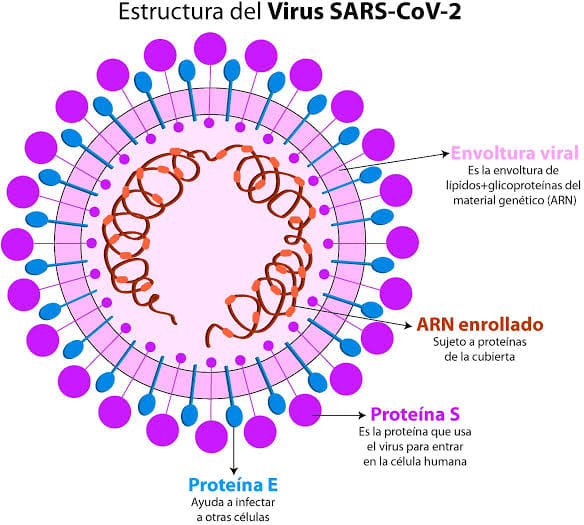

Sin embargo, existen otras metodologías que podrían abordarse en investigaciones futuras. Por ejemplo, las redes generativas adversariales (GANs) y los autoencoders variacionales (VAEs) también han demostrado ser eficaces en la generación de moléculas y podrían ser consideradas como enfoques alternativos o complementarios.

## Diagrama de Flujo

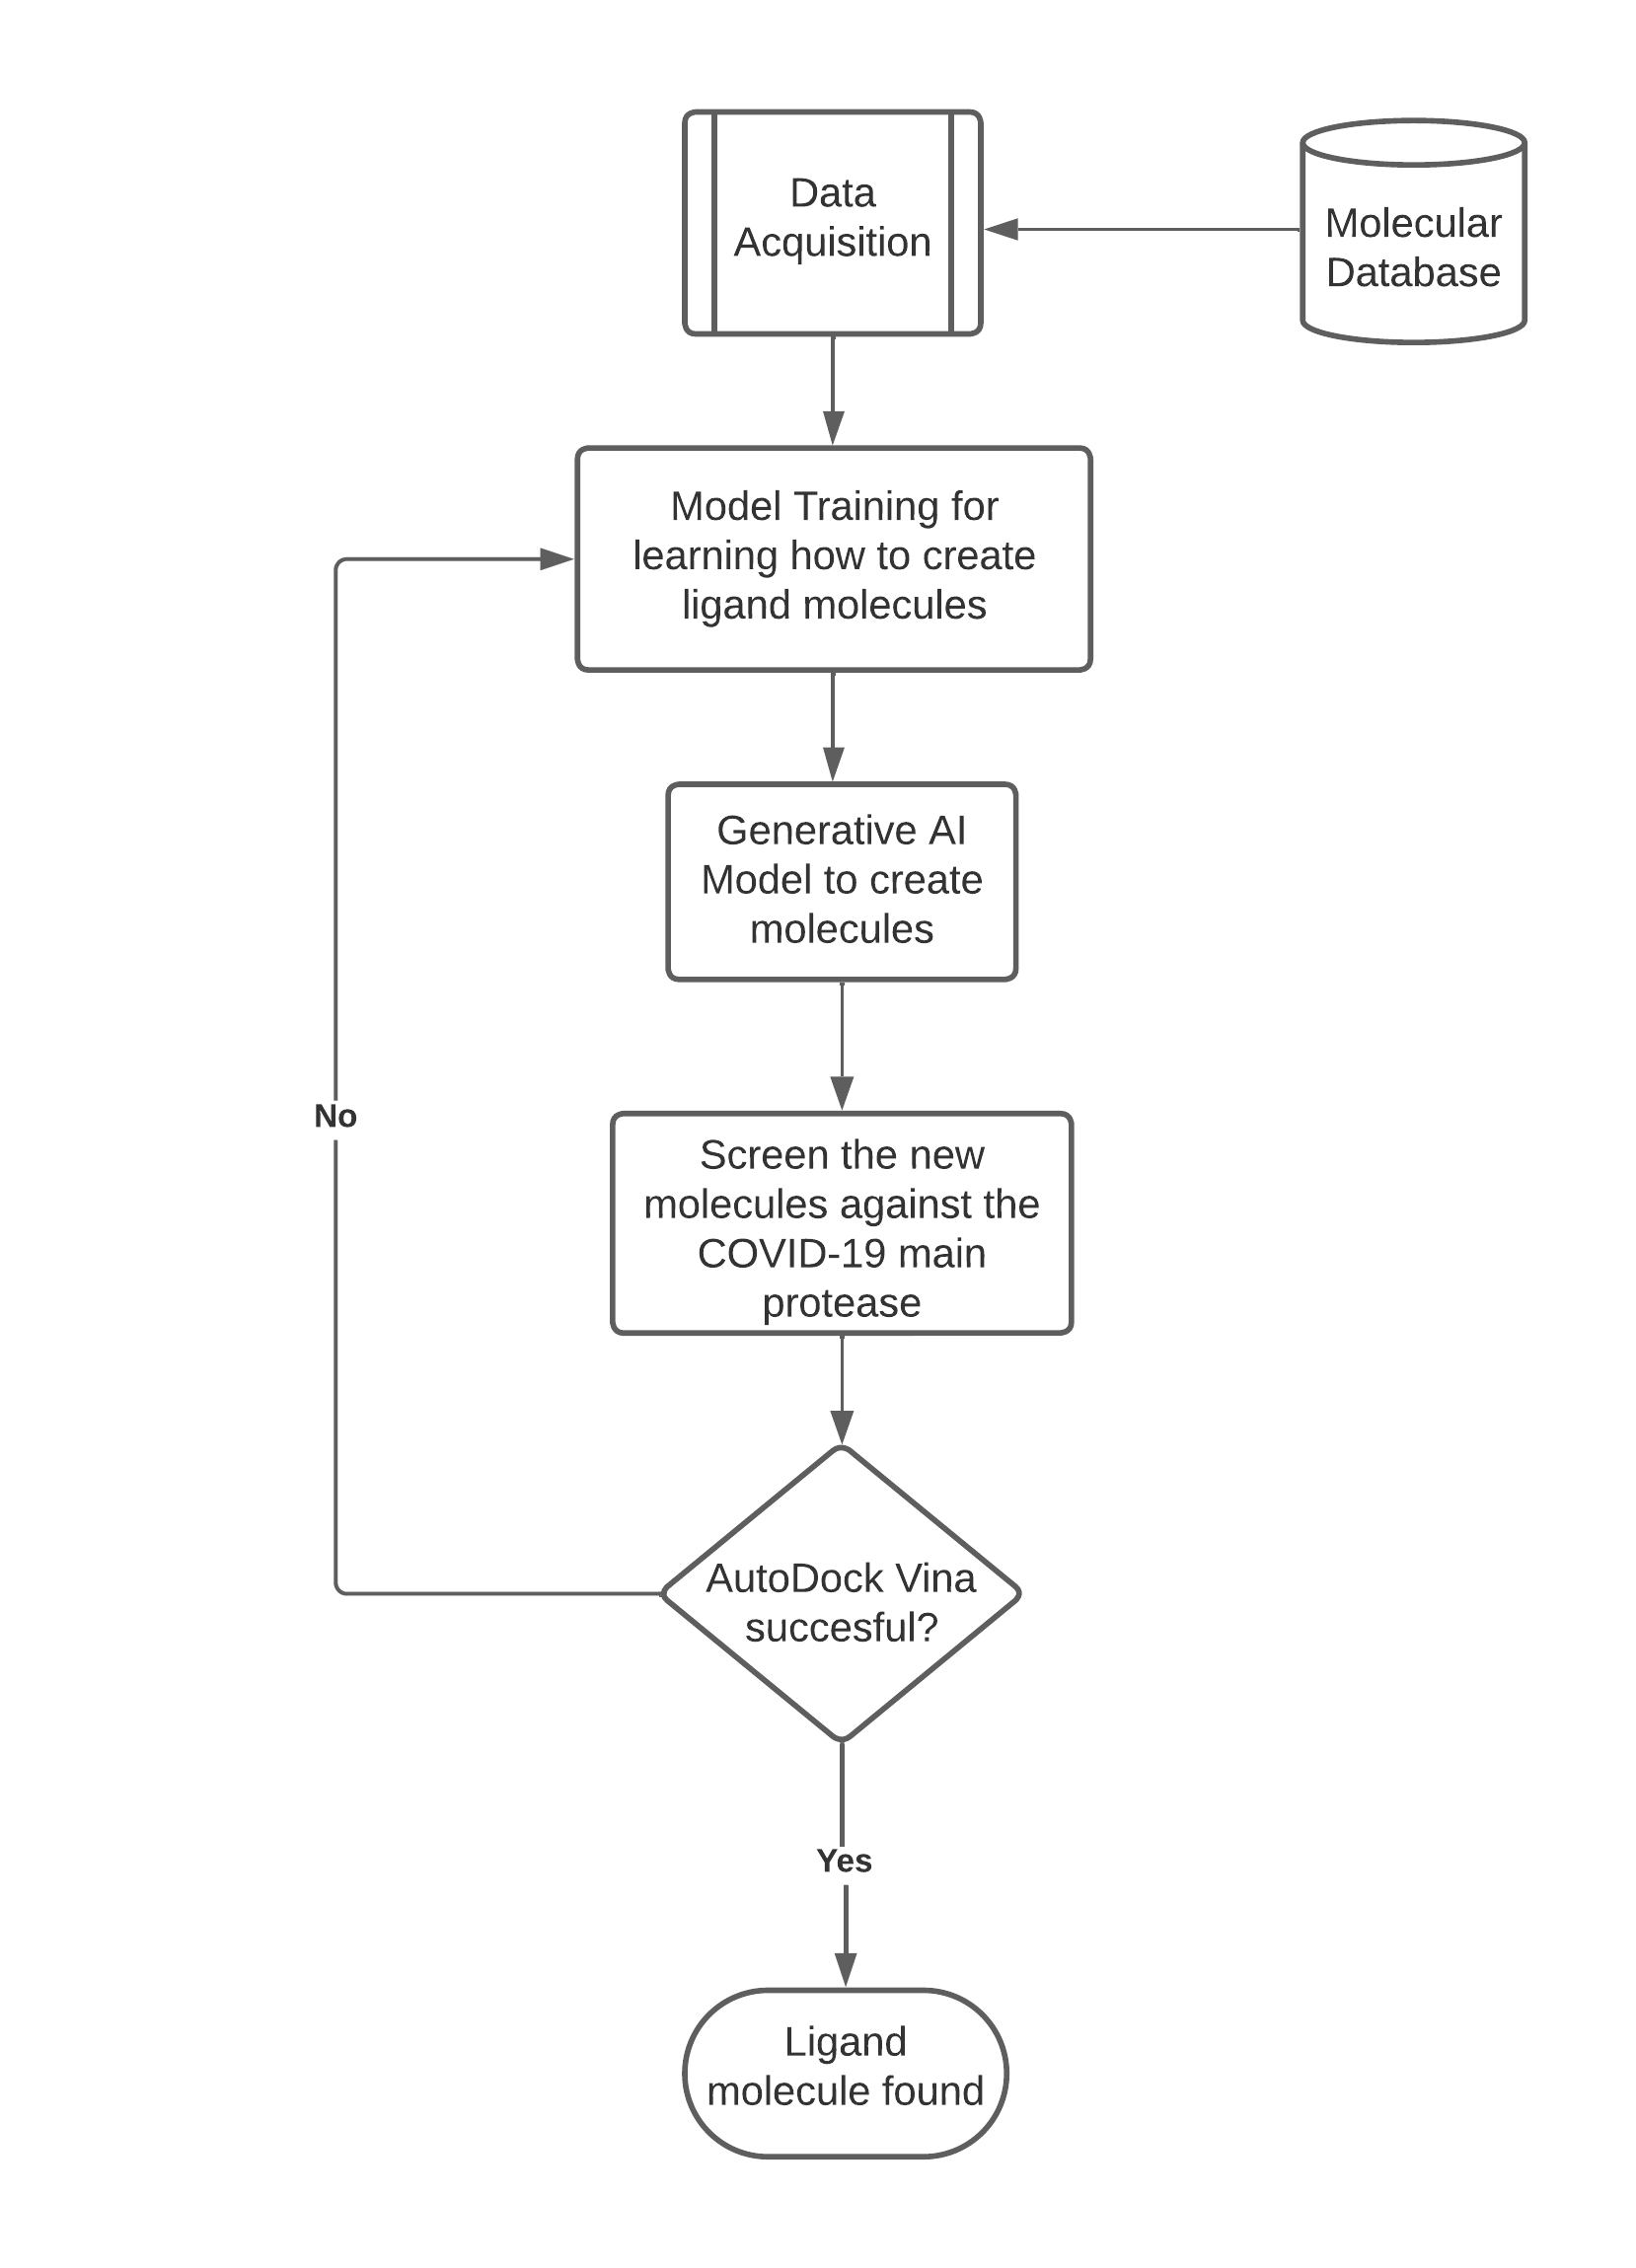

1. **Obtención y preparación de los datos de entrenamiento de moléculas**: En esta etapa, se recopilan los datos necesarios para entrenar el modelo de IA. Estos datos consisten en moléculas existentes con información sobre su estructura y propiedades.

2. **Creación de un modelo de red neuronal y entrenamiento para la generación de moléculas**: Se diseña y se entrena un modelo de red neuronal utilizando los datos de entrenamiento recopilados en el paso anterior. El objetivo es enseñar al modelo a generar nuevas moléculas con características deseables.

3. **Desarrollo de un modelo de IA generativo y creación de nuevas moléculas**: Se desarrolla un modelo de IA generativo que utiliza el modelo de red neuronal entrenado en el paso anterior. Este modelo generativo es capaz de crear nuevas moléculas basadas en el conocimiento adquirido durante el entrenamiento.

4. **Evaluación virtual de las nuevas moléculas frente a la proteasa principal del COVID-19**: Las nuevas moléculas generadas son sometidas a una evaluación virtual para determinar su afinidad con la proteasa principal del COVID-19. Este paso permite identificar aquellas moléculas que podrían tener un potencial para ser utilizadas en tratamientos contra el virus.

5. **Transferencia de aprendizaje para entrenar el modelo de red neuronal en una tarea más específica**: Se utiliza la técnica de transferencia de aprendizaje para ajustar y entrenar el modelo de red neuronal en una tarea más específica, como la predicción de la actividad inhibitoria de las moléculas frente a la proteasa principal del COVID-19. Esto permite mejorar la capacidad predictiva del modelo.

6. **Generación de nuevas moléculas utilizando el modelo generativo de IA**: Se generan nuevas moléculas utilizando el modelo generativo de IA entrenado en pasos anteriores. Estas moléculas son potenciales candidatas para ser evaluadas en investigaciones adicionales o ensayos clínicos.

7. **Evaluación virtual de las nuevas moléculas frente a la proteasa principal del COVID-19**: Se realiza una evaluación virtual de las nuevas moléculas generadas en el paso anterior para determinar su afinidad y potencial capacidad de inhibición frente a la proteasa principal del COVID-19. Este análisis proporciona información importante sobre la efectividad de las nuevas moléculas generadas.

## Cargado de librerías

In [ ]:
!git clone https://github.com/BLarzalere/AI-De-Novo-Molecule-Design.git

Cloning into 'AI-De-Novo-Molecule-Design'...
remote: Enumerating objects: 173, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 173 (delta 39), reused 65 (delta 33), pack-reused 100
Receiving objects: 100% (173/173), 30.57 MiB | 17.15 MiB/s, done.
Resolving deltas: 100% (67/67), done.


In [ ]:
# install rdkit
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

In [ ]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 51.1 MB/s eta 0:00:00


In [ ]:
# import core libraries
import sys
import os
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import train_test_split
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors
import random as rn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


In [ ]:
# Cargar Keras libraries
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Concatenate
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from tensorflow.keras.utils import Sequence

Descargamos el dataset del github. Los datos de moléculas utilizados para entrenar nuestra red neuronal estarán en el formato Simplified Molecular Input Line Entry System o "SMILES". Se trata de una especificación para describir la estructura de entidades químicas mediante una combinación de caracteres, números y caracteres especiales.

In [ ]:
!wget https://raw.githubusercontent.com/BLarzalere/AI-De-Novo-Molecule-Design/master/Generated_SMILES/gen3/generated_smiles_v3.csv

--2023-06-17 20:28:33--  https://raw.githubusercontent.com/BLarzalere/AI-De-Novo-Molecule-Design/master/Generated_SMILES/gen3/generated_smiles_v3.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 130932 (128K) [text/plain]
Saving to: ‘generated_smiles_v3.csv’

generated_smiles_v3 100%[===================>] 127.86K  --.-KB/s    in 0.02s   

2023-06-17 20:28:33 (5.43 MB/s) - ‘generated_smiles_v3.csv’ saved [130932/130932]



In [ ]:
# enable GPU processing
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Found GPU at: /device:GPU:0
Sat Jun 17 18:47:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    28W /  70W |    387MiB / 15360MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                            

In [ ]:
# Crear las funciones para el cargado de datos
def load_data(data):
    with open(data, 'r') as f:
        smiles = [r.rstrip() for r in f]
    return np.array(smiles)

def load_dictionaries(input_dict):
    with open(input_dict, 'r') as fp:
        new_dict = json.load(fp)
    return new_dict

In [ ]:
!ls

AI-De-Novo-Molecule-Design  sample_data  smiles_cleaned.smi


## LST Model

In [ ]:
# Cargar el dataset y separar los datos de train/test
smifile = '/content/AI-De-Novo-Molecule-Design/Data/smiles_cleaned.smi'
data = load_data(smifile)
seed = 777
full_train, test = train_test_split(data, test_size=0.2, random_state=seed)
print("Training smiles shape:", full_train.shape)
print("Test smiles shape:", test.shape)
print("Sample training smile: \n", full_train[2])

Training smiles shape: (351278,)
Test smiles shape: (87820,)
Sample training smile: 
 Cc1cc(Oc2ccc(-c3nc4cc(C(N)=O)ccc4[nH]3)cc2)ccc1F


In [ ]:
data.shape

(439098,)

In [ ]:
# create our validation dataset
val_split = 0.10
train, val_set = train_test_split(full_train, test_size=val_split, random_state=seed)
print("Training dataset shape:", train.shape)
print("Validation dataset shape:", val_set.shape)

Training dataset shape: (316150,)
Validation dataset shape: (35128,)


In [ ]:
# load the Python dictionaries that map characters-to-integers and intergers-to-characters
d1 = '/content/AI-De-Novo-Molecule-Design/Data/char_to_int.json'
d2 = '/content/AI-De-Novo-Molecule-Design/Data/int_to_char.json'
char_to_int = load_dictionaries(d1)
int_to_char = load_dictionaries(d2)
n_vocab = len(char_to_int)
print("Character set vocabulary length:", n_vocab)
print("Dictionary mapping characters-to-integers:\n", char_to_int)
print("Dictionary mapping integers-to-characters:\n", int_to_char)

Character set vocabulary length: 45
Dictionary mapping characters-to-integers:
 {'n': 0, '[': 1, '\\': 2, 'E': 3, 'H': 4, ')': 5, 'B': 6, '9': 7, '2': 8, ']': 9, '7': 10, '!': 11, 't': 12, 's': 13, 'o': 14, 'c': 15, 'K': 16, '-': 17, '/': 18, 'l': 19, 'A': 20, 'r': 21, '@': 22, 'C': 23, '=': 24, '6': 25, 'N': 26, 'L': 27, 'a': 28, '5': 29, 'S': 30, 'T': 31, '#': 32, '+': 33, 'P': 34, 'i': 35, '(': 36, '8': 37, '1': 38, 'I': 39, 'e': 40, 'O': 41, '3': 42, 'F': 43, '4': 44}
Dictionary mapping integers-to-characters:
 {'0': 'n', '1': '[', '2': '\\', '3': 'E', '4': 'H', '5': ')', '6': 'B', '7': '9', '8': '2', '9': ']', '10': '7', '11': '!', '12': 't', '13': 's', '14': 'o', '15': 'c', '16': 'K', '17': '-', '18': '/', '19': 'l', '20': 'A', '21': 'r', '22': '@', '23': 'C', '24': '=', '25': '6', '26': 'N', '27': 'L', '28': 'a', '29': '5', '30': 'S', '31': 'T', '32': '#', '33': '+', '34': 'P', '35': 'i', '36': '(', '37': '8', '38': '1', '39': 'I', '40': 'e', '41': 'O', '42': '3', '43': 'F', '44

In [ ]:
# create a function to turn the dataset into a supervised problem, add the beginning and ending character markers,
# add padding for constant sequence length, and turn the sequence into a sequence of one-hot vectors
def vectorize(smiles, embed, n_vocab):
    one_hot = np.zeros((smiles.shape[0], embed, n_vocab), dtype=np.int8)
    for i, smile in enumerate(smiles):
        # encode the start
        one_hot[i,0,char_to_int["!"]] = 1
        #encode the smiles characters
        for j, c in enumerate(smile):
            one_hot[i,j+1,char_to_int[c]] = 1
        # encode the end of the smiles string
        one_hot[i,len(smile)+1:,char_to_int["E"]] = 1
    # return two items, one for input and one for output
    return one_hot[:,0:-1,:], one_hot[:,1:,:]

In [ ]:
# create our X & y datasets
embed = 101
X_train, y_train = vectorize(train, embed, n_vocab)
X_val, y_val = vectorize(val_set, embed, n_vocab)
X_test, y_test = vectorize(test, embed, n_vocab)
print("Training input shape:", X_train.shape)
print("Training output shape:", y_train.shape)
print("Validation input shape:", X_val.shape)
print("Validation output shape:", y_val.shape)
print("Test input shape:", X_test.shape)
print("Test output shape:", y_test.shape)


Training input shape: (316150, 100, 45)
Training output shape: (316150, 100, 45)
Validation input shape: (35128, 100, 45)
Validation output shape: (35128, 100, 45)
Test input shape: (87820, 100, 45)
Test output shape: (87820, 100, 45)


In [ ]:
"".join([int_to_char[str(idx)] for idx in np.argmax(X_train[0,:,:], axis=1)])

'!O=c1ccc(OCCCN2CCN(c3csc4ccccc34)CC2)nn1-c1ccc(Cl)c(Cl)c1EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE'

In [ ]:
# define the LSTM Chem model
def lstm_model(X, y):
    # define the encoder layers
    enc_input = Input(shape=(X.shape[1:]))
    _, state_h, state_c = LSTM(256, return_state=True)(enc_input)
    states = Concatenate(axis=-1)([state_h, state_c])
    bottle_neck = Dense(128, activation='relu')(states)

    # define the decoder layers
    state_h_decoded = Dense(256, activation='relu')(bottle_neck)
    state_c_decoded = Dense(256, activation='relu')(bottle_neck)
    encoder_states = [state_h_decoded, state_c_decoded]
    dec_input = Input(shape=(X.shape[1:]))
    dec1 = LSTM(256, return_sequences=True)(dec_input, initial_state=encoder_states)
    output = Dense(y.shape[2], activation='softmax')(dec1)

    model = Model(inputs=[enc_input, dec_input], outputs=output)
    return model

In [ ]:
# instantiate our neural network model
model = lstm_model(X_train, y_train)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 45)]    0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 256),        309248      ['input_1[0][0]']                
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                                  
 concatenate (Concatenate)      (None, 512)          0           ['lstm[0][1]',                   
                                                                  'lstm[0][2]']               

In [ ]:
# compile the model
batch_size = 256
steps_per_epoch = len(X_train) // batch_size
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(0.001, decay_steps=steps_per_epoch*50, decay_rate=1.0, staircase=False)
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# define our data sequence generator class
class Data_Generator(Sequence):
    def __init__(self, input_data, labels, batch_size):
        self.input_data, self.labels = input_data, labels
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.input_data) / float(self.batch_size)))

    def __getitem__(self, idx):
        x = self.input_data[idx * self.batch_size:(idx + 1) * self.batch_size]
        y = self.labels[idx * self.batch_size:(idx + 1) * self.batch_size]

        batch_x, batch_y = np.array(x), np.array(y)

        return [batch_x, batch_x], batch_y

In [ ]:
# create object instances of our sequence generator
training_generator = Data_Generator(X_train, y_train, batch_size)
validation_generator = Data_Generator(X_val, y_val, batch_size)

In [ ]:
# # create our callbacks
file="/content/AI-De-Novo-Molecule-Design/Data/LSTM_Chem_weights-{epoch:02d}-{acc:.4f}-{val_loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(file, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True, mode='min')
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-5)
tb = TensorBoard(log_dir="/drive/My Drive/logs/chem/", histogram_freq=1, write_graph=True, write_images=True)

In [ ]:
# fit the model
nb_epochs = 20
validation_steps = len(X_val) // batch_size
history = model.fit(training_generator, steps_per_epoch=steps_per_epoch, epochs=nb_epochs, verbose=1,
                              validation_data=validation_generator, validation_steps=validation_steps,
                             use_multiprocessing=False, shuffle=True, callbacks=[])

Epoch 1/20
1234/1234 [==============================] - 75s 53ms/step - loss: 0.7851 - acc: 0.7561 - val_loss: 0.5535 - val_acc: 0.8176
Epoch 2/20
1234/1234 [==============================] - 64s 52ms/step - loss: 0.4839 - acc: 0.8377 - val_loss: 0.4370 - val_acc: 0.8510
Epoch 3/20
1234/1234 [==============================] - 62s 50ms/step - loss: 0.4143 - acc: 0.8577 - val_loss: 0.3940 - val_acc: 0.8629
Epoch 4/20
1234/1234 [==============================] - 64s 52ms/step - loss: 0.3794 - acc: 0.8683 - val_loss: 0.3631 - val_acc: 0.8731
Epoch 5/20
1234/1234 [==============================] - 64s 52ms/step - loss: 0.3551 - acc: 0.8758 - val_loss: 0.3434 - val_acc: 0.8795
Epoch 6/20
1234/1234 [==============================] - 64s 52ms/step - loss: 0.3374 - acc: 0.8816 - val_loss: 0.3285 - val_acc: 0.8846
Epoch 7/20
1234/1234 [==============================] - 61s 49ms/step - loss: 0.3243 - acc: 0.8859 - val_loss: 0.3168 - val_acc: 0.8886
Epoch 8/20
1234/1234 [==========================

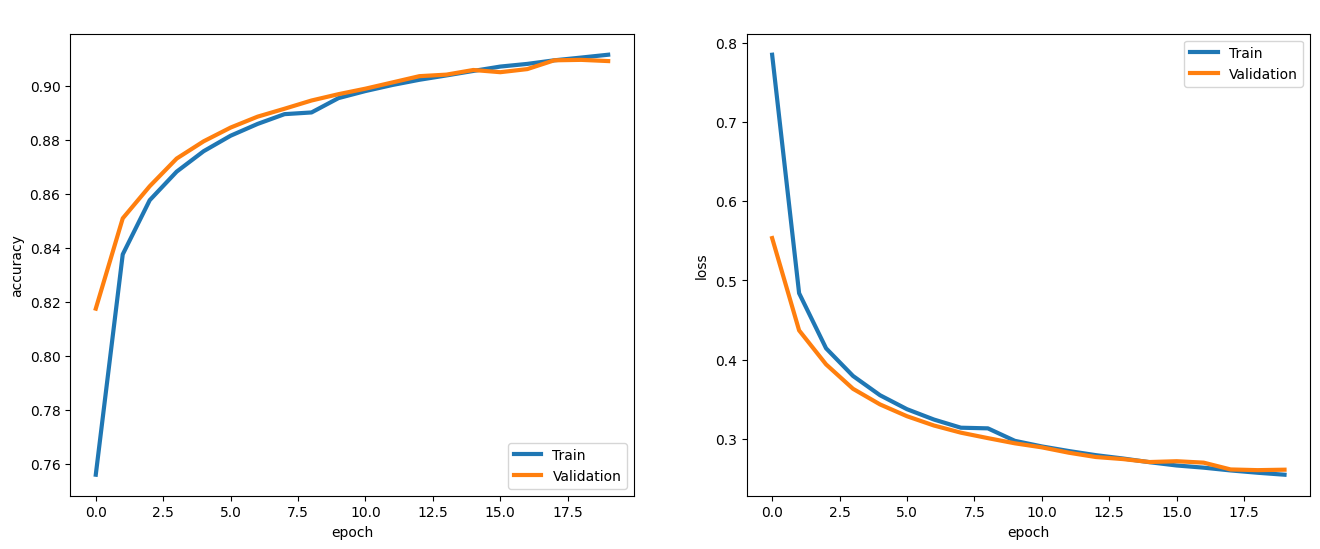

In [ ]:
# plot the model loss and accuracy
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

# summarize history for accuracy
axis1.plot(history.history["acc"], label='Train', linewidth=3)
axis1.plot(history.history["val_acc"], label='Validation', linewidth=3)
axis1.set_title('Model accuracy', fontsize=16, color="white")
axis1.set_ylabel('accuracy')
axis1.set_xlabel('epoch')
axis1.legend(loc='lower right')

# summarize history for loss
axis2.plot(history.history["loss"], label='Train', linewidth=3)
axis2.plot(history.history["val_loss"], label='Validation', linewidth=3)
axis2.set_title('Model loss', fontsize=16, color="white")
axis2.set_ylabel('loss')
axis2.set_xlabel('epoch')
axis2.legend(loc='upper right')
plt.show()

In [ ]:
# evaluate our test set
score, acc = model.evaluate([X_test, X_test], y_test, batch_size=batch_size, verbose=0)
print(f'Test score: {score}')
print(f'Test accuracy: {acc}')

Test score: 0.25994226336479187
Test accuracy: 0.9094939827919006


In [ ]:
# save our baseline training model & weights
mod_file = 'LSTM_model.h5'
model.save(mod_file)
print("Model Saved")

Model Saved


In [ ]:
!ls

AI-De-Novo-Molecule-Design  LSTM_model.h5  sample_data	smiles_cleaned.smi


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

model.save('/content/drive/MyDrive/LSTM_model.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Generative Model

In [ ]:
# set random seed
seed = 777
np.random.seed(seed)
rn.seed(seed)
np.seterr(divide='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the model
model_file = '/content/drive/MyDrive/LSTM_model.h5'
model = load_model(model_file)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 45)]    0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 256),        309248      ['input_1[0][0]']                
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                                  
 concatenate (Concatenate)      (None, 512)          0           ['lstm[0][1]',                   
                                                                  'lstm[0][2]']               

In [ ]:
# load transfer learning dataset
smifile = '/content/AI-De-Novo-Molecule-Design/Data/nextgen_smiles.smi'
data = load_data(smifile)
print("Training dataset shape:", data.shape)
print("Sample training smile: \n", data[2])

Training dataset shape: (100,)
Sample training smile: 
 NC1CC(O)C23CCC1C2Cc1c2cc[n+](nc(cnc1C=O)C3)CC1=CC=C(C=C2)N(N)O1


In [ ]:
# load the Python dictionaries that map characters-to-integers and intergers-to-characters
d1 = '/content/AI-De-Novo-Molecule-Design/Data/char_to_int.json'
d2 = '/content/AI-De-Novo-Molecule-Design/Data/int_to_char.json'
char_to_int = load_dictionaries(d1)
int_to_char = load_dictionaries(d2)
n_vocab = len(char_to_int)
print("Character set vocabulary length:", n_vocab)
print("Dictionary mapping characters-to-integers:\n", char_to_int)
print("Dictionary mapping integers-to-characters:\n", int_to_char)

Character set vocabulary length: 45
Dictionary mapping characters-to-integers:
 {'n': 0, '[': 1, '\\': 2, 'E': 3, 'H': 4, ')': 5, 'B': 6, '9': 7, '2': 8, ']': 9, '7': 10, '!': 11, 't': 12, 's': 13, 'o': 14, 'c': 15, 'K': 16, '-': 17, '/': 18, 'l': 19, 'A': 20, 'r': 21, '@': 22, 'C': 23, '=': 24, '6': 25, 'N': 26, 'L': 27, 'a': 28, '5': 29, 'S': 30, 'T': 31, '#': 32, '+': 33, 'P': 34, 'i': 35, '(': 36, '8': 37, '1': 38, 'I': 39, 'e': 40, 'O': 41, '3': 42, 'F': 43, '4': 44}
Dictionary mapping integers-to-characters:
 {'0': 'n', '1': '[', '2': '\\', '3': 'E', '4': 'H', '5': ')', '6': 'B', '7': '9', '8': '2', '9': ']', '10': '7', '11': '!', '12': 't', '13': 's', '14': 'o', '15': 'c', '16': 'K', '17': '-', '18': '/', '19': 'l', '20': 'A', '21': 'r', '22': '@', '23': 'C', '24': '=', '25': '6', '26': 'N', '27': 'L', '28': 'a', '29': '5', '30': 'S', '31': 'T', '32': '#', '33': '+', '34': 'P', '35': 'i', '36': '(', '37': '8', '38': '1', '39': 'I', '40': 'e', '41': 'O', '42': '3', '43': 'F', '44

In [ ]:
# create a function to turn the dataset into a supervised problem, add the beginning and ending character markers,
# add padding for constant sequence length, and turn the sequence into a sequence of one-hot vectors
def vectorize(smiles, embed, n_vocab):
    one_hot = np.zeros((smiles.shape[0], embed, n_vocab), dtype=np.int8)
    for i, smile in enumerate(smiles):
        # encode the start
        one_hot[i,0,char_to_int["!"]] = 1
        #encode the smiles characters
        for j, c in enumerate(smile):
            one_hot[i,j+1,char_to_int[c]] = 1
        # encode the end of the smiles string
        one_hot[i,len(smile)+1:,char_to_int["E"]] = 1
    # return two items, one for input and one for output
    return one_hot[:,0:-1,:], one_hot[:,1:,:]

In [ ]:
# create our X & y dataset
embed = 101
X_train, y_train = vectorize(data, embed, n_vocab)
print("Training input shape:", X_train.shape)
print("Training output shape:", y_train.shape)

Training input shape: (100, 100, 45)
Training output shape: (100, 100, 45)


In [ ]:
# train the model on the transfer learning dataset
batch_size = 16
nb_epochs = 225 // 4
model.fit([X_train, X_train], y_train, epochs=nb_epochs, batch_size=batch_size)

Epoch 1/56
7/7 [==============================] - 9s 25ms/step - loss: 1.3719 - acc: 0.6291
Epoch 2/56
7/7 [==============================] - 0s 19ms/step - loss: 1.2526 - acc: 0.6328
Epoch 3/56
7/7 [==============================] - 0s 16ms/step - loss: 1.1077 - acc: 0.6506
Epoch 4/56
7/7 [==============================] - 0s 13ms/step - loss: 0.9875 - acc: 0.6783
Epoch 5/56
7/7 [==============================] - 0s 13ms/step - loss: 0.8700 - acc: 0.7125
Epoch 6/56
7/7 [==============================] - 0s 13ms/step - loss: 0.7917 - acc: 0.7402
Epoch 7/56
7/7 [==============================] - 0s 13ms/step - loss: 0.7223 - acc: 0.7568
Epoch 8/56
7/7 [==============================] - 0s 13ms/step - loss: 0.6619 - acc: 0.7799
Epoch 9/56
7/7 [==============================] - 0s 13ms/step - loss: 0.6161 - acc: 0.7940
Epoch 10/56
7/7 [==============================] - 0s 14ms/step - loss: 0.5691 - acc: 0.8134
Epoch 11/56
7/7 [==============================] - 0s 14ms/step - loss: 0.5102 

In [ ]:
# save our transfer learning model & weights
mod_file = '/content/drive/MyDrive/LSTM_transfer_model.h5'
model.save(mod_file)
print("Model Saved")

Model Saved


In [ ]:
# load the model
model_file = '/content/drive/MyDrive/LSTM_transfer_model.h5'
model = load_model(model_file)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 45)]    0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 256),        309248      ['input_1[0][0]']                
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                                  
 concatenate (Concatenate)      (None, 512)          0           ['lstm[0][1]',                   
                                                                  'lstm[0][2]']               

In [ ]:
# create the encoder model from the previously trained model
encoder_model = Model(inputs=model.layers[0].input, outputs=model.layers[3].output)
encoder_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 45)]    0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 256),        309248      ['input_1[0][0]']                
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                                  
 concatenate (Concatenate)      (None, 512)          0           ['lstm[0][1]',                   
                                                                  'lstm[0][2]']               

In [ ]:
# create a model for mapping from the latent space to the input states of the decoder LSTM model
latent_input = Input(shape=(128, ))
state_h = model.layers[5](latent_input)
state_c = model.layers[6](latent_input)
latent_to_states_model = Model(latent_input, [state_h, state_c])
latent_to_states_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 256)          33024       ['input_1[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 256)          33024       ['input_1[0][0]']                
                                                                                                  
Total params: 66,048
Trainable params: 66,048
Non-trainable params: 0
__________________________________________________________________________________________________


In [ ]:
# define the stateful decoder model
decoder_inputs = Input(batch_shape=(1, 1, 45))
decoder_lstm = LSTM(256, return_sequences=True, stateful=True)(decoder_inputs)
decoder_outputs = Dense(45, activation='softmax')(decoder_lstm)
gen_model = Model(decoder_inputs, decoder_outputs)

In [ ]:
# transfer the weights from the transfer learning model to our generative model
for i in range(1,3):
    gen_model.layers[i].set_weights(model.layers[i+6].get_weights())
gen_model.save("/drive/My Drive/chem_data/gen_model.h5")
gen_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(1, 1, 45)]              0         
                                                                 
 lstm (LSTM)                 (1, 1, 256)               309248    
                                                                 
 dense (Dense)               (1, 1, 45)                11565     
                                                                 
Total params: 320,813
Trainable params: 320,813
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# create our Softmax sampling function
def sample_with_temp(preds, sampling_temp):
    streched = np.log(preds) / sampling_temp
    streched_probs = np.exp(streched) / np.sum(np.exp(streched))
    return np.random.choice(range(len(streched)), p=streched_probs)

In [ ]:
# create a function to generate new smiles from the latent space
def sample_smiles(latent, n_vocab, sampling_temp):
    #decode the latent states and set the initial state of the LSTM cells
    states = latent_to_states_model.predict(latent)
    gen_model.layers[1].reset_states(states=[states[0], states[1]])
    # define the input character
    startidx = char_to_int["!"]
    samplevec = np.zeros((1,1,n_vocab))
    samplevec[0,0,startidx] = 1
    sequence = ""
    # loop to predict the next smiles character
    for i in range(101):
        preds = gen_model.predict(samplevec)[0][-1]
        if sampling_temp == 1.0:
          sampleidx = np.argmax(preds)
        else:
          sampleidx = sample_with_temp(preds, sampling_temp)
        samplechar = int_to_char[str(sampleidx)]
        if samplechar != "E":
            sequence += samplechar
            samplevec = np.zeros((1,1,n_vocab))
            samplevec[0,0,sampleidx] = 1
        else:
            break
    return sequence

In [ ]:
# create the latent space
latent_space = encoder_model.predict(X_train)
print(f'Latent space shape: {latent_space.shape}')

4/4 [==============================] - 4s 6ms/step
Latent space shape: (100, 128)


In [ ]:
# smile generation from the latent space using a baseline sampling temp
sampling_temp = 1.0
test_smile = sample_smiles(latent_space[0:1], n_vocab, sampling_temp)
print('Baseline sampling temp smile generation:')
print(test_smile)
print(data[0])

1/1 [==============================] - 0s 17ms/step
Baseline sampling temp smile generation:
COC1c2cccc(c2)C(C)c2ccsc2NC(=O)C2C3CCC4C5C6=C(N)C=CC=C7C(OS(C)(=O)=O)=CC=C6N(C3N(C)C4CO)C71C52
COC1c2cccc(c2)C(C)c2ccsc2NC(=O)C2C3CCC4C5C6=C(N)C=CC=C7C(OS(C)(=O)=O)=CC=C6N(C3N(C)C4CO)C71C52


In [ ]:
# smile generation from the latent space using a more aggressive sampling temp
sampling_temp = 1.25
test_smile = sample_smiles(latent_space[0:1], n_vocab, sampling_temp)
print(test_smile)
print(data[0])

1/1 [==============================] - 0s 17ms/step
COc1cc2cnc(COC4OC(=O)NC(=O)C4(C)(C=CS(=O)(=O)c4cccc(CN5CCOCC4)cc3)NCC2COc1cccc(F)c1C(Cl)C(=O)O
COC1c2cccc(c2)C(C)c2ccsc2NC(=O)C2C3CCC4C5C6=C(N)C=CC=C7C(OS(C)(=O)=O)=CC=C6N(C3N(C)C4CO)C71C52


In [ ]:
# check percentage of malformed smiles generated using a baseline sampling temperature
sampling_temp = 1.0
wrong = 0
for i in range(100):
    smiles = sample_smiles(latent_space[i:i+1], n_vocab, sampling_temp)
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        pass
    else:
        wrong = wrong + 1
print("%0.1F percent wrongly formatted smiles"%(wrong/float(100)*100))

1/1 [==============================] - 0s 17ms/step


[17:17:22] SMILES Parse Error: unclosed ring for input: 'CN1CC2=C3C=NC(Br)=C(C=C21)CC1=CC=CC(=C3)CCNCCC1C2CCCCC1'


1/1 [==============================] - 0s 44ms/step


[17:20:19] SMILES Parse Error: extra open parentheses for input: 'C=CC1(C[n+]2ccncc2)C=CN2C3=C[N+](=C4N=C2CC4(C)NC(=O)C(F)(F)C31O'


1/1 [==============================] - 0s 20ms/step


[17:20:23] SMILES Parse Error: unclosed ring for input: 'CC(C)(Cl)c1nonc1-c1nc2n(c1F)COOC1OC(OC(=O)Nc3cccc(N4CCNC4=O)c3Cl)OC1'


1/1 [==============================] - 0s 17ms/step


[17:21:32] SMILES Parse Error: extra open parentheses for input: 'CC(C)C(=O)S(C)(NC(=O)C(O)CN(NC(=O)Nc1ccc(-c2ccc(Cl)c(Cl)c2)c(Cl)c1)c1ccc(-c2ccccnn2)cc1'


1/1 [==============================] - ETA: 0s

[17:24:54] SMILES Parse Error: extra open parentheses for input: 'CC(C)C(=O)S(C)(NC(=O)C(O)CN(NC(=O)Nc1ccc(-c2ccc(Cl)c(Cl)c2)c(Cl)c1)c1ccc(-c2ccccnn2)cc1'


1/1 [==============================] - 0s 23ms/step
5.0 percent wrongly formatted smiles


In [ ]:
# function to generate smiles around a latent vector
def generate(latent_seed, sampling_temp, scale, quant):
  samples, mols = [], []
  for i in range(quant):
    latent_vec = latent_seed + scale*(np.random.randn(latent_seed.shape[1]))
    out = sample_smiles(latent_vec, n_vocab, sampling_temp)
    mol = Chem.MolFromSmiles(out)
    if mol:
      mols.append(mol)
      samples.append(out)
  return mols, samples

1/1 [==============================] - 0s 21ms/step


[17:43:33] SMILES Parse Error: extra open parentheses for input: 'CC1CC2COC(C(=O)NC(COc3ccc4ccccc4c3Oc3cccc(F)c3)Oc3cccc[n+]([O-])c3OCC(=O)N2C=C1'


1/1 [==============================] - 0s 25ms/step


[17:43:37] SMILES Parse Error: extra open parentheses for input: 'CC1C2c3ccccc3C(=O)NCCOCCC=CC=C(C23CC(C(=O)O)=CCN4CC(C5=CC=CC=C54)c3c2cccc1CF'


1/1 [==============================] - 0s 29ms/step


[17:43:41] SMILES Parse Error: unclosed ring for input: 'CC1CC2C3CCCCC(C(=O)N4CCC(=O)C4=CC=CC=C1C2C2CCC(C2)C(C)(C(=O)N)N=O)C1COC'


1/1 [==============================] - 0s 17ms/step


[17:43:47] SMILES Parse Error: extra open parentheses for input: 'CC1C2c3ccccc3C(=[N+]2C)S(=O)(=O)CC2C3=CC=CC(C(=O)N4CCNC4=CC=C(C(=O)O)N=C2N=C1C6'


1/1 [==============================] - 0s 32ms/step


[17:43:55] SMILES Parse Error: extra open parentheses for input: 'CC1CC2C(=CCCCCCCCCCSCC(N3CCNC(=O)C(C)C4=C3C(=O)CCCCCC2)CC(O)C(=O)NC'


1/1 [==============================] - 0s 17ms/step


[17:44:05] SMILES Parse Error: extra close parentheses while parsing: CC1CC2COC(C(=O)NC(COc3ccc4ccccc4c3Oc3cccc(F)c3)O3)c1NC(=O)C(C)(C)C1)OC3(F)CO2
[17:44:05] SMILES Parse Error: Failed parsing SMILES 'CC1CC2COC(C(=O)NC(COc3ccc4ccccc4c3Oc3cccc(F)c3)O3)c1NC(=O)C(C)(C)C1)OC3(F)CO2' for input: 'CC1CC2COC(C(=O)NC(COc3ccc4ccccc4c3Oc3cccc(F)c3)O3)c1NC(=O)C(C)(C)C1)OC3(F)CO2'


1/1 [==============================] - 0s 36ms/step


[17:44:10] SMILES Parse Error: extra open parentheses for input: 'CC1CC2(CCCC1CCCN(C)C)CNC(=O)NCCOCCC(C)N(CC(O)C(=O)NC(O)CC(=O)NC1=C3Nc1cnc(Cl)c1C3'


1/1 [==============================] - 0s 21ms/step


[17:44:16] SMILES Parse Error: syntax error while parsing: CC1CC2NCC1C(=O)NCCN(C(=O)CCCC3CCCCCCC2(N=[N+](=[N)=[SH](=O)N1c1ccc(-c2cccncn2)on1
[17:44:16] SMILES Parse Error: Failed parsing SMILES 'CC1CC2NCC1C(=O)NCCN(C(=O)CCCC3CCCCCCC2(N=[N+](=[N)=[SH](=O)N1c1ccc(-c2cccncn2)on1' for input: 'CC1CC2NCC1C(=O)NCCN(C(=O)CCCC3CCCCCCC2(N=[N+](=[N)=[SH](=O)N1c1ccc(-c2cccncn2)on1'


1/1 [==============================] - 0s 17ms/step


[17:44:19] SMILES Parse Error: extra open parentheses for input: 'NC1Cc2ccc(c3[nH]c(CNC(=O)NO)n2C(=O)NC(=O)C2(CC1)C[S+](NCCO)CCC21'


1/1 [==============================] - 0s 18ms/step


[17:44:30] SMILES Parse Error: extra close parentheses while parsing: CC1CC2N(C)CCCNCC=O)C2o2ccncc2NC2C3CN=C2N2CC(CC=C(C=C44C=CCC=C44)ccc(=NC(=NO)n2)O1=O
[17:44:30] SMILES Parse Error: Failed parsing SMILES 'CC1CC2N(C)CCCNCC=O)C2o2ccncc2NC2C3CN=C2N2CC(CC=C(C=C44C=CCC=C44)ccc(=NC(=NO)n2)O1=O' for input: 'CC1CC2N(C)CCCNCC=O)C2o2ccncc2NC2C3CN=C2N2CC(CC=C(C=C44C=CCC=C44)ccc(=NC(=NO)n2)O1=O'


1/1 [==============================] - 0s 19ms/step


[17:44:34] SMILES Parse Error: ring closure 1 duplicates bond between atom 36 and atom 37 for input: 'CC1CC2N(C)CCCNCC=C(Cl)C3CC=CC(=O)C(Cl)=CC=C(C(=O)O)NC2C=C2NC1=CC=C1C1'


1/1 [==============================] - ETA: 0s

[17:44:40] SMILES Parse Error: unclosed ring for input: 'CC1CC2=CC=C(C=CC3CNC4=C(C=C(c5ccccn5)S3)CCC4CCCCCC2)NC(=O)C(=O)C(F)(F)F'


1/1 [==============================] - 0s 20ms/step


[17:44:44] SMILES Parse Error: extra close parentheses while parsing: CN1C(C(O)C2OC1C1(OC(N)=O)C3Cc3cccc(F)c3)C1C(COCCCc4cccc(N)SC4)OC3=O)C1C(=O)O
[17:44:44] SMILES Parse Error: Failed parsing SMILES 'CN1C(C(O)C2OC1C1(OC(N)=O)C3Cc3cccc(F)c3)C1C(COCCCc4cccc(N)SC4)OC3=O)C1C(=O)O' for input: 'CN1C(C(O)C2OC1C1(OC(N)=O)C3Cc3cccc(F)c3)C1C(COCCCc4cccc(N)SC4)OC3=O)C1C(=O)O'


1/1 [==============================] - 0s 19ms/step


[17:44:48] SMILES Parse Error: unclosed ring for input: 'CC1CC2N(C)CCCNCC=C(Cl)C3CC=CS(=O)(=[SH]CC(Oc4ccccc4N)NC3=O)C(=C2)N2CC1=O'


1/1 [==============================] - 0s 19ms/step


[17:44:54] SMILES Parse Error: extra open parentheses for input: 'CN1C(C(SC(=Cc2ccccc2)c2cccc(CS(=O)(=O)C2COc2cccc3c2=O)cc(C(N)=O)c1)c1cccc(F)c1'


1/1 [==============================] - 0s 21ms/step


[17:45:03] SMILES Parse Error: unclosed ring for input: 'CN1c2ccc(CS(=O)(=NC(=O)N3CCCCC4C(=O)C=CC=C3C(=O)C=CC=C3CF)c(C(=O)N(C)C)c21)OC1'


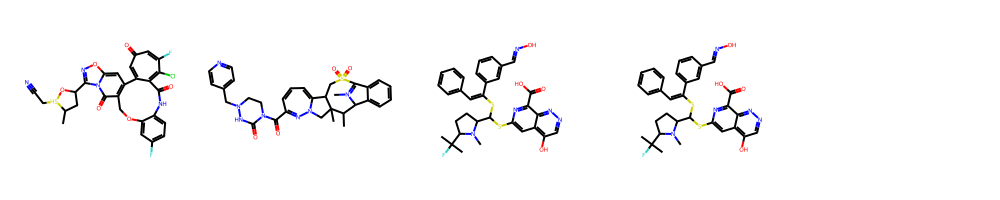

In [ ]:
# generate and plot our generated smiles molecules
latent_seed = latent_space[50:51]
sampling_temp = 0.75
scale = 0.5
quantity = 20
t_mols, t_smiles = generate(latent_seed, sampling_temp, scale, quantity)
Draw.MolsToGridImage(t_mols, molsPerRow=5)

In [ ]:
print(f'Sampled SMILES:\n {t_smiles}')

Sampled SMILES:
 ['CC1CC(c2noc3cc4c(c(=O)n23)COc2cc(F)ccc2NC(=O)c2c-4cc(=O)cc(F)c2Cl)O[SH]1CC#N', 'CC1C2c3ccccc3C(=[N+]2C)S(=O)(=O)CC2C3=CC=CC(C(=O)N4CCN(Cc5ccncc5)NC4=O)=NN3CC21C', 'CN1C(C(SC(=Cc2ccccc2)c2cccc(C=NO)c2)Sc2cc3c(O)cnnc3c(C(=O)O)n2)CCC1C(C)(C)F', 'CN1C(C(SC(=Cc2ccccc2)c2cccc(C=NO)c2)Sc2cc3c(O)cnnc3c(C(=O)O)n2)CCC1C(C)(C)F']


In [ ]:
# create a for loop to generate molecules based off our sampling dataset's latent space
gen_mols, gen_smiles = [], []
for i in range(latent_space.shape[0] - 1):
  latent_seed = latent_space[i:i+1]
  sampling_temp = rn.uniform(0.75, 1.26)
  scale = 0.75
  quantity = 25
  mols, smiles = generate(latent_seed, sampling_temp, scale, quantity)
  gen_mols.extend(mols)
  gen_smiles.extend(smiles)
  moles, smiles = [], []
print('SMILES generation completed!')

1/1 [==============================] - 0s 35ms/step


[18:51:01] SMILES Parse Error: extra open parentheses for input: 'COC1c2cccc(c2)c2ccnc2n2cc(NC(=O)C(O)c3ccc(F)cc3NC3NC(=O)C(C)(C)C(=O)=N(C2CCC(C)(COc2ccccc2)S1=O'


1/1 [==============================] - 0s 18ms/step


[18:51:07] SMILES Parse Error: extra close parentheses while parsing: COC1c2cccc(c2)C(C)c2ccsc2NC(=O)C2C3CCC4C5C6=C(N)C=CC=C7C(OC(C=O)N3)CC=C6N(C3)CCC5N5CF)CC5=N4C=CC5365
[18:51:07] SMILES Parse Error: Failed parsing SMILES 'COC1c2cccc(c2)C(C)c2ccsc2NC(=O)C2C3CCC4C5C6=C(N)C=CC=C7C(OC(C=O)N3)CC=C6N(C3)CCC5N5CF)CC5=N4C=CC5365' for input: 'COC1c2cccc(c2)C(C)c2ccsc2NC(=O)C2C3CCC4C5C6=C(N)C=CC=C7C(OC(C=O)N3)CC=C6N(C3)CCC5N5CF)CC5=N4C=CC5365'


1/1 [==============================] - 0s 21ms/step


[18:51:19] SMILES Parse Error: extra close parentheses while parsing: COC1C(O)C2NC1n1c(cc(-c3nc(C)no3)c1-c1ccccc1[N+](=O)[O-])C=S(C)(=O)c1cccc(F)c1OC2)CCC(F)=C3
[18:51:19] SMILES Parse Error: Failed parsing SMILES 'COC1C(O)C2NC1n1c(cc(-c3nc(C)no3)c1-c1ccccc1[N+](=O)[O-])C=S(C)(=O)c1cccc(F)c1OC2)CCC(F)=C3' for input: 'COC1C(O)C2NC1n1c(cc(-c3nc(C)no3)c1-c1ccccc1[N+](=O)[O-])C=S(C)(=O)c1cccc(F)c1OC2)CCC(F)=C3'


1/1 [==============================] - 0s 17ms/step


[18:51:25] SMILES Parse Error: extra close parentheses while parsing: COC1c2cccc(c2)C(C)c2ccsc2NC(=O)C2C3CCC4C5C6=C(N)C=CC=C7C(OO)c7cccc5C4CCC4)C3(c1cccccc1F)C2
[18:51:25] SMILES Parse Error: Failed parsing SMILES 'COC1c2cccc(c2)C(C)c2ccsc2NC(=O)C2C3CCC4C5C6=C(N)C=CC=C7C(OO)c7cccc5C4CCC4)C3(c1cccccc1F)C2' for input: 'COC1c2cccc(c2)C(C)c2ccsc2NC(=O)C2C3CCC4C5C6=C(N)C=CC=C7C(OO)c7cccc5C4CCC4)C3(c1cccccc1F)C2'


1/1 [==============================] - 0s 24ms/step


[18:51:32] SMILES Parse Error: extra close parentheses while parsing: CO1C(c2cc(F)ccc2Cl)c2c1NN1C2(O)CN2Cc3cc(F)ccc3C(=O)NCCOCCc3cccc([N+](C)(C)C)c3OC)SCC2(C)C1C
[18:51:32] SMILES Parse Error: Failed parsing SMILES 'CO1C(c2cc(F)ccc2Cl)c2c1NN1C2(O)CN2Cc3cc(F)ccc3C(=O)NCCOCCc3cccc([N+](C)(C)C)c3OC)SCC2(C)C1C' for input: 'CO1C(c2cc(F)ccc2Cl)c2c1NN1C2(O)CN2Cc3cc(F)ccc3C(=O)NCCOCCc3cccc([N+](C)(C)C)c3OC)SCC2(C)C1C'


1/1 [==============================] - 0s 20ms/step


[18:51:45] SMILES Parse Error: extra open parentheses for input: 'COC1=C2C3=CC=CC(C2CCCCC2CCC(N)=NC(C)C(CC2c4ncccc4OCC4OCCC(F)C4N(C)(C(=O)O)C(=CC=C)nc(=OO)=6O)O42C4#NC'


1/1 [==============================] - 0s 21ms/step


[18:51:50] SMILES Parse Error: extra close parentheses while parsing: COC1c2cccc(c2)C(C)c2ccsc2NC(=O)C2C3CCC1C2Cc4cccccc2NCC1C(C)NC(=O)Nc2ccc(Cl)c2Cl)C1C=C1C
[18:51:50] SMILES Parse Error: Failed parsing SMILES 'COC1c2cccc(c2)C(C)c2ccsc2NC(=O)C2C3CCC1C2Cc4cccccc2NCC1C(C)NC(=O)Nc2ccc(Cl)c2Cl)C1C=C1C' for input: 'COC1c2cccc(c2)C(C)c2ccsc2NC(=O)C2C3CCC1C2Cc4cccccc2NCC1C(C)NC(=O)Nc2ccc(Cl)c2Cl)C1C=C1C'


1/1 [==============================] - 0s 30ms/step


[18:51:57] SMILES Parse Error: unclosed ring for input: 'CC1CC2(CCCC1CCCNCC(C)(C)C(=O)NCCOC(=O)NCCOC(C)NCCC(NC(=O)C(N)=O)C(C(=O)NC)O1)C(C23)CCC(F)=NN'


1/1 [==============================] - 0s 22ms/step


[18:52:02] SMILES Parse Error: extra open parentheses for input: 'COC1c2cccc(c2)C(C)c2ccsc(NC(=O)C(C(=O)O)NC(=O)C2=CC(=O)C2CCC3=CCN=C(C2C)C3(C)N)C1(c1ccccc1'


1/1 [==============================] - 0s 30ms/step


[18:52:08] SMILES Parse Error: unclosed ring for input: 'COC1c2cccc(c2)C(C)c2ccsc2NC(=O)C2C3CCC4C5C6=C(N)C=CC=C7C(OS(C)(=O)=O)=CC=C6N(C3N(C)C4CO)C71(C)OC'


1/1 [==============================] - 0s 19ms/step


[18:52:14] SMILES Parse Error: unclosed ring for input: 'COC1c2cccc(c2)C(C)NC(=O)C2C1=CC=CC(=Cc3ccccc3OC)C(C)(CCCc1ccc(NC(=O)N(C)C)cc1)C(C)(C2)C3(C)C'


1/1 [==============================] - 0s 17ms/step


[18:52:20] SMILES Parse Error: extra close parentheses while parsing: COC1c2cccc(c2)C(C)c2ccsc2NC(=O)C2C3CCC4C5C6=C(N)C=CC=C6N(C=O)C=CC=C7C(OC)C(=O)O)C=CC=C6N(C)C4C#N)C7C7
[18:52:20] SMILES Parse Error: Failed parsing SMILES 'COC1c2cccc(c2)C(C)c2ccsc2NC(=O)C2C3CCC4C5C6=C(N)C=CC=C6N(C=O)C=CC=C7C(OC)C(=O)O)C=CC=C6N(C)C4C#N)C7C7' for input: 'COC1c2cccc(c2)C(C)c2ccsc2NC(=O)C2C3CCC4C5C6=C(N)C=CC=C6N(C=O)C=CC=C7C(OC)C(=O)O)C=CC=C6N(C)C4C#N)C7C7'


1/1 [==============================] - 0s 17ms/step


[18:52:26] SMILES Parse Error: extra close parentheses while parsing: COC1c2cccc(c2)C(C)c2ccsc2NC(=O)C2C3CCC4C5C6=C(N)C=CC=C7NC7C(O)(c7c6cc(O)C=O)cccc654C23)C1(C=C2
[18:52:26] SMILES Parse Error: Failed parsing SMILES 'COC1c2cccc(c2)C(C)c2ccsc2NC(=O)C2C3CCC4C5C6=C(N)C=CC=C7NC7C(O)(c7c6cc(O)C=O)cccc654C23)C1(C=C2' for input: 'COC1c2cccc(c2)C(C)c2ccsc2NC(=O)C2C3CCC4C5C6=C(N)C=CC=C7NC7C(O)(c7c6cc(O)C=O)cccc654C23)C1(C=C2'


1/1 [==============================] - 0s 18ms/step


[18:52:32] SMILES Parse Error: extra open parentheses for input: 'COC1c2cccc(c2)C(NC(C)(CC2CNC2=NCN=C(F)C(=O)NC1(N)Nc2ccc(C(=N)N)cc2Oc2ccc([SH](=O)(F)F)ccc2=C1'


1/1 [==============================] - 0s 35ms/step


[18:52:38] SMILES Parse Error: extra open parentheses for input: 'CC1(C(C(N)=O)C2C3C(C)C4C(C(N)=O)CC=CC=C1C32CCN2CC1CN1C(=O)Cc1cc(Cl)cc(C(F)(F)F)c1Cl'


1/1 [==============================] - 0s 32ms/step


[18:52:51] SMILES Parse Error: unclosed ring for input: 'COC1c2cccc(c2)C(C)c2ccsc2NC(=O)C2C3CCC4C5C6=N(C)C(C=C(O)C=CC=C(C(C)(C)C(=O)O)CCC(C3C)OC2=C6)C1=O'


1/1 [==============================] - 0s 18ms/step


[18:52:57] SMILES Parse Error: unclosed ring for input: 'CO1C(c2ccc(c3)C(=O)N2COc2ccc(c3[nH]c(C=CC=C)[S+](=O)[O-])C=S(C)(=O)O)C(=CC2)C1=CC=C(F)C#CCC1'


1/1 [==============================] - 0s 28ms/step


[18:53:03] SMILES Parse Error: extra close parentheses while parsing: COC1c2cccc(c2)C(C)c2ccsc2NC(=O)C2C3CCC4C5C6NC(=O)C=CC=C(C=C(CO)C=C3)c3cccc5C(=N)N)CC=CC=C7C71C2
[18:53:03] SMILES Parse Error: Failed parsing SMILES 'COC1c2cccc(c2)C(C)c2ccsc2NC(=O)C2C3CCC4C5C6NC(=O)C=CC=C(C=C(CO)C=C3)c3cccc5C(=N)N)CC=CC=C7C71C2' for input: 'COC1c2cccc(c2)C(C)c2ccsc2NC(=O)C2C3CCC4C5C6NC(=O)C=CC=C(C=C(CO)C=C3)c3cccc5C(=N)N)CC=CC=C7C71C2'


1/1 [==============================] - 0s 18ms/step


[18:53:10] SMILES Parse Error: unclosed ring for input: 'CO1C(=O)C(c2cccc(OC)c2)N2c3ccccc3N(CCc1ccc(OCCCN(C)C(=O)c4ccc(C(=O)N(C)C)cc4)C=NC3)OC2SC1(=O)Oc1'


1/1 [==============================] - 0s 19ms/step


[18:53:15] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16


1/1 [==============================] - 0s 19ms/step


[18:53:22] SMILES Parse Error: extra open parentheses for input: 'CC1(C(=O)O)N2CC3c4c(c5cc(OC(=O)c4ccc(NC(=O)Nc5cc(C(F)(F)F)ccc5=C(O)C4OCC4OCC4OOC3C5)c1c2cccc1C#N'


1/1 [==============================] - 0s 18ms/step


[18:53:28] SMILES Parse Error: unclosed ring for input: 'COC1C2NCCCC(C)(CCCCOc3cccc(N4)OCC(O)C(O)Cc4ncccc4OCC(=O)NC(=O)c4ccc(C#N)c(F)c4Cl)c3N2CC2C3=CN=C2'


1/1 [==============================] - 0s 24ms/step


[18:53:35] SMILES Parse Error: extra open parentheses for input: 'CCC1=CC2=NC(C(=O)NCC4CCC4CC(C(N)S(C)(=O)=O)=CC(C#CCCCCCCSCC(OCc4ccccc4F)C(C)O3)CN2c2ccsc21'


1/1 [==============================] - 0s 22ms/step


[18:53:41] SMILES Parse Error: unclosed ring for input: 'CON1Cc2ccc(Br)cc2NC(=N)S(=O)(=O)c2c(ncnc2N2CC3OC(CN4CCC(O)CC4F)CCC21)CC(=O)SCC(=O)N[NH]1'


1/1 [==============================] - 0s 28ms/step


[18:53:47] SMILES Parse Error: ring closure 2 duplicates bond between atom 28 and atom 29 for input: 'NCC12OC(=O)N1C2(C(O)(c2ccc(F)c2)c2c-c3cc(Cl)cnc3[nH]2)S(=O)(N2c2ccccc2F)N1C(=O)C1=CCl'


1/1 [==============================] - 0s 18ms/step


[18:53:53] SMILES Parse Error: extra open parentheses for input: 'CON1Cc2c[n+](CCNCCc3ccc(O)cc3CC2O)C(=C2C(=O)Nc4cccc(N4CC4OCC(c4=O)C(=CC=C)N4C=CC=CC32)c1cccc(C(F)F)c1'


1/1 [==============================] - 0s 26ms/step


[18:53:59] SMILES Parse Error: extra open parentheses for input: 'NC1CCC2=CN1C(c1ccc(-c3ncc4ccccc43)C(=O)NN=C1C3CN(C(C(=O)O)CC3)C[N+](CCN3)n2ccc(CSCC(=O)O)c1'


1/1 [==============================] - 0s 21ms/step


[18:54:05] SMILES Parse Error: extra close parentheses while parsing: COC1=Cc2c(N)nnc3nc4c(c(=O)n(Cc3ccc(C(=O)O)c(F)c1)=c3)C(=O)(Cl)CCC[C@H]3)[n+](CNC=O)c2nc1C
[18:54:05] SMILES Parse Error: Failed parsing SMILES 'COC1=Cc2c(N)nnc3nc4c(c(=O)n(Cc3ccc(C(=O)O)c(F)c1)=c3)C(=O)(Cl)CCC[C@H]3)[n+](CNC=O)c2nc1C' for input: 'COC1=Cc2c(N)nnc3nc4c(c(=O)n(Cc3ccc(C(=O)O)c(F)c1)=c3)C(=O)(Cl)CCC[C@H]3)[n+](CNC=O)c2nc1C'


1/1 [==============================] - 0s 19ms/step


[18:54:11] SMILES Parse Error: extra open parentheses for input: 'CCN1CC2=C3C=CC(Br)=C(C(=O)NCCOC3=C=C(C2C2=CC(F)=C(C(=O)Oc2cnccc1-c1ncc([N+](=O)[O-])[SH]1=O)S'


1/1 [==============================] - 0s 19ms/step


[18:54:18] SMILES Parse Error: unclosed ring for input: 'COC1=Cc2ncnc(OC3CCc4cccnc4C(=O)c3ccc([N+](=O)[O-])c(F)c3Sc2ccccc2Cl)S(=O)(C3CC)C1c2cccc(F)c21'


1/1 [==============================] - 0s 23ms/step


[18:54:23] SMILES Parse Error: extra open parentheses for input: 'COC1=CC2(CCCn3nccc3C(Cl)c3cnc(O)cc3NC3=O)C(CN2COC(c2ccc(F)c(F)c2)O1)C(O[PH](=O)O)N(C)C(=CC1'


1/1 [==============================] - 0s 27ms/step


[18:54:30] SMILES Parse Error: extra close parentheses while parsing: CCC1=CC=C2C(C)(CCc3cccc(NC(=O)B(O)CCO)C(=O)N3)c3c2cnc2c(cc2cc=O3)c(C(=O)NC=O)c(cc1C)C=C2)C(F)(F
[18:54:30] SMILES Parse Error: Failed parsing SMILES 'CCC1=CC=C2C(C)(CCc3cccc(NC(=O)B(O)CCO)C(=O)N3)c3c2cnc2c(cc2cc=O3)c(C(=O)NC=O)c(cc1C)C=C2)C(F)(F' for input: 'CCC1=CC=C2C(C)(CCc3cccc(NC(=O)B(O)CCO)C(=O)N3)c3c2cnc2c(cc2cc=O3)c(C(=O)NC=O)c(cc1C)C=C2)C(F)(F'


1/1 [==============================] - 0s 25ms/step


[18:54:36] SMILES Parse Error: extra open parentheses for input: 'CCN1CCCC2=C3C=CC(N4CCCC(F)(CCOC(=O)O)C(=O)OC3=CC=[N+](=C[S+](C=[N+](=O)[O-])SC1C(C)(O)C'


1/1 [==============================] - 0s 30ms/step


[18:54:43] SMILES Parse Error: extra close parentheses while parsing: COC1=c2ccncc2)N2CCCCC2NC(=O)C(nc2ccc3cc2c(=O)c(-c2cccc(F)c2)cc3-c1nc(C)[n+]1CC=S)C(F)F
[18:54:43] SMILES Parse Error: Failed parsing SMILES 'COC1=c2ccncc2)N2CCCCC2NC(=O)C(nc2ccc3cc2c(=O)c(-c2cccc(F)c2)cc3-c1nc(C)[n+]1CC=S)C(F)F' for input: 'COC1=c2ccncc2)N2CCCCC2NC(=O)C(nc2ccc3cc2c(=O)c(-c2cccc(F)c2)cc3-c1nc(C)[n+]1CC=S)C(F)F'


1/1 [==============================] - 0s 18ms/step


[18:54:48] SMILES Parse Error: unclosed ring for input: 'CCC1=CC2=CC=CC(=Cc3cccc(c3)OC3(C(S)C(=N)N)S(=O)(=O)Cc3cccc([N+](=O)[O-])c3OC)C2C=C1C'


1/1 [==============================] - 0s 17ms/step


[18:54:54] SMILES Parse Error: extra close parentheses while parsing: CCC1=C2CC=CC2=CC=NC3=C(C)=CC(=C1C=C3CCCCCC(N)C)CCN3C1N2c2cccc([N+](=O)[O-])c2Sc2ccccc2)N1C
[18:54:54] SMILES Parse Error: Failed parsing SMILES 'CCC1=C2CC=CC2=CC=NC3=C(C)=CC(=C1C=C3CCCCCC(N)C)CCN3C1N2c2cccc([N+](=O)[O-])c2Sc2ccccc2)N1C' for input: 'CCC1=C2CC=CC2=CC=NC3=C(C)=CC(=C1C=C3CCCCCC(N)C)CCN3C1N2c2cccc([N+](=O)[O-])c2Sc2ccccc2)N1C'


1/1 [==============================] - 0s 17ms/step


[18:55:01] SMILES Parse Error: extra close parentheses while parsing: CC1CC2c3cccc(OF)c3C(c4ccc(c(F)c5)CC)cc1)C2CCN1C2CC(C(O)(C2C=CN4CC(F)F)C(CN2CCOC2)C3=O)C(=O)N1
[18:55:01] SMILES Parse Error: Failed parsing SMILES 'CC1CC2c3cccc(OF)c3C(c4ccc(c(F)c5)CC)cc1)C2CCN1C2CC(C(O)(C2C=CN4CC(F)F)C(CN2CCOC2)C3=O)C(=O)N1' for input: 'CC1CC2c3cccc(OF)c3C(c4ccc(c(F)c5)CC)cc1)C2CCN1C2CC(C(O)(C2C=CN4CC(F)F)C(CN2CCOC2)C3=O)C(=O)N1'


1/1 [==============================] - 0s 19ms/step


[18:55:06] SMILES Parse Error: extra close parentheses while parsing: CON1Cc2ccc(cc2)-c2ccc(F)cc2NC(=O)c2sccc3[N+](CO[N+](=O)[O-])C=C3C(NC=O)C3(OC)CCCOC23)cc1
[18:55:06] SMILES Parse Error: Failed parsing SMILES 'CON1Cc2ccc(cc2)-c2ccc(F)cc2NC(=O)c2sccc3[N+](CO[N+](=O)[O-])C=C3C(NC=O)C3(OC)CCCOC23)cc1' for input: 'CON1Cc2ccc(cc2)-c2ccc(F)cc2NC(=O)c2sccc3[N+](CO[N+](=O)[O-])C=C3C(NC=O)C3(OC)CCCOC23)cc1'


1/1 [==============================] - 0s 18ms/step


[18:55:13] SMILES Parse Error: ring closure 2 duplicates bond between atom 2 and atom 44 for input: 'NCC12CC=CCNCC(C(F)(C(F)F)=c3cc(C(F)(F)F)nc(C(=O)NCc3ccc(F)cc(F)c3OCO)C3OC(=O)C12)ON1c2ccccc12'


1/1 [==============================] - 0s 17ms/step


[18:55:18] SMILES Parse Error: syntax error while parsing: CON1C2=CC=CC=CCC=CC=C3C(=NC=C3c3cc(Br)cs3)C(Oc1ccc([N+](=O)[O-])c(F)c1F)c1-[H]]H(C=C)Nl)O2
[18:55:18] SMILES Parse Error: Failed parsing SMILES 'CON1C2=CC=CC=CCC=CC=C3C(=NC=C3c3cc(Br)cs3)C(Oc1ccc([N+](=O)[O-])c(F)c1F)c1-[H]]H(C=C)Nl)O2' for input: 'CON1C2=CC=CC=CCC=CC=C3C(=NC=C3c3cc(Br)cs3)C(Oc1ccc([N+](=O)[O-])c(F)c1F)c1-[H]]H(C=C)Nl)O2'


1/1 [==============================] - 0s 25ms/step


[18:55:24] SMILES Parse Error: extra close parentheses while parsing: COC1=c2nc(O)ccc2C2=CC=CC2=CCN2C3CCC4CC(O5Cc4ccccc4)C(F)C3)CCN2C(C(N)=O)C(c2cccc(F)c2Cl)-c1
[18:55:24] SMILES Parse Error: Failed parsing SMILES 'COC1=c2nc(O)ccc2C2=CC=CC2=CCN2C3CCC4CC(O5Cc4ccccc4)C(F)C3)CCN2C(C(N)=O)C(c2cccc(F)c2Cl)-c1' for input: 'COC1=c2nc(O)ccc2C2=CC=CC2=CCN2C3CCC4CC(O5Cc4ccccc4)C(F)C3)CCN2C(C(N)=O)C(c2cccc(F)c2Cl)-c1'


1/1 [==============================] - 0s 19ms/step


[18:55:31] SMILES Parse Error: extra close parentheses while parsing: CC(C)c1nc(C(=O)N=c2n(s3)c2c(=O)[n-]c(=O)C(=C[S+](=O)[O-])CCc2ccncc2)OCC3)C(C)(O)Cc1ccc(F)cc(F)c1
[18:55:31] SMILES Parse Error: Failed parsing SMILES 'CC(C)c1nc(C(=O)N=c2n(s3)c2c(=O)[n-]c(=O)C(=C[S+](=O)[O-])CCc2ccncc2)OCC3)C(C)(O)Cc1ccc(F)cc(F)c1' for input: 'CC(C)c1nc(C(=O)N=c2n(s3)c2c(=O)[n-]c(=O)C(=C[S+](=O)[O-])CCc2ccncc2)OCC3)C(C)(O)Cc1ccc(F)cc(F)c1'


1/1 [==============================] - 0s 33ms/step


[18:55:38] SMILES Parse Error: extra close parentheses while parsing: NC1OCC(N2CCC(SC(=O)NCc3cccc(C4O)C(=O)c4cc(C(F)(F)F)ccc4=O)c3ccccc3C(=O)N4CCOC3C2)Cl)OC1c1cccc[n+]1
[18:55:38] SMILES Parse Error: Failed parsing SMILES 'NC1OCC(N2CCC(SC(=O)NCc3cccc(C4O)C(=O)c4cc(C(F)(F)F)ccc4=O)c3ccccc3C(=O)N4CCOC3C2)Cl)OC1c1cccc[n+]1' for input: 'NC1OCC(N2CCC(SC(=O)NCc3cccc(C4O)C(=O)c4cc(C(F)(F)F)ccc4=O)c3ccccc3C(=O)N4CCOC3C2)Cl)OC1c1cccc[n+]1'


1/1 [==============================] - 0s 20ms/step


[18:55:45] SMILES Parse Error: extra open parentheses for input: 'CCN1CCCC2(c3cc(ccn2C(c2cccc(F)c2)Nc1nc-c2-c3nn[nH]nc(-c3cccc43)C(F)(F)C(F)(F)=F)n12CCC(F)C#CCC1C'


1/1 [==============================] - 0s 25ms/step


[18:55:51] SMILES Parse Error: unclosed ring for input: 'CC1CC(c2noc3cc4c(=O)n(c5ccc(C(N)N)c(=O)c(CCN)n3-c2ccc(F)cc2F)C(=O)NC(=O)CC(F)(F)F)CC(c2ccncc2)O1'


1/1 [==============================] - 0s 28ms/step


[18:55:58] SMILES Parse Error: unclosed ring for input: 'CC1CC2(CCCC1CCCN(C)C)=NC(=O)(CCN(C)C)C(=O)N(C)C(=O)N(COC(=O)C(=O)c3cccc4COc3ccc(F)cc31)C1=C2'


1/1 [==============================] - 0s 17ms/step


[18:56:04] SMILES Parse Error: extra close parentheses while parsing: COC1=Cc2c(N)nnc3nc4c(n(O5)nc3C(F)C(c5cc(C(F)(F)F)ccc5=C3)CCC4CCF)c4c2OCC(C(=O)O)O1)CC(=O)O
[18:56:04] SMILES Parse Error: Failed parsing SMILES 'COC1=Cc2c(N)nnc3nc4c(n(O5)nc3C(F)C(c5cc(C(F)(F)F)ccc5=C3)CCC4CCF)c4c2OCC(C(=O)O)O1)CC(=O)O' for input: 'COC1=Cc2c(N)nnc3nc4c(n(O5)nc3C(F)C(c5cc(C(F)(F)F)ccc5=C3)CCC4CCF)c4c2OCC(C(=O)O)O1)CC(=O)O'


1/1 [==============================] - 0s 18ms/step


[18:56:09] SMILES Parse Error: extra close parentheses while parsing: NC1CC(O)C23CCC1C2Cc1c-2cc-c3ccc([N+](=O)[O-])c(Cl)c3c2)c1-c1cc-2n[nH]]1
[18:56:09] SMILES Parse Error: Failed parsing SMILES 'NC1CC(O)C23CCC1C2Cc1c-2cc-c3ccc([N+](=O)[O-])c(Cl)c3c2)c1-c1cc-2n[nH]]1' for input: 'NC1CC(O)C23CCC1C2Cc1c-2cc-c3ccc([N+](=O)[O-])c(Cl)c3c2)c1-c1cc-2n[nH]]1'


1/1 [==============================] - 0s 20ms/step


[18:56:14] SMILES Parse Error: extra close parentheses while parsing: CN1CC2=C3C=NC(Br)=C(C=C21)CC1=CC=CC(C=C34)CCC(C(=O)N)N=C3)c1nc(=O)o[-H]1
[18:56:14] SMILES Parse Error: Failed parsing SMILES 'CN1CC2=C3C=NC(Br)=C(C=C21)CC1=CC=CC(C=C34)CCC(C(=O)N)N=C3)c1nc(=O)o[-H]1' for input: 'CN1CC2=C3C=NC(Br)=C(C=C21)CC1=CC=CC(C=C34)CCC(C(=O)N)N=C3)c1nc(=O)o[-H]1'


1/1 [==============================] - 0s 17ms/step


[18:56:18] SMILES Parse Error: unclosed ring for input: 'CC1OC(C(=O)N2CCN3Cc4c(ccc3c4O)C(c5cc(C(=O)N)cn5)CC2C42CC3(C)C(C)N3)N'


1/1 [==============================] - 0s 30ms/step


[18:56:23] SMILES Parse Error: extra open parentheses for input: 'NC1CCC2=CN(N)C3=CC=NC(=CC=C3SC(=S)SCC(c1ccccn2)N1COP(=O)(O)OO3'


1/1 [==============================] - 0s 18ms/step


[18:56:27] SMILES Parse Error: unclosed ring for input: 'CN1CC2=C3C=NC(Br)=C(C=C21)CC1=CC=CC(=C3)CCNCCC1NS(=O)(=O)CCc1cc-3ccc1'


1/1 [==============================] - 0s 18ms/step


[18:56:31] SMILES Parse Error: unclosed ring for input: 'CC1CC2(CCCC1CCCN(C)C)CNC(=O)NCCOCCC(C)N(CC(O)C(=O)OCC13)C(=O)NC1'


1/1 [==============================] - 0s 26ms/step


[18:56:37] SMILES Parse Error: syntax error while parsing: NC1CC(O)C23CCN(CC4OC=CC4=O)C=CC(N(C)C(=O)c4ccc(F)cc4)nH]3)CC2[NH=O
[18:56:37] SMILES Parse Error: Failed parsing SMILES 'NC1CC(O)C23CCN(CC4OC=CC4=O)C=CC(N(C)C(=O)c4ccc(F)cc4)nH]3)CC2[NH=O' for input: 'NC1CC(O)C23CCN(CC4OC=CC4=O)C=CC(N(C)C(=O)c4ccc(F)cc4)nH]3)CC2[NH=O'


1/1 [==============================] - 0s 25ms/step


[18:56:42] SMILES Parse Error: unclosed ring for input: 'CN1CC2=C3C=NC(Br)=C(Br)=C(N=C1)CC(C(=O)N=C4OCc5c(c)cc5CC42)C1C3=O'


1/1 [==============================] - 0s 20ms/step


[18:56:46] SMILES Parse Error: extra open parentheses for input: 'N#Cc1cnc2c(c1)nnn2C1CC23CCCCC(N2)CCC(C(N)=O)CN(C2CCCN2C1CCCOC1'


1/1 [==============================] - 0s 17ms/step


[18:56:52] SMILES Parse Error: extra open parentheses for input: 'CON1C(OCc2c(F)cccc2C(=O)N2CC3=CCN=C(C4(C=O)N(CCC4(C)CCC(=O)C3)OC2(C)c1cncnc1'


1/1 [==============================] - 0s 17ms/step


[18:56:56] SMILES Parse Error: extra close parentheses while parsing: CN1CC2=C3C=NC(C=C21)NCC1=CC(OC(=N)N)C3C4CCCCC(N3)C4)CC1(C2=N=O
[18:56:56] SMILES Parse Error: Failed parsing SMILES 'CN1CC2=C3C=NC(C=C21)NCC1=CC(OC(=N)N)C3C4CCCCC(N3)C4)CC1(C2=N=O' for input: 'CN1CC2=C3C=NC(C=C21)NCC1=CC(OC(=N)N)C3C4CCCCC(N3)C4)CC1(C2=N=O'


1/1 [==============================] - 0s 17ms/step


[18:56:59] SMILES Parse Error: extra open parentheses for input: 'CN1CC2=C3C=NC(Br)=C(C=C21)CC1=CC=CC(C(=C3)=CN(=O)CCCCCC2C'


1/1 [==============================] - 0s 27ms/step


[18:57:04] SMILES Parse Error: unclosed ring for input: 'COC1C2NCCCC3C(C(=O)NCCC34C=CC(C3)=CC=C3)c(C#N)c(c12)C[OH]1'


1/1 [==============================] - 0s 26ms/step


[18:57:13] SMILES Parse Error: extra close parentheses while parsing: CN1CC2=C3C=NC(C=Cc4c(O)ccc4c4O)ccc3c1)C(=C1)N=C2S(=O)(=O)c1ccc(F)cc1
[18:57:13] SMILES Parse Error: Failed parsing SMILES 'CN1CC2=C3C=NC(C=Cc4c(O)ccc4c4O)ccc3c1)C(=C1)N=C2S(=O)(=O)c1ccc(F)cc1' for input: 'CN1CC2=C3C=NC(C=Cc4c(O)ccc4c4O)ccc3c1)C(=C1)N=C2S(=O)(=O)c1ccc(F)cc1'


1/1 [==============================] - 0s 28ms/step


[18:57:18] SMILES Parse Error: syntax error while parsing: N#CC1c2cccc(c2c2nnc3cc(-c4ncc(Cl)c(F)c3)[nH]c3N=[N+](O[O-])CCN+4=O)n2)on1
[18:57:18] SMILES Parse Error: Failed parsing SMILES 'N#CC1c2cccc(c2c2nnc3cc(-c4ncc(Cl)c(F)c3)[nH]c3N=[N+](O[O-])CCN+4=O)n2)on1' for input: 'N#CC1c2cccc(c2c2nnc3cc(-c4ncc(Cl)c(F)c3)[nH]c3N=[N+](O[O-])CCN+4=O)n2)on1'


1/1 [==============================] - 0s 18ms/step


[18:57:22] SMILES Parse Error: extra open parentheses for input: 'NC1CC(c2cccc(c2I)N2C(=O)C(=CCn3ncc4ccncc43)OC2O'


1/1 [==============================] - 0s 17ms/step


[18:57:26] SMILES Parse Error: extra close parentheses while parsing: CN1OC2=NCC1ON(Cc1cccc(O-c3ccc(C(C)C)oc3)c1=O)C(=O)(O)(C)cc(-c2cccon1)C2)O
[18:57:26] SMILES Parse Error: Failed parsing SMILES 'CN1OC2=NCC1ON(Cc1cccc(O-c3ccc(C(C)C)oc3)c1=O)C(=O)(O)(C)cc(-c2cccon1)C2)O' for input: 'CN1OC2=NCC1ON(Cc1cccc(O-c3ccc(C(C)C)oc3)c1=O)C(=O)(O)(C)cc(-c2cccon1)C2)O'


1/1 [==============================] - 0s 33ms/step


[18:57:30] SMILES Parse Error: extra close parentheses while parsing: CC1CC2=CC=CC(NS(=O)(=O)Cc3cccc(NC(=O)C(C)=O)C3)CCC2C(=O)NO)S1
[18:57:30] SMILES Parse Error: Failed parsing SMILES 'CC1CC2=CC=CC(NS(=O)(=O)Cc3cccc(NC(=O)C(C)=O)C3)CCC2C(=O)NO)S1' for input: 'CC1CC2=CC=CC(NS(=O)(=O)Cc3cccc(NC(=O)C(C)=O)C3)CCC2C(=O)NO)S1'


1/1 [==============================] - 0s 18ms/step


[18:57:36] SMILES Parse Error: unclosed ring for input: 'COC1C2OCC(n3ccc(C(O)CN4c5cc(OC)cc(F)c(F)c4O)C1CO21)C(c3ccc(C(F)(F)F)nn3)OO21'


1/1 [==============================] - 0s 24ms/step


[18:57:41] SMILES Parse Error: unclosed ring for input: 'CC=C1C2CC=C(CNc3ccc(OC(=O)c4ccc(C(=O)N6)cnc4=O)CC3C2=O)C(=O)NCC1'


1/1 [==============================] - 0s 32ms/step


[18:57:46] SMILES Parse Error: unclosed ring for input: 'CC1CC2=CC=C(C=CC3CNC4=C(C=C(c5ccccn5)NC3CF3)CCC=CSc2ccccc1F)N2'


1/1 [==============================] - 0s 17ms/step


[18:57:51] SMILES Parse Error: extra close parentheses while parsing: CN1CC2=C3C=NC(Br)=C(C=C21)CC1=CC=CC(=CC=C1)C3Cl)C(NS(C)(=O)=O)C3OC71OC
[18:57:51] SMILES Parse Error: Failed parsing SMILES 'CN1CC2=C3C=NC(Br)=C(C=C21)CC1=CC=CC(=CC=C1)C3Cl)C(NS(C)(=O)=O)C3OC71OC' for input: 'CN1CC2=C3C=NC(Br)=C(C=C21)CC1=CC=CC(=CC=C1)C3Cl)C(NS(C)(=O)=O)C3OC71OC'


1/1 [==============================] - 0s 20ms/step


[18:57:55] SMILES Parse Error: extra close parentheses while parsing: NC1=C(Cl)C2=CC=CC(N=C(Cl)C34CCCCCC(O3)c4ccccc43)C(=O)O)nn1
[18:57:55] SMILES Parse Error: Failed parsing SMILES 'NC1=C(Cl)C2=CC=CC(N=C(Cl)C34CCCCCC(O3)c4ccccc43)C(=O)O)nn1' for input: 'NC1=C(Cl)C2=CC=CC(N=C(Cl)C34CCCCCC(O3)c4ccccc43)C(=O)O)nn1'


1/1 [==============================] - 0s 27ms/step


[18:57:59] SMILES Parse Error: syntax error while parsing: CC1CC2OCC1NC(=Cc4ccc(c(C=N=O)ncc21)C(=O)(Nc1ccc(-2)c=Occ1F)(F)F
[18:57:59] SMILES Parse Error: Failed parsing SMILES 'CC1CC2OCC1NC(=Cc4ccc(c(C=N=O)ncc21)C(=O)(Nc1ccc(-2)c=Occ1F)(F)F' for input: 'CC1CC2OCC1NC(=Cc4ccc(c(C=N=O)ncc21)C(=O)(Nc1ccc(-2)c=Occ1F)(F)F'


1/1 [==============================] - 0s 21ms/step


[18:58:05] Explicit valence for atom # 39 C, 5, is greater than permitted


1/1 [==============================] - 0s 24ms/step


[18:58:10] SMILES Parse Error: extra close parentheses while parsing: O=c1ccc(O)c2c3n1NC(c1c(Cl)nc([O-])cc3)[nH]1)C(C(N)=O)Cc1cccc([N+](=O)[O-])c1O)-c1cccnc1
[18:58:10] SMILES Parse Error: Failed parsing SMILES 'O=c1ccc(O)c2c3n1NC(c1c(Cl)nc([O-])cc3)[nH]1)C(C(N)=O)Cc1cccc([N+](=O)[O-])c1O)-c1cccnc1' for input: 'O=c1ccc(O)c2c3n1NC(c1c(Cl)nc([O-])cc3)[nH]1)C(C(N)=O)Cc1cccc([N+](=O)[O-])c1O)-c1cccnc1'


1/1 [==============================] - 0s 27ms/step


[18:58:15] SMILES Parse Error: ring closure 1 duplicates bond between atom 31 and atom 32 for input: 'CC1C2c3ccc(cn1)N=C(C(NC(=O)N4CCN(c5ccccc5)NC4=O)C=CC32)C1=c1scnc1'


1/1 [==============================] - 0s 18ms/step


[18:58:25] SMILES Parse Error: extra close parentheses while parsing: CC1C2c5cccccc3C=C(NS(=O)(=Cc4ccccc4)OC3CCC4CCCCC(F)(F)C42)c1ccc(C#N)nc1)O
[18:58:25] SMILES Parse Error: Failed parsing SMILES 'CC1C2c5cccccc3C=C(NS(=O)(=Cc4ccccc4)OC3CCC4CCCCC(F)(F)C42)c1ccc(C#N)nc1)O' for input: 'CC1C2c5cccccc3C=C(NS(=O)(=Cc4ccccc4)OC3CCC4CCCCC(F)(F)C42)c1ccc(C#N)nc1)O'


1/1 [==============================] - 0s 18ms/step


[18:58:31] SMILES Parse Error: extra open parentheses for input: 'CC1C(=O)C(c2ccc(OC(=O)c3ccc(Cl)cc3F)c2OCC(C)NCCCc2c[n+](n2COCC(F)(F)=N1C'


1/1 [==============================] - 0s 19ms/step


[18:58:35] SMILES Parse Error: unclosed ring for input: 'CC1C2c3ccccc3C(=[N+]2C)S(=O)(=O)CN2C3=CC=CC=C(=C2)C1=CC=CC=C3C=CCC1'


1/1 [==============================] - 0s 20ms/step


[18:58:40] Can't kekulize mol.  Unkekulized atoms: 3 4 6 7 8 9 10


1/1 [==============================] - 0s 22ms/step


[18:58:46] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 11


1/1 [==============================] - 0s 22ms/step


[18:58:50] SMILES Parse Error: unclosed ring for input: 'CC1(C)CC(N2CC(CCnnnccc3c3cccc(OCc4cccc5c4OCC45)CC3)c2)C1=CN1'


1/1 [==============================] - 0s 32ms/step


[18:58:56] SMILES Parse Error: extra close parentheses while parsing: CC1(C(=O)O)N=C(c2ccc(F)cc2)C(=O)N2CCC3=CC=C(C=C3C=CC4C=CC5(C)CC(=C)N)=7O2)O1
[18:58:56] SMILES Parse Error: Failed parsing SMILES 'CC1(C(=O)O)N=C(c2ccc(F)cc2)C(=O)N2CCC3=CC=C(C=C3C=CC4C=CC5(C)CC(=C)N)=7O2)O1' for input: 'CC1(C(=O)O)N=C(c2ccc(F)cc2)C(=O)N2CCC3=CC=C(C=C3C=CC4C=CC5(C)CC(=C)N)=7O2)O1'


1/1 [==============================] - 0s 21ms/step


[18:59:02] SMILES Parse Error: extra close parentheses while parsing: CC1C(O)C2NC1n1c(cc(-c3nc(C)no3)c1)c1-c1cc-3)cc2CN1C(=O)OC(C)3c1ccccc1F
[18:59:02] SMILES Parse Error: Failed parsing SMILES 'CC1C(O)C2NC1n1c(cc(-c3nc(C)no3)c1)c1-c1cc-3)cc2CN1C(=O)OC(C)3c1ccccc1F' for input: 'CC1C(O)C2NC1n1c(cc(-c3nc(C)no3)c1)c1-c1cc-3)cc2CN1C(=O)OC(C)3c1ccccc1F'


1/1 [==============================] - 0s 22ms/step


[18:59:07] SMILES Parse Error: extra close parentheses while parsing: CC1C2c5ccccc1C3C(Cc1cccc(NC(=O)Cc4ccc(C(C)(C)C(=O)n)cn4)C(=O)O)(c3)N1)C2
[18:59:07] SMILES Parse Error: Failed parsing SMILES 'CC1C2c5ccccc1C3C(Cc1cccc(NC(=O)Cc4ccc(C(C)(C)C(=O)n)cn4)C(=O)O)(c3)N1)C2' for input: 'CC1C2c5ccccc1C3C(Cc1cccc(NC(=O)Cc4ccc(C(C)(C)C(=O)n)cn4)C(=O)O)(c3)N1)C2'


1/1 [==============================] - 0s 31ms/step


[18:59:12] SMILES Parse Error: extra open parentheses for input: 'CC1C(=O)C(c2ccc(OC(=O)C(CO)C(=O)Nc3nccc(C4CC=CC4)c32)c1ccc[n+]1C(CO)OC1=O'


1/1 [==============================] - 0s 24ms/step


[18:59:18] SMILES Parse Error: extra open parentheses for input: 'CN1c2ccc(Br)cc2NC(=O)C2C(=O)N1C1C2=CC=C(C=C(=O)OC3CCCCCC34C=C(CN)=CCN(C7C21C5'


1/1 [==============================] - 0s 27ms/step


[18:59:23] SMILES Parse Error: extra close parentheses while parsing: CC1C(=O)CC1COCCC(C)=C(C)C)c2ccnc(NC3CCNC(=O)N4CCCCC5C(C=C(C)=C)=CC=C23)C1=O
[18:59:23] SMILES Parse Error: Failed parsing SMILES 'CC1C(=O)CC1COCCC(C)=C(C)C)c2ccnc(NC3CCNC(=O)N4CCCCC5C(C=C(C)=C)=CC=C23)C1=O' for input: 'CC1C(=O)CC1COCCC(C)=C(C)C)c2ccnc(NC3CCNC(=O)N4CCCCC5C(C=C(C)=C)=CC=C23)C1=O'


1/1 [==============================] - 0s 27ms/step


[18:59:28] SMILES Parse Error: unclosed ring for input: 'CC1CC2(CCCC1C2CNC(=O)C(F)CC(=O)NC(COCCNC(C)S(C)(=O)=O)C=C2C)C(=O)N1'


1/1 [==============================] - 0s 18ms/step


[18:59:33] SMILES Parse Error: extra open parentheses for input: 'CC1CC2C3CCC4C(C)(C)C3=CC=CC=CN(C1C(=O)NCCc4cccc5c4OC(CSC)C(=O)N(C)C5=N1C32'


1/1 [==============================] - 0s 24ms/step


[18:59:38] SMILES Parse Error: extra close parentheses while parsing: CC1C2c3ccccc3C3=NC(=[N+](=O)[O-])C(=O)N(CCOc4ccc(C(O)=O)cc4)Cc32)C1=O
[18:59:38] SMILES Parse Error: Failed parsing SMILES 'CC1C2c3ccccc3C3=NC(=[N+](=O)[O-])C(=O)N(CCOc4ccc(C(O)=O)cc4)Cc32)C1=O' for input: 'CC1C2c3ccccc3C3=NC(=[N+](=O)[O-])C(=O)N(CCOc4ccc(C(O)=O)cc4)Cc32)C1=O'


1/1 [==============================] - 0s 28ms/step


[18:59:44] SMILES Parse Error: extra open parentheses for input: 'CN1c2ccc(C=SC(=NC(=O)OC(CO)C(=O)NC2=C3Cc4ccccc4C(=O)C=CC3=O)c(c2C)C(=O)N1'


1/1 [==============================] - 0s 22ms/step


[18:59:49] SMILES Parse Error: unclosed ring for input: 'CC1C(c2ncnc(OC3CCc4cccnc4C(=O)C(F)(F)c4cccc(Br)=O)c2)N=C2C3CC=C(N)=NN2=C1'


1/1 [==============================] - 0s 32ms/step


[18:59:55] SMILES Parse Error: unclosed ring for input: 'CC1C2=NCC1C(=NC=C1C=CC=CC=C2C(=O)NOC1C(O)Cc2cccc(OC)c23)c1COC(=O)N'


1/1 [==============================] - 0s 20ms/step


[19:00:01] SMILES Parse Error: unclosed ring for input: 'CC1C2c3ccccc3C(=[N+]2C)S(=O)(=O)CCCC=CC(F)(F)C(=O)N(CC23CC(=O)N2CC2C3=O)n1'


1/1 [==============================] - 0s 19ms/step


[19:00:06] SMILES Parse Error: extra open parentheses for input: 'CO1C(c2cccc(OC(=C(C)C)CC2=O)Oc1cc(NC(=O)c2cccc3c2oc(=O)c(C)c1=N1C(=O)(c1ccnc1F'


1/1 [==============================] - 0s 22ms/step


[19:00:12] SMILES Parse Error: extra close parentheses while parsing: CC1CC2NCCCC3CCC(C(C)C)C(CSc3(N)COc4cc(C(N)=O)cc(Cl)c4)nn3)CC2)C1C
[19:00:12] SMILES Parse Error: Failed parsing SMILES 'CC1CC2NCCCC3CCC(C(C)C)C(CSc3(N)COc4cc(C(N)=O)cc(Cl)c4)nn3)CC2)C1C' for input: 'CC1CC2NCCCC3CCC(C(C)C)C(CSc3(N)COc4cc(C(N)=O)cc(Cl)c4)nn3)CC2)C1C'


1/1 [==============================] - 0s 19ms/step


[19:00:18] SMILES Parse Error: extra close parentheses while parsing: O=C1CCC2(CCN(C(=O)c3cncnc3)ccc3-c4noc(=O)[SH](=O)=O)ccc3NC4=CC(F)F)CO2C#1CCC#N
[19:00:18] SMILES Parse Error: Failed parsing SMILES 'O=C1CCC2(CCN(C(=O)c3cncnc3)ccc3-c4noc(=O)[SH](=O)=O)ccc3NC4=CC(F)F)CO2C#1CCC#N' for input: 'O=C1CCC2(CCN(C(=O)c3cncnc3)ccc3-c4noc(=O)[SH](=O)=O)ccc3NC4=CC(F)F)CO2C#1CCC#N'


1/1 [==============================] - 0s 27ms/step


[19:00:22] SMILES Parse Error: unclosed ring for input: 'O=C1C=CCN(CS(O)(=O)c2ccc3cccccc2N2CC=CCF)CC=C2C=CC(=O)S(C)(=O)=CN12'


1/1 [==============================] - 0s 21ms/step


[19:00:28] SMILES Parse Error: extra open parentheses for input: 'CONC(=S)C(C1NCCN2CC=CC(F)(C(=O)OC(COc3cccc(F)c3)N3CCC(C(=O)NCCO)C3)OC21N'


1/1 [==============================] - 0s 18ms/step


[19:00:33] SMILES Parse Error: unclosed ring for input: 'O=C1C2CCC3OC(C(O)(=O)N3CCc4cccc5c4=O)N(CC=C(C(=O)O)C4=O)C(=C3)N1'


1/1 [==============================] - 0s 26ms/step


[19:00:38] SMILES Parse Error: extra open parentheses for input: 'CN=NC1CC2C3=NNN(C4=C2N1CC1=[N-]=[N+]2CC4C=CC(C3(C(=O)O)CCN5C1)c[n+]([O-])c12'


1/1 [==============================] - 0s 18ms/step


[19:00:44] SMILES Parse Error: unclosed ring for input: 'O=C1C2=CC=CC=C13C(O)CO3C(=O)C(n1)c1cccc(OCCCOc3ccc4ccccc4c3OCOC3O)n21'


1/1 [==============================] - 0s 18ms/step


[19:00:49] SMILES Parse Error: extra close parentheses while parsing: O=C1CCC2(CCN(C(=O)Nc3ccncc3)Nc3ncnc(N4Cc5cccnc5C(=O)N3)C4)O3)c[n+]1C2CN2CC
[19:00:49] SMILES Parse Error: Failed parsing SMILES 'O=C1CCC2(CCN(C(=O)Nc3ccncc3)Nc3ncnc(N4Cc5cccnc5C(=O)N3)C4)O3)c[n+]1C2CN2CC' for input: 'O=C1CCC2(CCN(C(=O)Nc3ccncc3)Nc3ncnc(N4Cc5cccnc5C(=O)N3)C4)O3)c[n+]1C2CN2CC'


1/1 [==============================] - 0s 30ms/step


[19:00:54] SMILES Parse Error: extra open parentheses for input: 'O=C1CCC2(CCN(C(=O)Oc3cccc([N+](=O)[O-])cc3)C(=O)CNC3=CC=C3C2(F)C(F)(N)F1'


1/1 [==============================] - 0s 21ms/step


[19:00:58] SMILES Parse Error: ring closure 1 duplicates bond between atom 20 and atom 21 for input: 'O=C1C2CCC3(N=O)NC1C3C(C=CS(N)=O)=C3NCN1C13'


1/1 [==============================] - 0s 26ms/step


[19:01:03] SMILES Parse Error: syntax error while parsing: =C(Nc1c(O)nnc(F)c1c1n2n(c1=OC(Cl)CCCCCCCCCCN(C(=O)CC(=O)O)CCCCC21
[19:01:03] SMILES Parse Error: Failed parsing SMILES '=C(Nc1c(O)nnc(F)c1c1n2n(c1=OC(Cl)CCCCCCCCCCN(C(=O)CC(=O)O)CCCCC21' for input: '=C(Nc1c(O)nnc(F)c1c1n2n(c1=OC(Cl)CCCCCCCCCCN(C(=O)CC(=O)O)CCCCC21'


1/1 [==============================] - 0s 36ms/step


[19:01:09] SMILES Parse Error: extra close parentheses while parsing: C=C1CCC2=CC=NNC34CCC(OC)C4CCCC3)N4CC(CO)C=C2)C(OC(C)=O)S(=O)(=O)c3ccccc4)SC21
[19:01:09] SMILES Parse Error: Failed parsing SMILES 'C=C1CCC2=CC=NNC34CCC(OC)C4CCCC3)N4CC(CO)C=C2)C(OC(C)=O)S(=O)(=O)c3ccccc4)SC21' for input: 'C=C1CCC2=CC=NNC34CCC(OC)C4CCCC3)N4CC(CO)C=C2)C(OC(C)=O)S(=O)(=O)c3ccccc4)SC21'


1/1 [==============================] - 0s 20ms/step


[19:01:14] SMILES Parse Error: extra close parentheses while parsing: O=C1OCCCN(S(=O)(=O)C2(O)Cc3ncncc3OCc4ccc(Br)cc4O[S+]([O-])CC3O)c2Cl)o1
[19:01:14] SMILES Parse Error: Failed parsing SMILES 'O=C1OCCCN(S(=O)(=O)C2(O)Cc3ncncc3OCc4ccc(Br)cc4O[S+]([O-])CC3O)c2Cl)o1' for input: 'O=C1OCCCN(S(=O)(=O)C2(O)Cc3ncncc3OCc4ccc(Br)cc4O[S+]([O-])CC3O)c2Cl)o1'


1/1 [==============================] - 0s 21ms/step


[19:01:19] SMILES Parse Error: extra close parentheses while parsing: O=C1C=CCN(CCOC2Cl)S(=O)(=O)C(=O)N=C2=c3sc(OC(=O)cnccc3c3ccccn3)CC2)O[nH]1
[19:01:19] SMILES Parse Error: Failed parsing SMILES 'O=C1C=CCN(CCOC2Cl)S(=O)(=O)C(=O)N=C2=c3sc(OC(=O)cnccc3c3ccccn3)CC2)O[nH]1' for input: 'O=C1C=CCN(CCOC2Cl)S(=O)(=O)C(=O)N=C2=c3sc(OC(=O)cnccc3c3ccccn3)CC2)O[nH]1'


1/1 [==============================] - 0s 21ms/step


[19:01:25] SMILES Parse Error: unclosed ring for input: 'N=C1C2CCN(Oc3cc(OC(=O)c4ccc(CN5CC(F)(F)CF)cc4)ccc3C=O4)N2CCN1C1COCC1'


1/1 [==============================] - 0s 19ms/step


[19:01:30] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13 14 20 21 22 23 24


1/1 [==============================] - 0s 27ms/step


[19:01:34] SMILES Parse Error: syntax error while parsing: O=C1C2=CC=CC(n1ccc3ccc(-c4cccc(Cl)cc4OCC(O)CCC4CCCC5)c3c2=O)C(=OH)O1
[19:01:34] SMILES Parse Error: Failed parsing SMILES 'O=C1C2=CC=CC(n1ccc3ccc(-c4cccc(Cl)cc4OCC(O)CCC4CCCC5)c3c2=O)C(=OH)O1' for input: 'O=C1C2=CC=CC(n1ccc3ccc(-c4cccc(Cl)cc4OCC(O)CCC4CCCC5)c3c2=O)C(=OH)O1'


1/1 [==============================] - 0s 19ms/step


[19:01:41] SMILES Parse Error: extra close parentheses while parsing: O=C1CCC2(CCN(Cc3cccc(F)c3)C(=O)N=Cc4ccccc45F)C(=O)NCCC23)C1(c2n[nH]c2CN2CCCO1
[19:01:41] SMILES Parse Error: Failed parsing SMILES 'O=C1CCC2(CCN(Cc3cccc(F)c3)C(=O)N=Cc4ccccc45F)C(=O)NCCC23)C1(c2n[nH]c2CN2CCCO1' for input: 'O=C1CCC2(CCN(Cc3cccc(F)c3)C(=O)N=Cc4ccccc45F)C(=O)NCCC23)C1(c2n[nH]c2CN2CCCO1'


1/1 [==============================] - 0s 21ms/step


[19:01:46] SMILES Parse Error: extra open parentheses for input: 'O=C1C=CCN(CCNCC(F)F)c2[nH]nc(NC(=O)FC(=O)NO3(c2ccccn2)C(Cl)Oc2ccc(F)cc21'


1/1 [==============================] - 0s 29ms/step


[19:01:51] SMILES Parse Error: extra open parentheses for input: 'O=C1CCC2(CCN(C(=O)Oc3ccc(Cl)[OH][nH]c-nnc3ccc3[nH]c3cc(Cl)c(Cl)OCC3)[nH]c2NC1'


1/1 [==============================] - 0s 19ms/step


[19:01:57] SMILES Parse Error: extra close parentheses while parsing: CN=NC1CC2(C=NN)Nc3ccccc3C(=O)NC3c4c[n+]([O-])nc(=O)c4cccc(C(=O)N(C)N)c1O5)31
[19:01:57] SMILES Parse Error: Failed parsing SMILES 'CN=NC1CC2(C=NN)Nc3ccccc3C(=O)NC3c4c[n+]([O-])nc(=O)c4cccc(C(=O)N(C)N)c1O5)31' for input: 'CN=NC1CC2(C=NN)Nc3ccccc3C(=O)NC3c4c[n+]([O-])nc(=O)c4cccc(C(=O)N(C)N)c1O5)31'


1/1 [==============================] - 0s 22ms/step


[19:02:02] SMILES Parse Error: unclosed ring for input: 'O=C1C2=CC=CC(F)=CCN(=C2C(=O)Oc2c[nH]c3nc(=O)[nH]c3cco4C(C(=O)O)CC2)N1'


1/1 [==============================] - 0s 40ms/step


[19:02:08] SMILES Parse Error: extra close parentheses while parsing: O=C1C2CCC3(C=C(O)OCc4ccccc43)C(=O)NS(=O)(=O)NCc3cccc(F)c3)SC1=N
[19:02:08] SMILES Parse Error: Failed parsing SMILES 'O=C1C2CCC3(C=C(O)OCc4ccccc43)C(=O)NS(=O)(=O)NCc3cccc(F)c3)SC1=N' for input: 'O=C1C2CCC3(C=C(O)OCc4ccccc43)C(=O)NS(=O)(=O)NCc3cccc(F)c3)SC1=N'


1/1 [==============================] - 0s 23ms/step


[19:02:13] SMILES Parse Error: unclosed ring for input: 'O=C1OCOC2(F)C(Cl)=CC=NS(=NC(=O)c3cc(ccc4[nH]ncc35)Oc2=O)C[O-]1'


1/1 [==============================] - 0s 20ms/step


[19:02:18] SMILES Parse Error: ring closure 1 duplicates bond between atom 34 and atom 35 for input: 'C=C(C1NC1NC2c3ccccc3c(N[S+](CO)S(=O)=O)ccc3NC3COCC(C4)O3)C2CC1C12CC(O)O1'


1/1 [==============================] - 0s 27ms/step


[19:02:36] SMILES Parse Error: extra close parentheses while parsing: CC1CC2=CC=C(C=C3CCNCCC43C(=O)CC(Oc3ccc5c(=O)n(C)c3)Sc3ccccc32)C(=O)NCC1)c1ccccc1
[19:02:36] SMILES Parse Error: Failed parsing SMILES 'CC1CC2=CC=C(C=C3CCNCCC43C(=O)CC(Oc3ccc5c(=O)n(C)c3)Sc3ccccc32)C(=O)NCC1)c1ccccc1' for input: 'CC1CC2=CC=C(C=C3CCNCCC43C(=O)CC(Oc3ccc5c(=O)n(C)c3)Sc3ccccc32)C(=O)NCC1)c1ccccc1'


1/1 [==============================] - 0s 20ms/step


[19:02:42] SMILES Parse Error: unclosed ring for input: 'CC1CC2=CC=C(C=CC3CNC4=C(C=C(c5ccccn5)S3)CCC(CO)CC2SC(=O)N2CCC3)C(CNC(CO)C2CO1)O'


1/1 [==============================] - 0s 25ms/step


[19:03:15] SMILES Parse Error: extra open parentheses for input: 'CC1C2=CC(C(=O)NC(COc3ccc4ccccc4c3OCOC3CCCCC2)C(=O)NC(=O)C2CCC1C2C=CC=C3C1CCCOCC1'


1/1 [==============================] - 0s 25ms/step


[19:03:30] SMILES Parse Error: extra open parentheses for input: 'CC1CC2N(C)CCCNCC=C(Cl)C3CC=CS(=O)(=[SH]CC(Oc4ccccc4O)N4CCC(=CC=C)(c3n[nH]cc35)CC21'


1/1 [==============================] - ETA: 0s

[19:03:43] SMILES Parse Error: extra open parentheses for input: 'CC1CC2=CC=CC(N=C3CCN(CCc4ccccc4)C(OCC(O)C3SC(=O)N43CCC3CC(C(O)C(C)(C)C4)C3)CCC21'


1/1 [==============================] - 0s 29ms/step


[19:03:57] SMILES Parse Error: extra close parentheses while parsing: CC1CC2=CC=C(C=CC3CNCCOc4ccc(C(=O)Nc5cc(C(C)(C)C)nc(C)=O)nc4-c3ccc(F)cc43)CC2)CC1
[19:03:57] SMILES Parse Error: Failed parsing SMILES 'CC1CC2=CC=C(C=CC3CNCCOc4ccc(C(=O)Nc5cc(C(C)(C)C)nc(C)=O)nc4-c3ccc(F)cc43)CC2)CC1' for input: 'CC1CC2=CC=C(C=CC3CNCCOc4ccc(C(=O)Nc5cc(C(C)(C)C)nc(C)=O)nc4-c3ccc(F)cc43)CC2)CC1'


1/1 [==============================] - 0s 20ms/step


[19:04:10] SMILES Parse Error: extra open parentheses for input: 'CN1C(C(SC(=Cc2ccccc2)c2cccc(C=NO)c2)Sc2cc3c(N)nn(c3cc(C(=O)O)nc3ccn2CCC2COCCC32CCC1N'


1/1 [==============================] - 0s 21ms/step


[19:04:17] SMILES Parse Error: syntax error while parsing: CC1CC2=CC=C(C=CC3CNC4=C(C=C(c5ccccn5)S3)CCC4CCCCCC2)NCC(=O)NC(=O)C(F)(F)c1c1cnnn(1)N=C
[19:04:17] SMILES Parse Error: Failed parsing SMILES 'CC1CC2=CC=C(C=CC3CNC4=C(C=C(c5ccccn5)S3)CCC4CCCCCC2)NCC(=O)NC(=O)C(F)(F)c1c1cnnn(1)N=C' for input: 'CC1CC2=CC=C(C=CC3CNC4=C(C=C(c5ccccn5)S3)CCC4CCCCCC2)NCC(=O)NC(=O)C(F)(F)c1c1cnnn(1)N=C'


1/1 [==============================] - 0s 24ms/step


[19:04:32] SMILES Parse Error: extra open parentheses for input: 'CC1CC2=CC=CC(=NC=C13CCN(CCC44CCCC(C4)C43CCC(C3)=C(C(=O)N(C)C)C4=O)c(cc2C)C(=O)N(=O)N2CC1O'


1/1 [==============================] - 0s 33ms/step


[19:04:47] SMILES Parse Error: extra close parentheses while parsing: CC1CC(c2noc3cc4c(c(=O)n23)COc2cc(NC(=O)Cc4ccc(F)cc4OC)cc3)CC2)cc1C(N)=O)c(F)c1cccc(C(F)(F)F)c1
[19:04:47] SMILES Parse Error: Failed parsing SMILES 'CC1CC(c2noc3cc4c(c(=O)n23)COc2cc(NC(=O)Cc4ccc(F)cc4OC)cc3)CC2)cc1C(N)=O)c(F)c1cccc(C(F)(F)F)c1' for input: 'CC1CC(c2noc3cc4c(c(=O)n23)COc2cc(NC(=O)Cc4ccc(F)cc4OC)cc3)CC2)cc1C(N)=O)c(F)c1cccc(C(F)(F)F)c1'


1/1 [==============================] - 0s 18ms/step


[19:04:54] SMILES Parse Error: extra close parentheses while parsing: CC1CC2(CCCC1CCCN(C)C)CNC(=O)NCCOCCC(C)NC(=O)C(C)(C)C)CCNC(=O)NCCOCCC(CNC(C)(C)=O)=CN2C1
[19:04:54] SMILES Parse Error: Failed parsing SMILES 'CC1CC2(CCCC1CCCN(C)C)CNC(=O)NCCOCCC(C)NC(=O)C(C)(C)C)CCNC(=O)NCCOCCC(CNC(C)(C)=O)=CN2C1' for input: 'CC1CC2(CCCC1CCCN(C)C)CNC(=O)NCCOCCC(C)NC(=O)C(C)(C)C)CCNC(=O)NCCOCCC(CNC(C)(C)=O)=CN2C1'


1/1 [==============================] - 0s 19ms/step


[19:05:08] SMILES Parse Error: unclosed ring for input: 'CC1CC2=CC=C(C=CC=Cc3cccc(NC(=O)c4ccc(C(=O)n4cccc5ccccc45)c3)cn2)CCN1C(=O)OCc1ccccc1'


1/1 [==============================] - 0s 29ms/step


[19:05:19] SMILES Parse Error: extra open parentheses for input: 'CC1CC2=NCCN(CC(=O)NC(=S)C(=O)C(=C3N=C(C=C4/C=CC=C5=CC=C3C=C(C=C2N)c1'


1/1 [==============================] - 0s 20ms/step


[19:05:25] SMILES Parse Error: extra open parentheses for input: 'CC1(C(C(S(C)(=O)O)Nc2cccc3Oc2ccc([N+](=O)(F)c(F)c(F)c1)C1c1ccc(C#N)Oc3cccc(CO)c1'


1/1 [==============================] - 0s 19ms/step


[19:05:30] SMILES Parse Error: syntax error while parsing: CC1CC2COC(C(=O)NC(COc3ccc4ccccc4c3Oc3cccs3)C(=O)O3)C2NC(=O)Cn2ncc3c2C1=CC=
[19:05:30] SMILES Parse Error: Failed parsing SMILES 'CC1CC2COC(C(=O)NC(COc3ccc4ccccc4c3Oc3cccs3)C(=O)O3)C2NC(=O)Cn2ncc3c2C1=CC=' for input: 'CC1CC2COC(C(=O)NC(COc3ccc4ccccc4c3Oc3cccs3)C(=O)O3)C2NC(=O)Cn2ncc3c2C1=CC='


1/1 [==============================] - 0s 18ms/step


[19:05:37] SMILES Parse Error: extra close parentheses while parsing: CC1CC2N3CCC1CC(C3)CCC(C(N)=O)CC(=CN)CCCCCCCC(C)N(CCCOc4ccc(F)cc4F)CC3)O1
[19:05:37] SMILES Parse Error: Failed parsing SMILES 'CC1CC2N3CCC1CC(C3)CCC(C(N)=O)CC(=CN)CCCCCCCC(C)N(CCCOc4ccc(F)cc4F)CC3)O1' for input: 'CC1CC2N3CCC1CC(C3)CCC(C(N)=O)CC(=CN)CCCCCCCC(C)N(CCCOc4ccc(F)cc4F)CC3)O1'


1/1 [==============================] - 0s 24ms/step


[19:05:43] SMILES Parse Error: extra close parentheses while parsing: CC1CC2(CCCCC(F)CNC(=O)c3ccc(CC=CC=CC=O)cc3)cc-3c(=O)NCOC(=O)N2CC3C(=O)O)N1C=C
[19:05:43] SMILES Parse Error: Failed parsing SMILES 'CC1CC2(CCCCC(F)CNC(=O)c3ccc(CC=CC=CC=O)cc3)cc-3c(=O)NCOC(=O)N2CC3C(=O)O)N1C=C' for input: 'CC1CC2(CCCCC(F)CNC(=O)c3ccc(CC=CC=CC=O)cc3)cc-3c(=O)NCOC(=O)N2CC3C(=O)O)N1C=C'


1/1 [==============================] - 0s 27ms/step


[19:05:49] SMILES Parse Error: extra close parentheses while parsing: CC1C2c3ccccc3C(=[N+]2C)S(=O)(=O)CC2C3=CC=CC(C(=O)N4CCNC4=C(C(N)(=O)N)O2)O23CF)O1
[19:05:49] SMILES Parse Error: Failed parsing SMILES 'CC1C2c3ccccc3C(=[N+]2C)S(=O)(=O)CC2C3=CC=CC(C(=O)N4CCNC4=C(C(N)(=O)N)O2)O23CF)O1' for input: 'CC1C2c3ccccc3C(=[N+]2C)S(=O)(=O)CC2C3=CC=CC(C(=O)N4CCNC4=C(C(N)(=O)N)O2)O23CF)O1'


1/1 [==============================] - 0s 20ms/step


[19:05:55] SMILES Parse Error: extra close parentheses while parsing: CC1C2(CCCC1C2CNC(n)c(-c3ccc4ccccc43)c(OCc4ccc(C(=O)N)cc5)nc1)C=CC3)C12O
[19:05:55] SMILES Parse Error: Failed parsing SMILES 'CC1C2(CCCC1C2CNC(n)c(-c3ccc4ccccc43)c(OCc4ccc(C(=O)N)cc5)nc1)C=CC3)C12O' for input: 'CC1C2(CCCC1C2CNC(n)c(-c3ccc4ccccc43)c(OCc4ccc(C(=O)N)cc5)nc1)C=CC3)C12O'


1/1 [==============================] - 0s 18ms/step


[19:05:59] SMILES Parse Error: extra close parentheses while parsing: CC1C=C2C(=CC=C1CC(F)CN(Cc3ccc(Cl)cn3)C(=O)O3)C(C)(C)C)-3
[19:05:59] SMILES Parse Error: Failed parsing SMILES 'CC1C=C2C(=CC=C1CC(F)CN(Cc3ccc(Cl)cn3)C(=O)O3)C(C)(C)C)-3' for input: 'CC1C=C2C(=CC=C1CC(F)CN(Cc3ccc(Cl)cn3)C(=O)O3)C(C)(C)C)-3'


1/1 [==============================] - 0s 27ms/step


[19:06:05] SMILES Parse Error: unclosed ring for input: 'CC1C2c3ccccc3C(=[N+]2C)S(=O)(=O)C2FC1=CN(c3ccc(NC=NC(=O)C(=O)C3=O)o2)C1(C)N'


1/1 [==============================] - 0s 19ms/step


[19:06:11] SMILES Parse Error: extra open parentheses for input: 'NC1Cc2ccc(c3[nH]c(NC=CN(=O)C(=CC(=S)c4cc(F)ccc4CNS3)O2)CCOC(C)n2ccc(F)cn2c1=O'


1/1 [==============================] - 0s 24ms/step


[19:06:16] SMILES Parse Error: extra close parentheses while parsing: CC1C2c3ccccc3CC=C(F)Cc3cccc(NC(=O)C(C)(C)C)n3)C2C(=O)NCC2C3CCCCC(C2C3=CC=NS2
[19:06:16] SMILES Parse Error: Failed parsing SMILES 'CC1C2c3ccccc3CC=C(F)Cc3cccc(NC(=O)C(C)(C)C)n3)C2C(=O)NCC2C3CCCCC(C2C3=CC=NS2' for input: 'CC1C2c3ccccc3CC=C(F)Cc3cccc(NC(=O)C(C)(C)C)n3)C2C(=O)NCC2C3CCCCC(C2C3=CC=NS2'


1/1 [==============================] - ETA: 0s

[19:06:23] SMILES Parse Error: extra open parentheses for input: 'CC1C(=O)C(c2ccc(OC(=O)C(=O)N2CCC2(CCN3CCCCC4C(C)c4ccncc4OC(=C3N)O3)CCCC2C2'


1/1 [==============================] - 0s 20ms/step


[19:06:28] Explicit valence for atom # 22 C, 5, is greater than permitted


1/1 [==============================] - 0s 32ms/step


[19:06:34] SMILES Parse Error: unclosed ring for input: 'CC1CC(c2noc3cc4c(c(=O)n23)COc2ccc(F)c2F)c(F)c1N=CC(c1ccc(F)c(F)c1F)C(C)N'


1/1 [==============================] - 0s 20ms/step


[19:06:40] SMILES Parse Error: extra close parentheses while parsing: NC1c2cccc(F)c2Cl)c1C(=O)C1C2=CC(N3=CN3)C1C(O)(NC(=O)C34CCCCCC(NC(=C4)N1)C32
[19:06:40] SMILES Parse Error: Failed parsing SMILES 'NC1c2cccc(F)c2Cl)c1C(=O)C1C2=CC(N3=CN3)C1C(O)(NC(=O)C34CCCCCC(NC(=C4)N1)C32' for input: 'NC1c2cccc(F)c2Cl)c1C(=O)C1C2=CC(N3=CN3)C1C(O)(NC(=O)C34CCCCCC(NC(=C4)N1)C32'


1/1 [==============================] - 0s 22ms/step


[19:06:44] SMILES Parse Error: extra close parentheses while parsing: CC1C2c3ccccc3C(=[N+]2C)S(=O)(=O)CC2C3=CC=CC(C(C)=CC=C2)C3)CC1
[19:06:44] SMILES Parse Error: Failed parsing SMILES 'CC1C2c3ccccc3C(=[N+]2C)S(=O)(=O)CC2C3=CC=CC(C(C)=CC=C2)C3)CC1' for input: 'CC1C2c3ccccc3C(=[N+]2C)S(=O)(=O)CC2C3=CC=CC(C(C)=CC=C2)C3)CC1'


1/1 [==============================] - 0s 26ms/step


[19:06:52] SMILES Parse Error: unclosed ring for input: 'CC1C(=O)C(c2cc(C(=O)c3ccc(CCCC(F)F)C(=O)cc3)cc2)NC2CCC3C(C(N)=O)CN2Cc2cccc(F)c21'


1/1 [==============================] - 0s 22ms/step


[19:06:58] SMILES Parse Error: extra close parentheses while parsing: CN1C(C(SC(N)=O)C(=Cc2c(O)ncnc2O)c2c(F)cccc2[N+](=O)[O-])c1Cl)c1cccc(C(=O)O)cc1
[19:06:58] SMILES Parse Error: Failed parsing SMILES 'CN1C(C(SC(N)=O)C(=Cc2c(O)ncnc2O)c2c(F)cccc2[N+](=O)[O-])c1Cl)c1cccc(C(=O)O)cc1' for input: 'CN1C(C(SC(N)=O)C(=Cc2c(O)ncnc2O)c2c(F)cccc2[N+](=O)[O-])c1Cl)c1cccc(C(=O)O)cc1'


1/1 [==============================] - 0s 28ms/step


[19:07:04] SMILES Parse Error: extra open parentheses for input: 'NC1Cc2ccc(c3[nH]c(CCCN=[N+](CCC=CS(=O)(=O)C4=C(C=C(=O)O)[nH]c3=O2)c(=CNC2=C1'


1/1 [==============================] - 0s 18ms/step


[19:07:10] SMILES Parse Error: extra open parentheses for input: 'CC1C2(CCCC1CNC(=O)C(=O)NCCCNCCOC(=NN(C)C(=O)NCCOCCC(C)NC(=O)CCNC1=O)N(C)=N2'


1/1 [==============================] - 0s 18ms/step


[19:07:15] SMILES Parse Error: extra open parentheses for input: 'CC1CC2N(C)C(=CC3=CC=CCc4c(cc(OC(=O)c5cnc(Br)s5)ccc4C(F)(CF)N(C)C3CO)C1C721'


1/1 [==============================] - 0s 21ms/step


[19:07:22] SMILES Parse Error: extra close parentheses while parsing: CC1CC2=CC=C(C=C3C(=O)Cc4cccnc4C3=O)CNCCC2C(=O)NS(=O)(=O)C1c2cccc(F)c21)C(C)NC1
[19:07:22] SMILES Parse Error: Failed parsing SMILES 'CC1CC2=CC=C(C=C3C(=O)Cc4cccnc4C3=O)CNCCC2C(=O)NS(=O)(=O)C1c2cccc(F)c21)C(C)NC1' for input: 'CC1CC2=CC=C(C=C3C(=O)Cc4cccnc4C3=O)CNCCC2C(=O)NS(=O)(=O)C1c2cccc(F)c21)C(C)NC1'


1/1 [==============================] - 0s 28ms/step


[19:07:32] SMILES Parse Error: extra open parentheses for input: 'CC1C2=NCCC(C=CN3CC=CCC34C=CC(=CC=C2)=C(C=C2)NCCC(C)C1NC(=O)Cc1ccc(Cl)cc1F'


1/1 [==============================] - 0s 18ms/step


[19:07:46] SMILES Parse Error: syntax error while parsing: CC(1C(=O)O)CC1C(=O)Nc2c(cc(OC(=O)NC(=O)C(c3ccc(F)c(F)c3)nc2)C(O)Cc2nc(CF)c([SH](=O)=O)cn2c2C=1
[19:07:46] SMILES Parse Error: Failed parsing SMILES 'CC(1C(=O)O)CC1C(=O)Nc2c(cc(OC(=O)NC(=O)C(c3ccc(F)c(F)c3)nc2)C(O)Cc2nc(CF)c([SH](=O)=O)cn2c2C=1' for input: 'CC(1C(=O)O)CC1C(=O)Nc2c(cc(OC(=O)NC(=O)C(c3ccc(F)c(F)c3)nc2)C(O)Cc2nc(CF)c([SH](=O)=O)cn2c2C=1'


1/1 [==============================] - 0s 27ms/step


[19:07:54] SMILES Parse Error: extra open parentheses for input: 'COC1=Cc2c(N)nnc3nc4c(nc(-c5cc6ccc5C(C)=C(=S)N=Cc4cc6c(-c7cccc=O)c5con5CC2OC3OC(CF)=C32)cc1C(=O)O=O'


1/1 [==============================] - 0s 23ms/step


[19:08:01] SMILES Parse Error: unclosed ring for input: 'CCC1=CC=C2C(N)=c3cc(Oc4ccc([N+](=O)[O-])c(F)c4)ncc2=c2cnc([N+]=O)[o@-](=O)N(CC)c2ccccc2OC1=ON'


1/1 [==============================] - 0s 19ms/step


[19:08:09] SMILES Parse Error: syntax error while parsing: CON1C(=[NC2(C(=O)O)Cc3cccc(NC(=O)C(Cl)C4COc5cc(F)cc(F)c4F)C(=ON)C3COC2C(C)C1=O)C(=O)O
[19:08:09] SMILES Parse Error: Failed parsing SMILES 'CON1C(=[NC2(C(=O)O)Cc3cccc(NC(=O)C(Cl)C4COc5cc(F)cc(F)c4F)C(=ON)C3COC2C(C)C1=O)C(=O)O' for input: 'CON1C(=[NC2(C(=O)O)Cc3cccc(NC(=O)C(Cl)C4COc5cc(F)cc(F)c4F)C(=ON)C3COC2C(C)C1=O)C(=O)O'


1/1 [==============================] - 0s 19ms/step


[19:08:15] SMILES Parse Error: extra open parentheses for input: 'CC(C#Cc1cncc(-c2ccc(C(OC(N)=O)c(Cl)c3cccc(Cl)c3OCC=C2C=C(C)C2(CC)NC(=O)c2ccc(F)cc2OCC1CN2CCF1C2'


1/1 [==============================] - 0s 35ms/step


[19:08:23] SMILES Parse Error: unclosed ring for input: 'CON1C2=CC=CC(NC(O)(C(F)(Cl)c3cc(C(=N)N)ncc3CC3S(=O)(=O)Nc3ccc4ccccc4c3OC)C(OCCC(O)COC)C12)N1'


1/1 [==============================] - ETA: 0s

[19:08:29] SMILES Parse Error: syntax error while parsing: CCN1CC2=CC=CC=COC3(C(=O)NCCC34CCC(CC)(OC)CCN3C(=O)Cc34c5ccc(Br)c(F)c5cl)ccn3CC(=O)C3O)n1C2
[19:08:29] SMILES Parse Error: Failed parsing SMILES 'CCN1CC2=CC=CC=COC3(C(=O)NCCC34CCC(CC)(OC)CCN3C(=O)Cc34c5ccc(Br)c(F)c5cl)ccn3CC(=O)C3O)n1C2' for input: 'CCN1CC2=CC=CC=COC3(C(=O)NCCC34CCC(CC)(OC)CCN3C(=O)Cc34c5ccc(Br)c(F)c5cl)ccn3CC(=O)C3O)n1C2'


1/1 [==============================] - 0s 27ms/step


[19:08:36] SMILES Parse Error: extra open parentheses for input: 'CC(O)c1c(NC(=O)c2ccc3ccccc3c2)C(OCCC(Cc2ccccc2)c2nc(C(=O)n2ncc2C1CCC(COCCC2)O3)NC(=O)O1'


1/1 [==============================] - 0s 19ms/step


[19:08:44] SMILES Parse Error: extra open parentheses for input: 'NC1OC(=O2C=C(Cl)C3C(=O)OC(CF)C4NC=C(C=CS(=O)(=O)=C4C=CC4=C5N(nc5ccn5c4CCC(C5)C4COCc3ccncc5)6O2)C7on1'


1/1 [==============================] - 0s 28ms/step


[19:08:50] SMILES Parse Error: unclosed ring for input: 'NCC12CC(Br)=CC(NC(=O)c3ccc(OC4SN=C(=O)C(=O)Nc4cccn5c4=O)n(CCc3ccc(FC(F)F)cc3)NC4=O)N2N1'


1/1 [==============================] - 0s 20ms/step


[19:08:57] SMILES Parse Error: syntax error while parsing: NC(1C=C2C(=COP(=O)(O)N3CCC4CCCCCC(N4CC=C(=CS(=O)(=O)N4Cc4ccccc4F)N=C4C(F)C4=CCF2)C1F
[19:08:57] SMILES Parse Error: Failed parsing SMILES 'NC(1C=C2C(=COP(=O)(O)N3CCC4CCCCCC(N4CC=C(=CS(=O)(=O)N4Cc4ccccc4F)N=C4C(F)C4=CCF2)C1F' for input: 'NC(1C=C2C(=COP(=O)(O)N3CCC4CCCCCC(N4CC=C(=CS(=O)(=O)N4Cc4ccccc4F)N=C4C(F)C4=CCF2)C1F'


1/1 [==============================] - 0s 27ms/step


[19:09:03] SMILES Parse Error: extra open parentheses for input: 'CON1CC2CC3CNC4C(C(=O)NCCN5CSC(=S)NC(=O)C=CC=C(C(=O)N(C)NC(=O)c(ccccc5C)C4OCCN4CCCFCCC1C2'


1/1 [==============================] - 0s 24ms/step


[19:09:11] SMILES Parse Error: extra close parentheses while parsing: CCN1CC2=CC=CC=COC3C(C)(CC4CCCSC)(O)CC3n3cccn3-c3ccc(Cl)cc3)Cc3c(onn13)N2c1ccc(-c2c[n+](O)no]2)Sc1
[19:09:11] SMILES Parse Error: Failed parsing SMILES 'CCN1CC2=CC=CC=COC3C(C)(CC4CCCSC)(O)CC3n3cccn3-c3ccc(Cl)cc3)Cc3c(onn13)N2c1ccc(-c2c[n+](O)no]2)Sc1' for input: 'CCN1CC2=CC=CC=COC3C(C)(CC4CCCSC)(O)CC3n3cccn3-c3ccc(Cl)cc3)Cc3c(onn13)N2c1ccc(-c2c[n+](O)no]2)Sc1'


1/1 [==============================] - 0s 26ms/step


[19:09:19] SMILES Parse Error: unclosed ring for input: 'COC1=Cc2c(N)nnc3nc4c(nc(-c5cc6ccc5C(CC(N)=O)CS(=O)(=O)Cc5cc(C(C)N)6c(c5)ccc5C)[SH]44C(C)(CC3)NO1)C2'


1/1 [==============================] - 0s 17ms/step


[19:09:27] SMILES Parse Error: ring closure 1 duplicates bond between atom 36 and atom 37 for input: 'CC=C1CCn2c(nc(-c3nc(C)no3)c1-c1ccccc1NC7)-c2oc(-c2cccc(F)cc2F)c1-c1ccc(C(=O)S(C)(=O)=O)c1c(F)ncc1N'


1/1 [==============================] - 0s 20ms/step


[19:09:33] SMILES Parse Error: extra close parentheses while parsing: NCC12CCCCC(c3cccc(F)c3)CSC(CC(N)=O)C(=O)N(COCC(OCc4ccc(Cl)cc4)c(Cl)c3)n[nH]1)n[n+]1[Fe][nH]2
[19:09:33] SMILES Parse Error: Failed parsing SMILES 'NCC12CCCCC(c3cccc(F)c3)CSC(CC(N)=O)C(=O)N(COCC(OCc4ccc(Cl)cc4)c(Cl)c3)n[nH]1)n[n+]1[Fe][nH]2' for input: 'NCC12CCCCC(c3cccc(F)c3)CSC(CC(N)=O)C(=O)N(COCC(OCc4ccc(Cl)cc4)c(Cl)c3)n[nH]1)n[n+]1[Fe][nH]2'


1/1 [==============================] - 0s 20ms/step


[19:09:40] SMILES Parse Error: extra close parentheses while parsing: CCC1=CC=C2C3CCC4CCC4C(=O)NCCOC3O)CCCCC(CSCCC(C)S)C(CN)=CC2(C2CC2CO2)=CSCc3([H])C(CO)O1
[19:09:40] SMILES Parse Error: Failed parsing SMILES 'CCC1=CC=C2C3CCC4CCC4C(=O)NCCOC3O)CCCCC(CSCCC(C)S)C(CN)=CC2(C2CC2CO2)=CSCc3([H])C(CO)O1' for input: 'CCC1=CC=C2C3CCC4CCC4C(=O)NCCOC3O)CCCCC(CSCCC(C)S)C(CN)=CC2(C2CC2CO2)=CSCc3([H])C(CO)O1'


1/1 [==============================] - 0s 21ms/step


[19:09:47] SMILES Parse Error: extra close parentheses while parsing: CCN1CC2=CC=CC=COC3(C(=O)NCCC34CCC(CC)C4CC(F)(F)C(F)(C)c5=NC(=O)c=c(C(=N)N)=N)ccc4=O)C=C6CO3)C21
[19:09:47] SMILES Parse Error: Failed parsing SMILES 'CCN1CC2=CC=CC=COC3(C(=O)NCCC34CCC(CC)C4CC(F)(F)C(F)(C)c5=NC(=O)c=c(C(=N)N)=N)ccc4=O)C=C6CO3)C21' for input: 'CCN1CC2=CC=CC=COC3(C(=O)NCCC34CCC(CC)C4CC(F)(F)C(F)(C)c5=NC(=O)c=c(C(=N)N)=N)ccc4=O)C=C6CO3)C21'


1/1 [==============================] - 0s 19ms/step


[19:09:55] SMILES Parse Error: extra open parentheses for input: 'CON1Cc2ccc(c3[nH]c(CNCC(O)C(=O)N)nc3C=CC=CC(=Cc2ccccc2)C(=O)C2CCC1C2Cc2c[n+](nc([nH]c3=NO)-1=O)=O'


1/1 [==============================] - 0s 23ms/step


[19:10:01] SMILES Parse Error: unclosed ring for input: 'CCN1CCCC2=C3C=CC(C4=CC=C(C(=C)SC)CC4C=CC=C5S(=O)(=O)[SH]35C6ccccc5CC4)CC3C2C#Cc1c[nH]c2ccnc21'


1/1 [==============================] - 0s 28ms/step


[19:10:09] SMILES Parse Error: unclosed ring for input: 'CCN1CCCC2=C3CNC4(Cc5c(Cl)cc(F)cc4)CCN1C(C)(CC(=O)OCCC(=CCc4ccccc4O)C(=O)O)CCC2C(F)(F)C(=O)1F'


1/1 [==============================] - 0s 19ms/step


[19:10:16] SMILES Parse Error: extra open parentheses for input: 'NC1CCC2=CN(N)c3cc(=O)nn(Cc3ccc(F)cc3)C(N3CCN(CCCn4ncc4c4ccn5C4OCCCC5C4=CC3COC3)C(=O)NC2=CC=NO1'


1/1 [==============================] - 0s 37ms/step


[19:10:24] SMILES Parse Error: unclosed ring for input: 'CCN1CC2=CC=CC=COC3(C(=O)NCCC34CCC(CC)(OC)CCN4C(C)(CO)C(=O)N(C)CCCOc5cccc5c4OCC5CCC5)cc23c1COCC1'


1/1 [==============================] - 0s 20ms/step


[19:10:31] SMILES Parse Error: unclosed ring for input: 'CNC1C=CCC2CCN(CC(n3ccc-cnc(CO)CNCC=O)CO3C(=O)COc3ccc(CNC(=O)N4CCN(Cc5o5)CCC5C54O)C34)c(F)cc12'


1/1 [==============================] - 0s 26ms/step


[19:10:39] SMILES Parse Error: syntax error while parsing: CC(1C(=O)CC(C)Cc2ccc(Br)cc2NC(=N)S(=O)(=O)c2ccccc3c2=O)c1N1C2NCCO1C(=O)NCCc1nc(=O)sc1CO)COc3
[19:10:39] SMILES Parse Error: Failed parsing SMILES 'CC(1C(=O)CC(C)Cc2ccc(Br)cc2NC(=N)S(=O)(=O)c2ccccc3c2=O)c1N1C2NCCO1C(=O)NCCc1nc(=O)sc1CO)COc3' for input: 'CC(1C(=O)CC(C)Cc2ccc(Br)cc2NC(=N)S(=O)(=O)c2ccccc3c2=O)c1N1C2NCCO1C(=O)NCCc1nc(=O)sc1CO)COc3'


1/1 [==============================] - 0s 18ms/step


[19:10:45] SMILES Parse Error: extra close parentheses while parsing: CC1(C(=O)O)N2CCC3C(C)(C(C)Nc4cccc4c4ccc4c5ccc5c5c6cc(Br)cc5)ccc4C(=O)c3cn4ccccc35)n1C2
[19:10:45] SMILES Parse Error: Failed parsing SMILES 'CC1(C(=O)O)N2CCC3C(C)(C(C)Nc4cccc4c4ccc4c5ccc5c5c6cc(Br)cc5)ccc4C(=O)c3cn4ccccc35)n1C2' for input: 'CC1(C(=O)O)N2CCC3C(C)(C(C)Nc4cccc4c4ccc4c5ccc5c5c6cc(Br)cc5)ccc4C(=O)c3cn4ccccc35)n1C2'


1/1 [==============================] - 0s 27ms/step


[19:10:51] SMILES Parse Error: extra open parentheses for input: 'N#Cc1ccc(OC(N)=O)c(-n2cc(N3CCN(Cc4ncccc4C(F)(F)C(F)(F)C3)C2=O)c1Oc1ncc(-c2ccccn2)s1'


1/1 [==============================] - 0s 17ms/step


[19:11:05] SMILES Parse Error: extra close parentheses while parsing: N#Cc1ccc(OC(N)=O)c(-n2[nH]nc(N(C(N)=O)c3cccc(CO)c3c2)c(C)c3ccccc23)c1ccc(-c3cccnc3)on1)n2
[19:11:05] SMILES Parse Error: Failed parsing SMILES 'N#Cc1ccc(OC(N)=O)c(-n2[nH]nc(N(C(N)=O)c3cccc(CO)c3c2)c(C)c3ccccc23)c1ccc(-c3cccnc3)on1)n2' for input: 'N#Cc1ccc(OC(N)=O)c(-n2[nH]nc(N(C(N)=O)c3cccc(CO)c3c2)c(C)c3ccccc23)c1ccc(-c3cccnc3)on1)n2'


1/1 [==============================] - 0s 23ms/step


[19:11:12] SMILES Parse Error: extra close parentheses while parsing: COc1cc2cnc(NOC(OC(=O)C34CC(O3)C4(C)C)N4CCC4C(C)(C(C)C)SC)c3cccc3C)c2c1C(C)(C)c1ccccc1
[19:11:12] SMILES Parse Error: Failed parsing SMILES 'COc1cc2cnc(NOC(OC(=O)C34CC(O3)C4(C)C)N4CCC4C(C)(C(C)C)SC)c3cccc3C)c2c1C(C)(C)c1ccccc1' for input: 'COc1cc2cnc(NOC(OC(=O)C34CC(O3)C4(C)C)N4CCC4C(C)(C(C)C)SC)c3cccc3C)c2c1C(C)(C)c1ccccc1'


1/1 [==============================] - 0s 18ms/step


[19:11:18] SMILES Parse Error: extra open parentheses for input: 'N#Cc1ccc(OC(N)=O)c(-n2[nH]nc(N(C(N)=O)c3cccc(CN4CCCCC4)c32)c2cccc([n+]([O-])c3cc3cccnc23)c1'


1/1 [==============================] - 0s 23ms/step


[19:11:32] SMILES Parse Error: unclosed ring for input: 'CC1(C(=O)O)N=C(c2ccc(F)cc2F)c2oc(CNCCOCOCCCNC(=O)C3CCC(C4C=CC4)C3)C(=O)N2C=C2Cl'


1/1 [==============================] - 0s 26ms/step


[19:11:39] SMILES Parse Error: extra close parentheses while parsing: N#Cc1ccc2cc1Oc1ccc(OC3OC(O)=C(O)CCC(F)CCN(Cc4ccc(C(=O)O)cc4)C(F)(F)(Cl)C3)O1)n2
[19:11:39] SMILES Parse Error: Failed parsing SMILES 'N#Cc1ccc2cc1Oc1ccc(OC3OC(O)=C(O)CCC(F)CCN(Cc4ccc(C(=O)O)cc4)C(F)(F)(Cl)C3)O1)n2' for input: 'N#Cc1ccc2cc1Oc1ccc(OC3OC(O)=C(O)CCC(F)CCN(Cc4ccc(C(=O)O)cc4)C(F)(F)(Cl)C3)O1)n2'


1/1 [==============================] - 0s 21ms/step


[19:11:46] SMILES Parse Error: unclosed ring for input: 'O=c1ccc(O)c2c3c1N1C(Cl)=C(N=CC(F)=C4NC=CC=C4S(=O)(=O)C[SH]3C4OCCF5)CCC3C(CF)C1(O)C3'


1/1 [==============================] - 0s 21ms/step


[19:11:52] SMILES Parse Error: unclosed ring for input: 'O=c1ccc(O)c2c3c1N1C(Cl)=C(N=CC(F)=C4NC=CC=C4S(=O)(=O)[SH]3c3ccccc3)S(=O)(=O)N1c2cccn1'


1/1 [==============================] - 0s 20ms/step


[19:11:59] SMILES Parse Error: unclosed ring for input: 'COc1cc2cnc(NOC(OC(=O)C34CC(Oc3cc5c(C)CC5=O)ccc(F)c3C(=O)O)C4)Oc2cccc1C(F)(F)F'


1/1 [==============================] - 0s 26ms/step


[19:12:07] SMILES Parse Error: unclosed ring for input: 'COc1cc2cnc(NOC(OC(=O)C34CC(O3)C4(C)C)N3CCc4occ(c5C)SCc4ccc5c(c4C3)CC(C(=O)N(C)C)C5=O)cc2cn1'


1/1 [==============================] - ETA: 0s

[19:12:21] SMILES Parse Error: extra open parentheses for input: 'CC1(C(COc2ccccc2F)c2ccccc2NC(=O)NCC(=Cc2cccc(O2)c2)c(Cl)c(=O)N(CC(F)c2cccc(F)c2F)c1=O'


1/1 [==============================] - 0s 38ms/step


[19:12:28] SMILES Parse Error: extra close parentheses while parsing: N#Cc1ccc(OC(N)=O)c(-n2[nH]nc(N(C(N)=O)c3cccc(CN4CC5COCc5cccc5F)C4=O)C3=O)c(Cl)c2)c1
[19:12:28] SMILES Parse Error: Failed parsing SMILES 'N#Cc1ccc(OC(N)=O)c(-n2[nH]nc(N(C(N)=O)c3cccc(CN4CC5COCc5cccc5F)C4=O)C3=O)c(Cl)c2)c1' for input: 'N#Cc1ccc(OC(N)=O)c(-n2[nH]nc(N(C(N)=O)c3cccc(CN4CC5COCc5cccc5F)C4=O)C3=O)c(Cl)c2)c1'


1/1 [==============================] - 0s 39ms/step


[19:12:41] SMILES Parse Error: extra close parentheses while parsing: N#Cc1ccc(C2=CC(=Cc3cccc(Cl)c3)n2)c2ccnc(O[n+](ccc3cccc32)c(Cl)c1)c1ccc(-c2ccccn2)cc1)C(F)F
[19:12:41] SMILES Parse Error: Failed parsing SMILES 'N#Cc1ccc(C2=CC(=Cc3cccc(Cl)c3)n2)c2ccnc(O[n+](ccc3cccc32)c(Cl)c1)c1ccc(-c2ccccn2)cc1)C(F)F' for input: 'N#Cc1ccc(C2=CC(=Cc3cccc(Cl)c3)n2)c2ccnc(O[n+](ccc3cccc32)c(Cl)c1)c1ccc(-c2ccccn2)cc1)C(F)F'


1/1 [==============================] - 0s 24ms/step


[19:12:48] SMILES Parse Error: unclosed ring for input: 'CN1c2ccc(CS(=O)(=NC(=O)N3CCCCC4C(=O)C=CC=C3C(=O)CCC4OCc4ccccc4)OC3=O)ccc2CCC1N'


1/1 [==============================] - 0s 26ms/step


[19:12:54] SMILES Parse Error: unclosed ring for input: 'CC1(C(=O)O)N=C(c2ccc(F)cc2F)c2[nH]c3oc(=O)ccc3c2C(=O)NCC2(C=CN=[N+]3C=NS3=O)C(=C2)O'


1/1 [==============================] - 0s 18ms/step


[19:13:02] SMILES Parse Error: extra open parentheses for input: 'N#Cc1ccc(OC(N)=O)c(-c2[nH]nc(N(C(c(c3cncccc3)c3cccc(Cl)c3OCO2)C(=O)O2)C3ccc-c2cccnc2)c1'


1/1 [==============================] - 0s 17ms/step


[19:13:08] SMILES Parse Error: extra open parentheses for input: 'CN1c2ccc(CS(=O)(=NC(=O)N3CCCCC4C(=O)C=CC=C3C(=O)CCC4C(F)(F)F)C(=O)O)cc2COC1(c1ccccc1FF'


1/1 [==============================] - 0s 18ms/step


[19:13:15] SMILES Parse Error: unclosed ring for input: 'CC1(C(=O)O)N=C(c2ccc(Cl)c(Cl)c2)S(=O)(=O)c2c(ccnc2c2c3cc4c(ccc5cnc35)CC2C3COC1F)C(=O)O'


1/1 [==============================] - 0s 22ms/step


[19:13:35] SMILES Parse Error: extra open parentheses for input: 'CN(C1=CSC2(C=CN(C34C=C(CF)C4=C(O)C3=C(C)C(C=CSC)C4=O)c(NC(=O)c=O)cc3)CC2C21cccccc1NCC(=O)NO'


1/1 [==============================] - 0s 51ms/step


[19:13:41] SMILES Parse Error: unclosed ring for input: 'CONC1=CC2=CC(CN3CCC4CCC4C(=O)NCCC(=O)C=C(C(=O)O)N4Cc3cccc(CN=C/C(=O)N(C)C)=CC=C2C)CCC1C'


1/1 [==============================] - 0s 22ms/step


[19:13:49] SMILES Parse Error: extra close parentheses while parsing: O=C1OCC[N+](O)C(=O)N2CC3C=CC(Br)=C(=C1)CC1=CC=C1C3C(C(O)(=O)N4CCC(F)(CC5)CCC=C6)C=C23)C#N
[19:13:49] SMILES Parse Error: Failed parsing SMILES 'O=C1OCC[N+](O)C(=O)N2CC3C=CC(Br)=C(=C1)CC1=CC=C1C3C(C(O)(=O)N4CCC(F)(CC5)CCC=C6)C=C23)C#N' for input: 'O=C1OCC[N+](O)C(=O)N2CC3C=CC(Br)=C(=C1)CC1=CC=C1C3C(C(O)(=O)N4CCC(F)(CC5)CCC=C6)C=C23)C#N'


1/1 [==============================] - 0s 22ms/step


[19:13:56] SMILES Parse Error: unclosed ring for input: 'COC(=NS(=O)(=O)NC1CCC2C3C=CC(Br)=C3C(=O)NCCCCCC1#CCCCCCCC3C3=C(O)CCN(C4)CC4CCCCC(C(C)=C)N2)CN1'


1/1 [==============================] - 0s 19ms/step


[19:14:04] SMILES Parse Error: unclosed ring for input: 'O=C1OCC[N+](C[N+](=O)[O-])SC2=C3C=C(C(O)(CO)C4=CC3=C3C=CC(=S)N=[SH]C3SC(=O)O)NC=C2CC1=N'


1/1 [==============================] - 0s 18ms/step


[19:14:10] SMILES Parse Error: unclosed ring for input: 'CN(C1=CNC2=C3C(=NC14C=C(C(=O)(C)CCC54CCCCC5C(=O)OC)CCC4C(C)(C)C(=O)N(C)N)C=CC=C4C2Cl)c2'


1/1 [==============================] - 0s 19ms/step


[19:14:18] SMILES Parse Error: unclosed ring for input: 'CS(=O)CC1CC2C3=CNC4C=CC=C(C(=O)COCCOCCC(O)Cc4ncc(CO5=SSC(C)(=O)=O)cc4OCC(=O)C2CO1)CCN(C)S3'


1/1 [==============================] - 0s 21ms/step


[19:14:24] Can't kekulize mol.  Unkekulized atoms: 53 54 55 56 57


1/1 [==============================] - 0s 39ms/step


[19:14:32] SMILES Parse Error: extra open parentheses for input: 'O=C1N=C(N2CCC3(C=NC4=NN=C4C=C(C(=O)O)C=CC=C(C(C2)C2)C(F)(F)c2cncc(N4OCC(OF)C4)c(=O)[nH]2)N1'


1/1 [==============================] - 0s 21ms/step


[19:14:39] SMILES Parse Error: extra open parentheses for input: 'NC(C1CCC2(C)CN(CNC(=O)c3cccc(N=[N+]=[N-])SC3=CN(=O)C(c4cc(C(F)(CF)Nc5ccccc54)c4ccc4n5CC26O)1CO6'


1/1 [==============================] - 0s 32ms/step


[19:14:46] SMILES Parse Error: unclosed ring for input: 'O=C1CCC2(CCN(C(=O)Oc3ccc(Cl)[nH][nH]nc3)Nc3ccc([N+](=O)[O-])cc32)C(=CN2C3CC=CC2C2(F)Cl)C1C'


1/1 [==============================] - 0s 22ms/step


[19:14:54] SMILES Parse Error: syntax error while parsing: C=CC1CN(NC2(c3cc(Cc4ccccc4)C(O)c4ccccc43)OCc3cc(C(=O)c4ccccc4)[nH]c3-n2)c2cc(CN(CC(C)(C)C)o-2)ccc1C(=
[19:14:54] SMILES Parse Error: Failed parsing SMILES 'C=CC1CN(NC2(c3cc(Cc4ccccc4)C(O)c4ccccc43)OCc3cc(C(=O)c4ccccc4)[nH]c3-n2)c2cc(CN(CC(C)(C)C)o-2)ccc1C(=' for input: 'C=CC1CN(NC2(c3cc(Cc4ccccc4)C(O)c4ccccc43)OCc3cc(C(=O)c4ccccc4)[nH]c3-n2)c2cc(CN(CC(C)(C)C)o-2)ccc1C(='


1/1 [==============================] - 0s 26ms/step


[19:15:00] SMILES Parse Error: unclosed ring for input: 'CN(C)S(=O)(=O)c1ccccc1NC(=O)CC12CCCO1c1c3cccc(OC3O)c(C)c1NCC(c1cc(=O)ocn3ccccc1CC21)C2'


1/1 [==============================] - 0s 27ms/step


[19:15:08] SMILES Parse Error: extra open parentheses for input: 'CC(C)C(=O)S(C)(NC(=O)C(O)CN(NC(=O)Nc1ccc(-c2cccc(Cl)c2)C(F)(F)C1=CCNC(=O)Oc1ccc(Cl)cc1)C(F)F'


1/1 [==============================] - 0s 19ms/step


[19:15:15] SMILES Parse Error: unclosed ring for input: 'CN=NC1CC2C3=N[N+](C=CSC(=S)N4CCC4C(CC(C)C)C4=O)CCN(C(C)S)c2c(=O)[nH]c2sc1CN(CCNC)OC32'


1/1 [==============================] - 0s 19ms/step


[19:15:23] SMILES Parse Error: extra open parentheses for input: 'O=C1OCC[S+](C[N+](=O)[O-])SC2=C3C=CC(C(O)(COC4CCCCC4)C(=O)C=CC=C2C(=O)N(OC2COCO2)C(CC12'


1/1 [==============================] - 0s 20ms/step


[19:15:29] SMILES Parse Error: extra open parentheses for input: 'CNC(=NC1CCC2C3=C[N+](=C4C=CC(=O)OC(=CC=C(C(=O)O)N=Cc4cccc5C(=O)O)c(=O)c(=O)[nH]1)SC1(=O)O'


1/1 [==============================] - 0s 23ms/step


[19:15:37] SMILES Parse Error: extra open parentheses for input: 'CN(C(=O)C1CC1)c1cccc(C23CC(CC24C2=NC5(C(=O)NCCCC5(C)C(CF)C(c5cc(C(N)=O)cs5)CC2)O4C(=O)C3)c4ccccc21'


1/1 [==============================] - ETA: 0s

[19:15:40] SMILES Parse Error: unclosed ring for input: 'COC(=NS(=O)(=O)N1CNC(=O)O1)C1C2=C(O)CNC1Oc1'


1/1 [==============================] - 0s 28ms/step


[19:15:47] SMILES Parse Error: extra close parentheses while parsing: O=C1C=CCN(CCn2ncc3cc4c(c2)(=O)c(=O)c(=[nH](=O)nc(=NOCCOCCF)cc3=CC2)N4CCC23)C(=O)O)OC1=O
[19:15:47] SMILES Parse Error: Failed parsing SMILES 'O=C1C=CCN(CCn2ncc3cc4c(c2)(=O)c(=O)c(=[nH](=O)nc(=NOCCOCCF)cc3=CC2)N4CCC23)C(=O)O)OC1=O' for input: 'O=C1C=CCN(CCn2ncc3cc4c(c2)(=O)c(=O)c(=[nH](=O)nc(=NOCCOCCF)cc3=CC2)N4CCC23)C(=O)O)OC1=O'


1/1 [==============================] - 0s 18ms/step


[19:15:54] SMILES Parse Error: unclosed ring for input: 'CC(C)C(=O)SCC1C=CCSCC(=O)Nc2ccc3cc2N=c2c(nn(C(=O)NC=O)c(c2=O)=C1=CC=C3C=CS(=O)(=O)O1)O'


1/1 [==============================] - 0s 19ms/step


[19:16:01] SMILES Parse Error: extra close parentheses while parsing: COC(=O)NC1NC(=O)N2CC=CC1=CS=C1=C3Cc4ccccc4C3=O)CC1(CCC(C)C)NC(=O)C(C)c1nc-3cc4cccc(c1C)n3
[19:16:01] SMILES Parse Error: Failed parsing SMILES 'COC(=O)NC1NC(=O)N2CC=CC1=CS=C1=C3Cc4ccccc4C3=O)CC1(CCC(C)C)NC(=O)C(C)c1nc-3cc4cccc(c1C)n3' for input: 'COC(=O)NC1NC(=O)N2CC=CC1=CS=C1=C3Cc4ccccc4C3=O)CC1(CCC(C)C)NC(=O)C(C)c1nc-3cc4cccc(c1C)n3'


1/1 [==============================] - 0s 26ms/step


[19:16:08] SMILES Parse Error: extra open parentheses for input: 'O=C1OCCC(NC(=O)C(Nc2ccc3cccc(c4ccncc(=O)c4cnc(NC(=O)OC=C4c5ccc(F)cc45)C3O)c2)cc1'


1/1 [==============================] - 0s 18ms/step


[19:16:14] Can't kekulize mol.  Unkekulized atoms: 22 23 24 25 26


1/1 [==============================] - 0s 36ms/step


[19:16:22] SMILES Parse Error: extra close parentheses while parsing: N#CC12CCN(Cc3ccc(Cl)cc3)C(=O)NCCN(CC(O)Cc4n[nH]c5nccc45CC(O)CC4CCCCC4)OC3O)CCN2Cc1ccccc1O
[19:16:22] SMILES Parse Error: Failed parsing SMILES 'N#CC12CCN(Cc3ccc(Cl)cc3)C(=O)NCCN(CC(O)Cc4n[nH]c5nccc45CC(O)CC4CCCCC4)OC3O)CCN2Cc1ccccc1O' for input: 'N#CC12CCN(Cc3ccc(Cl)cc3)C(=O)NCCN(CC(O)Cc4n[nH]c5nccc45CC(O)CC4CCCCC4)OC3O)CCN2Cc1ccccc1O'


1/1 [==============================] - 0s 23ms/step


[19:16:29] SMILES Parse Error: extra close parentheses while parsing: CONC1=CC2=CC(C3=CCN(CC43CC(C(C)(C)C)n4)cc4-c4ccc(C(=O)N(C)C)cc5)cc3)CC=C2N2Cc1cccc(F)cc1F
[19:16:29] SMILES Parse Error: Failed parsing SMILES 'CONC1=CC2=CC(C3=CCN(CC43CC(C(C)(C)C)n4)cc4-c4ccc(C(=O)N(C)C)cc5)cc3)CC=C2N2Cc1cccc(F)cc1F' for input: 'CONC1=CC2=CC(C3=CCN(CC43CC(C(C)(C)C)n4)cc4-c4ccc(C(=O)N(C)C)cc5)cc3)CC=C2N2Cc1cccc(F)cc1F'


1/1 [==============================] - ETA: 0s

[19:16:44] SMILES Parse Error: unclosed ring for input: 'CCC1=CCC2=CC=CC(C3=CC(=Cc4ccccc4)S3)CCC4CCCCC(N(C)C(=O)C(F)(F)c4ccccc43)C(=O)N2CC1Cc1cccnc1'


1/1 [==============================] - 0s 40ms/step


[19:16:51] SMILES Parse Error: extra open parentheses for input: 'CC(C)C(=O)SCC1CCC(C)N2CC=CC(Cl)=CC=C(C=C2NC=C(C2N3CC=CC4C=CC(=O)C(CCC)(CC(C)(C)C4)N2C=C3C1Cl'


1/1 [==============================] - 0s 22ms/step


[19:16:58] SMILES Parse Error: extra close parentheses while parsing: CON1C=C2CC=CC3C3CNC4C(C(N)(C)C)C3=O)ncc2CCN1C(=O)Nc2ccc(Cl)c(CN2C(N)=O)CC(=O)C(F)(F)F1
[19:16:58] SMILES Parse Error: Failed parsing SMILES 'CON1C=C2CC=CC3C3CNC4C(C(N)(C)C)C3=O)ncc2CCN1C(=O)Nc2ccc(Cl)c(CN2C(N)=O)CC(=O)C(F)(F)F1' for input: 'CON1C=C2CC=CC3C3CNC4C(C(N)(C)C)C3=O)ncc2CCN1C(=O)Nc2ccc(Cl)c(CN2C(N)=O)CC(=O)C(F)(F)F1'


1/1 [==============================] - 0s 21ms/step


[19:17:04] SMILES Parse Error: unclosed ring for input: 'CONC1=CC2=CC(C3=CC=CC4=CC(=CC=C(C(=O)O)N=C3)c3ccccc3C(=O)NCCCCCCOC(C)C3)CCNCCN2CO1'


1/1 [==============================] - 0s 17ms/step


[19:17:12] SMILES Parse Error: extra close parentheses while parsing: CC(C)CC(N)n1cc2c(=O)oc3c1CN1C2CN(C)N(C4CC(C(=O)O)n4CC(Oc5cc(C(C)N)cs5)CC4O)CC3O2)c1cccnc1
[19:17:12] SMILES Parse Error: Failed parsing SMILES 'CC(C)CC(N)n1cc2c(=O)oc3c1CN1C2CN(C)N(C4CC(C(=O)O)n4CC(Oc5cc(C(C)N)cs5)CC4O)CC3O2)c1cccnc1' for input: 'CC(C)CC(N)n1cc2c(=O)oc3c1CN1C2CN(C)N(C4CC(C(=O)O)n4CC(Oc5cc(C(C)N)cs5)CC4O)CC3O2)c1cccnc1'


1/1 [==============================] - 0s 21ms/step


[19:17:18] SMILES Parse Error: extra close parentheses while parsing: CONC1=CC2=CC(C3=CC=C4C=CCC=C3C(=O)CCC4C(O)CCCN(C)C)S(=O)(=O)c4cccc(C(=O)N(C)C)c5=O)C2C1
[19:17:18] SMILES Parse Error: Failed parsing SMILES 'CONC1=CC2=CC(C3=CC=C4C=CCC=C3C(=O)CCC4C(O)CCCN(C)C)S(=O)(=O)c4cccc(C(=O)N(C)C)c5=O)C2C1' for input: 'CONC1=CC2=CC(C3=CC=C4C=CCC=C3C(=O)CCC4C(O)CCCN(C)C)S(=O)(=O)c4cccc(C(=O)N(C)C)c5=O)C2C1'


1/1 [==============================] - 0s 34ms/step


[19:17:26] SMILES Parse Error: extra open parentheses for input: 'CNC(Cc1cccc(N=O)c1C(C)(NC(=O)C(NC1CCCCC1)C(=O)OCC1CCCCCC1)C(=O)NO)S(=O)(=O)c1ccc(NC(=O)Nc2nccnc2c1=O'


1/1 [==============================] - 0s 19ms/step


[19:17:50] SMILES Parse Error: extra open parentheses for input: 'COC1=C2CCN(NC(c3ccc(OC)cc3)C(OCC(SC(C)(CSc3ncc(CN4COC(=O)N=C4ccc5c(=O)n(O)c7cccc56C(CCN)N6)nn4CC23)O4'


1/1 [==============================] - 0s 46ms/step


[19:17:58] SMILES Parse Error: extra open parentheses for input: 'CONC1=CC2=CC(C=[N+](=O)[O-])C=C(C(=O)CC(CSc3cccc(CNC=O)c3)nnc3-c2cccc1C(F)(F)F(F)F(F)F(F)F'


1/1 [==============================] - 0s 20ms/step


[19:18:05] SMILES Parse Error: extra close parentheses while parsing: COC1=CC2=CC=CC=CC(NC(=O)c3ccc(F)c4F)C(=C)C(C)(C(=O)N(C)c3cccc([N+](=O)[O-])c3OC)C=O2)C1(C)C1
[19:18:05] SMILES Parse Error: Failed parsing SMILES 'COC1=CC2=CC=CC=CC(NC(=O)c3ccc(F)c4F)C(=C)C(C)(C(=O)N(C)c3cccc([N+](=O)[O-])c3OC)C=O2)C1(C)C1' for input: 'COC1=CC2=CC=CC=CC(NC(=O)c3ccc(F)c4F)C(=C)C(C)(C(=O)N(C)c3cccc([N+](=O)[O-])c3OC)C=O2)C1(C)C1'


1/1 [==============================] - 0s 55ms/step


[19:18:12] SMILES Parse Error: extra open parentheses for input: 'CC(C)C(=NS(=O)(=O)NC1CCC1C(=O)NC(c2ccc(c(=O)c2)c2c(c1)C=CC=C2NCC1=CC=C(C=N)N1Cc1cccc(I)c1'


1/1 [==============================] - 0s 19ms/step


[19:18:20] SMILES Parse Error: extra open parentheses for input: 'CC(C)C(=O)S(C)(NC(=O)C(O)CN(NC(=O)Nc1ccc(-c2ccc(Cl)c(Cl)c2)c(Cl)c(=O)c1cccc(-c2ccccc2)c1Cl'


1/1 [==============================] - 0s 45ms/step


[19:18:27] SMILES Parse Error: extra close parentheses while parsing: COC1=CNC2(CCN3CCCCC4C(C)CC(CO)N(CO5C(=O)c5ccccc4F)N4COC3Cc3ccc(OC)c(OS(C)=O)C3)cc2C(F)(F)F)C1
[19:18:27] SMILES Parse Error: Failed parsing SMILES 'COC1=CNC2(CCN3CCCCC4C(C)CC(CO)N(CO5C(=O)c5ccccc4F)N4COC3Cc3ccc(OC)c(OS(C)=O)C3)cc2C(F)(F)F)C1' for input: 'COC1=CNC2(CCN3CCCCC4C(C)CC(CO)N(CO5C(=O)c5ccccc4F)N4COC3Cc3ccc(OC)c(OS(C)=O)C3)cc2C(F)(F)F)C1'


1/1 [==============================] - 0s 20ms/step


[19:18:35] SMILES Parse Error: unclosed ring for input: 'COC(=Nc1ccc(CC(N)COC)c2c3CC(OC(=O)N4CCC(=Cc4ccccc4)NC3=O)C(=O)CCCCCc2ccc(F)cc2F)CC1=CC(=O)N1'


1/1 [==============================] - 0s 38ms/step


[19:18:42] SMILES Parse Error: unclosed ring for input: 'CC(C)C(=O)S(C)(NC(=O)C(O)CN(NC(=O)Nc1ccc(-c2ccc(Cl)c(Cl)c2)c(Cl)c1)c1ccc(-c2ccccn2)cc1)c1'


1/1 [==============================] - 0s 28ms/step


[19:18:50] SMILES Parse Error: syntax error while parsing: CC(C)CC(N)n1c(=O)[n+](C[OCC(=O)N2CCOCCCCCCCCCCCCNC(=O)C(OC(=O)C(=O)O)N2CCC1C3CCNC(C)C1
[19:18:50] SMILES Parse Error: Failed parsing SMILES 'CC(C)CC(N)n1c(=O)[n+](C[OCC(=O)N2CCOCCCCCCCCCCCCNC(=O)C(OC(=O)C(=O)O)N2CCC1C3CCNC(C)C1' for input: 'CC(C)CC(N)n1c(=O)[n+](C[OCC(=O)N2CCOCCCCCCCCCCCCNC(=O)C(OC(=O)C(=O)O)N2CCC1C3CCNC(C)C1'


1/1 [==============================] - 0s 61ms/step


[19:18:57] SMILES Parse Error: unclosed ring for input: 'CONC1=CC2=CC(C3=CN=C(C(=O)OCCC43CCC4(O)C(=O)CCCCCc4ccc([N+](=O)[O-])c(F)c4)CC3C2)C1c1ccccc1'


1/1 [==============================] - 0s 20ms/step


[19:19:05] SMILES Parse Error: extra close parentheses while parsing: CONC1=CC2=CC(Br)=CC=C(C=CC(=O)Nc3ccc4ccccc4c3OC(=O)OC(CS(C)(C)C)C(=O)NC3=O)CCC(C(=O)O)C=C2Cl)nn1
[19:19:05] SMILES Parse Error: Failed parsing SMILES 'CONC1=CC2=CC(Br)=CC=C(C=CC(=O)Nc3ccc4ccccc4c3OC(=O)OC(CS(C)(C)C)C(=O)NC3=O)CCC(C(=O)O)C=C2Cl)nn1' for input: 'CONC1=CC2=CC(Br)=CC=C(C=CC(=O)Nc3ccc4ccccc4c3OC(=O)OC(CS(C)(C)C)C(=O)NC3=O)CCC(C(=O)O)C=C2Cl)nn1'


1/1 [==============================] - 0s 29ms/step


[19:19:12] SMILES Parse Error: unclosed ring for input: 'CC(N)C1=CNC2=C(NS(C)(=O)=O)C=C(N(C)C(=O)c3ccc(F)cc3OC)C(=O)(C2=O)C(=O)C(=O)c2c1ccccc2-c1'


1/1 [==============================] - 0s 23ms/step


[19:19:20] SMILES Parse Error: extra close parentheses while parsing: CONC1=CC2=CC(C3=CC=CC4=CC(=CC=C(C(=O)O)N=C3)C(=CC=C(C(=O)O)N=O)OCc5cccc5C(F)(F)C3)C4)ccc2
[19:19:20] SMILES Parse Error: Failed parsing SMILES 'CONC1=CC2=CC(C3=CC=CC4=CC(=CC=C(C(=O)O)N=C3)C(=CC=C(C(=O)O)N=O)OCc5cccc5C(F)(F)C3)C4)ccc2' for input: 'CONC1=CC2=CC(C3=CC=CC4=CC(=CC=C(C(=O)O)N=C3)C(=CC=C(C(=O)O)N=O)OCc5cccc5C(F)(F)C3)C4)ccc2'


1/1 [==============================] - 0s 21ms/step


[19:19:26] SMILES Parse Error: extra open parentheses for input: 'CC(C)C(=O)S(C)(NC(=O)CC(NC1cccc2c(N)(C(O)C(=O)Nc3cccc4cc4ccc(c5c4)n3)CCOC4CCCCC2)N1'


1/1 [==============================] - 0s 21ms/step


[19:19:34] SMILES Parse Error: syntax error while parsing: CC(C)C(=O)S(C)(NC(=O)C(O)CN(NC(=O)Nc1ccc(-c2ccc(Cl)c(Cl)c2)c(Cl)c1)c1ccc([NH]])cc1F
[19:19:34] SMILES Parse Error: Failed parsing SMILES 'CC(C)C(=O)S(C)(NC(=O)C(O)CN(NC(=O)Nc1ccc(-c2ccc(Cl)c(Cl)c2)c(Cl)c1)c1ccc([NH]])cc1F' for input: 'CC(C)C(=O)S(C)(NC(=O)C(O)CN(NC(=O)Nc1ccc(-c2ccc(Cl)c(Cl)c2)c(Cl)c1)c1ccc([NH]])cc1F'


1/1 [==============================] - ETA: 0s

[19:19:40] SMILES Parse Error: extra open parentheses for input: 'COC1=C2NCN(Cc3cccc(OC)c3C)C(OC2C2NC(=O)N2CC2C3=C(N4CNC4=O)C(=CC=C2)CC1C2(C)N(C3)N1'


1/1 [==============================] - 0s 35ms/step


[19:19:47] SMILES Parse Error: extra open parentheses for input: 'CC(C)(C(=O)NO)S(=O)(=Cc1cccc(N2CCC(c3ccc(F)cc3)C(=O)n2ccc(=O)c(=O)c(F)c1F)c1O'


1/1 [==============================] - ETA: 0s

[19:19:54] SMILES Parse Error: extra open parentheses for input: 'CNC(Cc1cccc(N=O)c(C(Cl)C(=O)c2c[n+](CCSCc3cccc(Cl)c3)nn2CCCCCCCC1COC(C)(CC)C1C2CCCN1N'


1/1 [==============================] - 0s 33ms/step


[19:20:00] SMILES Parse Error: unclosed ring for input: 'COC1=CCN2Cc3ccccc3C(=O)NCC2COC(C)(O)C2=NNN=C(C(=O)N3CCNCCC4C(C)(=C)N=C3)CCC=C2'


1/1 [==============================] - ETA: 0s

[19:20:08] SMILES Parse Error: extra open parentheses for input: 'CCN1CC2=CN=C3NC(=N)CC(CCCC4=CN(=O)c4cccc4C(=O)C(NC(=O)O)CC=C3C=C1C2Cc1[nH]c2c1CCC(=O)O'


1/1 [==============================] - 0s 20ms/step


[19:20:14] SMILES Parse Error: ring closure 4 duplicates bond between atom 9 and atom 10 for input: 'CON1C=C(C2C3=CNC4C4C=CCC5(C(=O)C=C(C)c4=O)ccc23)OC1=c1nc[n+]([O-])cc1-c1ccncc1I'


1/1 [==============================] - ETA: 0s

[19:20:21] SMILES Parse Error: extra open parentheses for input: 'CC(C)CC1NC(=O)N1Cc1ccc(C2CC2=NC(=N)C(=O)N(COc2cccc3c2COC3(C)C)NC2=C3Nc1c1ccccc12'


1/1 [==============================] - 0s 19ms/step


[19:20:27] SMILES Parse Error: extra open parentheses for input: 'CC(C)C(=O)S(C)(NC(=O)C(O)CN(NC(=O)Nc1ccc(-c2ccc(Cl)c(Cl)c2)c(Cl)c1)c1nc2c(F)ss1'


1/1 [==============================] - 0s 39ms/step


[19:20:34] SMILES Parse Error: extra open parentheses for input: 'CONC1=CC2=CC(C3=CC=CC(=Cc4ccccc4)NC4=O)C=CCC2(CC1CC[SH]C2(CNCCn4ccccc4OCC2C3)OC1'


1/1 [==============================] - 0s 33ms/step


[19:20:41] SMILES Parse Error: extra close parentheses while parsing: CC(C)=C(N)NC(=O)CC1CCCCC2CCC1N2C(=O)Cc1ccccc2F)c-c1ccc(NC(=O)c2ccc(Cl)cc2Cl)c(=O)n1
[19:20:41] SMILES Parse Error: Failed parsing SMILES 'CC(C)=C(N)NC(=O)CC1CCCCC2CCC1N2C(=O)Cc1ccccc2F)c-c1ccc(NC(=O)c2ccc(Cl)cc2Cl)c(=O)n1' for input: 'CC(C)=C(N)NC(=O)CC1CCCCC2CCC1N2C(=O)Cc1ccccc2F)c-c1ccc(NC(=O)c2ccc(Cl)cc2Cl)c(=O)n1'


1/1 [==============================] - 0s 31ms/step


[19:20:47] SMILES Parse Error: extra close parentheses while parsing: CC(C)CC1N(CCNCc2cccc(O)c2)C(=O)N2CC(=O)N1C1C=CC=CC=C1C2Cl)C(CCCCCCNC2CCCCC2)C(=O)N1
[19:20:47] SMILES Parse Error: Failed parsing SMILES 'CC(C)CC1N(CCNCc2cccc(O)c2)C(=O)N2CC(=O)N1C1C=CC=CC=C1C2Cl)C(CCCCCCNC2CCCCC2)C(=O)N1' for input: 'CC(C)CC1N(CCNCc2cccc(O)c2)C(=O)N2CC(=O)N1C1C=CC=CC=C1C2Cl)C(CCCCCCNC2CCCCC2)C(=O)N1'


1/1 [==============================] - 0s 21ms/step


[19:20:54] SMILES Parse Error: extra close parentheses while parsing: CONC1=CC2=CN(C3c4cnccc4F)C(=O)C(CF)(F)c3c(F)ccc(C(=O)N(C)c2=O)c(C(=O)O)C1C(=O)O)O
[19:20:54] SMILES Parse Error: Failed parsing SMILES 'CONC1=CC2=CN(C3c4cnccc4F)C(=O)C(CF)(F)c3c(F)ccc(C(=O)N(C)c2=O)c(C(=O)O)C1C(=O)O)O' for input: 'CONC1=CC2=CN(C3c4cnccc4F)C(=O)C(CF)(F)c3c(F)ccc(C(=O)N(C)c2=O)c(C(=O)O)C1C(=O)O)O'


1/1 [==============================] - 0s 22ms/step


[19:20:59] SMILES Parse Error: extra open parentheses for input: 'CC(C)C(=O)S(C)(NC(=O)C(O)CN(NC(=O)Nc1cccc(-c2ccc(Cl)c2Cl)c1Cl)C(=O)OCCC1'


1/1 [==============================] - 0s 44ms/step


[19:21:06] SMILES Parse Error: extra open parentheses for input: 'CCC1=CC2=CC=C(C3=CC4=C[N+](=C4N=C4(CC(=O)NCCC43)C(=O)NCCCOCCC(C)O)CCN2COC1(C)CO1'


1/1 [==============================] - 0s 24ms/step


[19:21:14] SMILES Parse Error: unclosed ring for input: 'COC1=CC2=CC(C(=O)NC3CC34CCC(CC3)(OC(=O)CCc5cc(C(F)(F)F)cc(F)c5)CC4C2OC(CCCC)C3)ON3cccc1NCO1'


1/1 [==============================] - 0s 33ms/step


[19:21:21] SMILES Parse Error: extra close parentheses while parsing: CC(C)CC(N)n1c2c(=O)oc(=O)nc3c(S(C)(C)=O)c4ccc(C(=O)N(C)c5)nc3)CC=CC21)c1ccc(F)cc1F
[19:21:21] SMILES Parse Error: Failed parsing SMILES 'CC(C)CC(N)n1c2c(=O)oc(=O)nc3c(S(C)(C)=O)c4ccc(C(=O)N(C)c5)nc3)CC=CC21)c1ccc(F)cc1F' for input: 'CC(C)CC(N)n1c2c(=O)oc(=O)nc3c(S(C)(C)=O)c4ccc(C(=O)N(C)c5)nc3)CC=CC21)c1ccc(F)cc1F'


1/1 [==============================] - ETA: 0s

[19:21:28] SMILES Parse Error: extra open parentheses for input: 'CC(C)c1nc(C(=O)N=C(c2cc3ccnc(c(CO)c(F)c4c2C(=O)O)c(=O)N(CO)C3)cc1C(=O)N(C)N1'


1/1 [==============================] - 0s 26ms/step


[19:21:34] SMILES Parse Error: unclosed ring for input: 'CC(C)C(=O)S(C)(C1CCCC(F)C2c3c(N)ncnc3-c2cccc12)N1C(=O)C1(C#N)Cc(c2cccc(F)c2)C1'


1/1 [==============================] - 0s 18ms/step


[19:21:41] SMILES Parse Error: extra open parentheses for input: 'CNC(Cc1cccc(N=O)c1C(N)(c1cccc(F)c1)c1cc(CC(NS(=O)(=O)c2ccc3ccccc3c2)c(OC)c(=O)c(n1)O1'


1/1 [==============================] - 0s 20ms/step


[19:21:47] Explicit valence for atom # 7 O, 3, is greater than permitted


1/1 [==============================] - 0s 69ms/step


[19:21:55] SMILES Parse Error: extra open parentheses for input: 'CC(O)c1cc(C(CO(O)c2cccc(c2CCC(F)(F)F)c(Cl)c(=O)c1=Nc1ccn[n+]([O-])cc1OCc1cccc(I)cc1'


1/1 [==============================] - 0s 22ms/step


[19:22:01] SMILES Parse Error: extra open parentheses for input: 'CC(C)C(=O)S(C)(NC(=O)CO(C)NC(C)CNC(=O)N1CC2CCC1C2=Cc2ccccc2C23CCC(C(N)=O)C1O2'


1/1 [==============================] - 0s 45ms/step


[19:22:07] SMILES Parse Error: extra open parentheses for input: 'CC(C)C(=O)S(C)(NC(=O)C(O)CN(NC(=O)NC1Cc2cccc(c2F)N2CCN1C12CCOCO1Oc1ccccc1Cl'


1/1 [==============================] - 0s 46ms/step


[19:22:08] SMILES Parse Error: extra open parentheses for input: 'CC(C'


1/1 [==============================] - 0s 19ms/step


[19:22:19] SMILES Parse Error: syntax error while parsing: NC1=C(Cl)C2=CC=CC=C3C(=O)CC(O)CCC3SC(=S)NCC(=C1)N=C2NC1=C1Cc1n[nH]]c1
[19:22:19] SMILES Parse Error: Failed parsing SMILES 'NC1=C(Cl)C2=CC=CC=C3C(=O)CC(O)CCC3SC(=S)NCC(=C1)N=C2NC1=C1Cc1n[nH]]c1' for input: 'NC1=C(Cl)C2=CC=CC=C3C(=O)CC(O)CCC3SC(=S)NCC(=C1)N=C2NC1=C1Cc1n[nH]]c1'


1/1 [==============================] - 0s 46ms/step


[19:22:26] SMILES Parse Error: extra open parentheses for input: 'NC1CC(O)C23CCC1C2Cc1c2cc[n+](nc(cnc1C=O)C3)C(=C[S+](=O)O)[SH](=[SH]N12'


1/1 [==============================] - 0s 26ms/step


[19:22:31] SMILES Parse Error: extra close parentheses while parsing: NC1=c2ccc(I)c2)C2NC(CF(CC3CCCCSC(=O)c4ccccc4O3)OC3=O)CN1C2N2
[19:22:31] SMILES Parse Error: Failed parsing SMILES 'NC1=c2ccc(I)c2)C2NC(CF(CC3CCCCSC(=O)c4ccccc4O3)OC3=O)CN1C2N2' for input: 'NC1=c2ccc(I)c2)C2NC(CF(CC3CCCCSC(=O)c4ccccc4O3)OC3=O)CN1C2N2'


1/1 [==============================] - 0s 24ms/step


[19:22:48] SMILES Parse Error: extra open parentheses for input: 'COC1C(OC2NC2nc2c2c3c(n1nc1c(c2cc(=O)c4ccc(F)cc31)C(C)CO3)C(=O)NC2'


1/1 [==============================] - 0s 44ms/step


[19:22:55] SMILES Parse Error: extra close parentheses while parsing: CN1CC2=C3C=NC(Br)=C(C=C21)CC1=CC=CC(=C3)CCNCCC1C)CCC(C(N)=O)C(=O)(c1cncc1F)O2
[19:22:55] SMILES Parse Error: Failed parsing SMILES 'CN1CC2=C3C=NC(Br)=C(C=C21)CC1=CC=CC(=C3)CCNCCC1C)CCC(C(N)=O)C(=O)(c1cncc1F)O2' for input: 'CN1CC2=C3C=NC(Br)=C(C=C21)CC1=CC=CC(=C3)CCNCCC1C)CCC(C(N)=O)C(=O)(c1cncc1F)O2'


1/1 [==============================] - 0s 27ms/step


[19:23:23] SMILES Parse Error: extra open parentheses for input: 'CON1Cc2ccc(c3[nH]c(CNC(=O)NN=C(=CCc4ccccc4OC(C=O)C32)C1=OCc1ccc(Cl)cc1'


1/1 [==============================] - 0s 40ms/step


[19:23:30] SMILES Parse Error: unclosed ring for input: 'NC1CCC2=CN(N)C3=CC=NC=C2C(=O)N(c2cc(=O)c(-c3ccc(Cl)c(F)c3)ccn2)C(O)CN1'


1/1 [==============================] - 0s 26ms/step


[19:23:35] SMILES Parse Error: extra close parentheses while parsing: N=C1C2c3ccccc3C(=[N+]2C)S(=O)(=O)Cc2cccc(F)c21)N1CCC(=O)N2
[19:23:35] SMILES Parse Error: Failed parsing SMILES 'N=C1C2c3ccccc3C(=[N+]2C)S(=O)(=O)Cc2cccc(F)c21)N1CCC(=O)N2' for input: 'N=C1C2c3ccccc3C(=[N+]2C)S(=O)(=O)Cc2cccc(F)c21)N1CCC(=O)N2'


1/1 [==============================] - 0s 19ms/step


[19:23:40] SMILES Parse Error: extra open parentheses for input: 'COC1C2NCN(C(=O)C(=Cc3cccc(c3)COC(CSC(NS(=O)(=O)=O)C3)C3=CC(=O)N3CN2CC1'


1/1 [==============================] - 0s 27ms/step


[19:23:47] SMILES Parse Error: unclosed ring for input: 'COC12OCC1CN(c1ccc(C(=O)Nc3ccc(OCCCN4CCOCC4)cc3)cc1)CC1C2C2CCCC2'


1/1 [==============================] - 0s 20ms/step


[19:23:53] SMILES Parse Error: extra close parentheses while parsing: COC1C2=CCCCC2C(C)(CCCc3cccc(NC(=O)N(C)C)c3)c3c(=O)oc(=NCCCN3)C(=CC=C2)O2)CO1
[19:23:53] SMILES Parse Error: Failed parsing SMILES 'COC1C2=CCCCC2C(C)(CCCc3cccc(NC(=O)N(C)C)c3)c3c(=O)oc(=NCCCN3)C(=CC=C2)O2)CO1' for input: 'COC1C2=CCCCC2C(C)(CCCc3cccc(NC(=O)N(C)C)c3)c3c(=O)oc(=NCCCN3)C(=CC=C2)O2)CO1'


1/1 [==============================] - 0s 33ms/step


[19:23:59] SMILES Parse Error: unclosed ring for input: 'CN1C2=CC=CC(F)=CN3C(=O)CCC3CCCCC(N)C(C)N(CCC(=O)Nc1cc(OC)cc(C#N)cc1)C2'


1/1 [==============================] - 0s 19ms/step


[19:24:05] SMILES Parse Error: extra open parentheses for input: 'CN1C2=NCC1C1(OC(NS(=O)(=O)c3ccc(NC(=N)N)cc3)C(=O)C1COCCC(F)CF(F)C3=C1'


1/1 [==============================] - 0s 18ms/step


[19:24:11] SMILES Parse Error: unclosed ring for input: 'CNC1CC2OCCC1C2C(c2ccccc2)C2C(C)Nc2ccc(OC(=O)CC(=O)NCCOC(CCCc4ccco4)c2)N1'


1/1 [==============================] - 0s 23ms/step


[19:24:24] SMILES Parse Error: unclosed ring for input: 'NC1CC(O)C23CCC1C2Cc1c2cc[n+](nc(cnc1C=O)C3)CC1=CC=C(C(=O)O)NC=C2'


1/1 [==============================] - 0s 45ms/step


[19:24:30] SMILES Parse Error: extra close parentheses while parsing: CON1C=CCC2C3CCC4C5C6=CC=CC(=C)N(CC)C3)C3C(C(C)=O)NC34CCC(CC)(CC)CCO2)C31C
[19:24:30] SMILES Parse Error: Failed parsing SMILES 'CON1C=CCC2C3CCC4C5C6=CC=CC(=C)N(CC)C3)C3C(C(C)=O)NC34CCC(CC)(CC)CCO2)C31C' for input: 'CON1C=CCC2C3CCC4C5C6=CC=CC(=C)N(CC)C3)C3C(C(C)=O)NC34CCC(CC)(CC)CCO2)C31C'


1/1 [==============================] - 0s 30ms/step


[19:24:50] SMILES Parse Error: extra open parentheses for input: 'O=C1CCC2(CCC(C(S)O)(c3ccc(F)cc3)C(=O)c3cccc(-[SH])[n+]([O-])c3[SH]=C2CO2CC1F'


1/1 [==============================] - ETA: 0s

[19:25:01] SMILES Parse Error: extra open parentheses for input: 'O=C(Nc1ccc2cc1C(NCF)N1COc3c(Cl)c[nH]c3C(F)(F)C(F)(F)C1=CC=C2'


1/1 [==============================] - 0s 24ms/step


[19:25:07] SMILES Parse Error: extra open parentheses for input: 'O=C(Nc1c(O)nc(F)cc(NCn2nc(F)cc(Nc3ccc(F)cc3F)cn2)c1N'


1/1 [==============================] - 0s 25ms/step


[19:25:13] SMILES Parse Error: duplicated ring closure 4 bonds atom 9 to itself for input: 'N=C1CCC2=CC=CC(=C344CC(FC)c5ccsc5C(=O)(F)c4cc(F)cccC3)C(=O)N2C=CC=C1'


1/1 [==============================] - 0s 28ms/step


[19:25:19] SMILES Parse Error: unclosed ring for input: 'NC(=O)C1CC2(Cc3cc(C(=O)Oc4cccc(F)c4)[nH]n3)N=CSC(=N2)C2(CC=C2N)=C1CC1'


1/1 [==============================] - 0s 22ms/step


[19:25:26] SMILES Parse Error: extra close parentheses while parsing: O=C(Nc1c(O)nc(F)cc(N)n1Cc1ccc(Nc2ccc(Cl)c(Cl)c2)[n+]([O-])c3)c1-c1cccc(Cl)c1)C(F)F
[19:25:26] SMILES Parse Error: Failed parsing SMILES 'O=C(Nc1c(O)nc(F)cc(N)n1Cc1ccc(Nc2ccc(Cl)c(Cl)c2)[n+]([O-])c3)c1-c1cccc(Cl)c1)C(F)F' for input: 'O=C(Nc1c(O)nc(F)cc(N)n1Cc1ccc(Nc2ccc(Cl)c(Cl)c2)[n+]([O-])c3)c1-c1cccc(Cl)c1)C(F)F'


1/1 [==============================] - 0s 29ms/step


[19:25:32] SMILES Parse Error: extra open parentheses for input: 'NC(=O)C1CC2(Cc3cc(C(=O)n4ccc(=O)c(=O)cn4)ccc3NC3(c4ccc(C(Cl)CC(=O)cc4)NC2)O1'


1/1 [==============================] - 0s 26ms/step


[19:25:39] SMILES Parse Error: extra close parentheses while parsing: NC(=O)C1CC2(Cc3nc(C)nc(Cl)c3)nc3)c3ccc(NCc4ccc(C(N)=O)cc4)[nH]c3=c2[NH]1CC2C
[19:25:39] SMILES Parse Error: Failed parsing SMILES 'NC(=O)C1CC2(Cc3nc(C)nc(Cl)c3)nc3)c3ccc(NCc4ccc(C(N)=O)cc4)[nH]c3=c2[NH]1CC2C' for input: 'NC(=O)C1CC2(Cc3nc(C)nc(Cl)c3)nc3)c3ccc(NCc4ccc(C(N)=O)cc4)[nH]c3=c2[NH]1CC2C'


1/1 [==============================] - ETA: 0s

[19:25:45] SMILES Parse Error: extra open parentheses for input: 'O=NN(C1NS(=O)(=O)Cc2cc3ccccc3cc21c1ccc(-c2nc(Cl)n[nH]n2)c[n+]([O-])cc1Cl'


1/1 [==============================] - 0s 54ms/step


[19:25:51] SMILES Parse Error: extra close parentheses while parsing: N=C(N1CCc2ccc(F)cc2F)n1-c1c(F)cc(=O)c(-c2cc(Cl)cs2)c1-c1c(F)cccc1Cl)c1ccncc1I
[19:25:51] SMILES Parse Error: Failed parsing SMILES 'N=C(N1CCc2ccc(F)cc2F)n1-c1c(F)cc(=O)c(-c2cc(Cl)cs2)c1-c1c(F)cccc1Cl)c1ccncc1I' for input: 'N=C(N1CCc2ccc(F)cc2F)n1-c1c(F)cc(=O)c(-c2cc(Cl)cs2)c1-c1c(F)cccc1Cl)c1ccncc1I'


1/1 [==============================] - 0s 24ms/step


[19:25:58] SMILES Parse Error: unclosed ring for input: 'N#CC=c1-n(Nc2ccc3cc2c2ccc(F)c2N(Cc2ccccc2)C(=O)N=Cc1cc(F)c(Cl)c1CO)C(S)O'


1/1 [==============================] - 0s 25ms/step


[19:26:03] SMILES Parse Error: unclosed ring for input: 'N=C1C2CCN(Oc3ccc(F)cc3F)C3Oc1ncc([N+](=O)[O-])c([SH](C(=O)NC=O)CCC2)C1=O'


1/1 [==============================] - 0s 31ms/step


[19:26:10] SMILES Parse Error: extra open parentheses for input: 'O=C(Nc1c(-c2ncc(F)c(OCc3ccc(F)cc3)cc2)cnc2=NCC(=CC=C21COC1(CO)O[N+]1C'


1/1 [==============================] - 0s 20ms/step


[19:26:16] SMILES Parse Error: extra close parentheses while parsing: NC(Cc1ccc(CN2CC=CC2=CC=CCl)on1)c1ccc(C(=O)[n+]2nc3ccccc3c2Cl)c2ccccc2)n[nH]1
[19:26:16] SMILES Parse Error: Failed parsing SMILES 'NC(Cc1ccc(CN2CC=CC2=CC=CCl)on1)c1ccc(C(=O)[n+]2nc3ccccc3c2Cl)c2ccccc2)n[nH]1' for input: 'NC(Cc1ccc(CN2CC=CC2=CC=CCl)on1)c1ccc(C(=O)[n+]2nc3ccccc3c2Cl)c2ccccc2)n[nH]1'


1/1 [==============================] - 0s 35ms/step


[19:26:23] SMILES Parse Error: extra open parentheses for input: 'N#CC12OCC(O3)C(O)(C(=O)Nc3cncc(OCc4ccc(BrC(=O)c(cccc5)cc4)C1F)CCC1=C2Nc2ccnc12'


1/1 [==============================] - 0s 21ms/step


[19:26:31] SMILES Parse Error: extra open parentheses for input: 'O=C(Nc1c(O)nc(F)cc(NCn2cc(F)c(C(O)c3cccc(F)c3)[n+]([O-])c2=O)c1=Cc1ccccc1'


1/1 [==============================] - 0s 28ms/step


[19:26:36] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 13 14


1/1 [==============================] - 0s 32ms/step


[19:26:44] SMILES Parse Error: extra close parentheses while parsing: CS(=O)(=O)Cc1c(NC(=O)c2ccc3ccccc3c2)ccc(C(NCF)=O)c(C(=O)O)n1)SC(C)(=O)Oc1cc
[19:26:44] SMILES Parse Error: Failed parsing SMILES 'CS(=O)(=O)Cc1c(NC(=O)c2ccc3ccccc3c2)ccc(C(NCF)=O)c(C(=O)O)n1)SC(C)(=O)Oc1cc' for input: 'CS(=O)(=O)Cc1c(NC(=O)c2ccc3ccccc3c2)ccc(C(NCF)=O)c(C(=O)O)n1)SC(C)(=O)Oc1cc'


1/1 [==============================] - 0s 19ms/step


[19:26:50] SMILES Parse Error: extra close parentheses while parsing: CS(=O)CCCCSc1cncc(-c2nc(C(=O)c3ccc(F)cc3Cl)cc-3=c-c3cc(F)c(Cl)[O-])c3)[nH]2)Nc1
[19:26:50] SMILES Parse Error: Failed parsing SMILES 'CS(=O)CCCCSc1cncc(-c2nc(C(=O)c3ccc(F)cc3Cl)cc-3=c-c3cc(F)c(Cl)[O-])c3)[nH]2)Nc1' for input: 'CS(=O)CCCCSc1cncc(-c2nc(C(=O)c3ccc(F)cc3Cl)cc-3=c-c3cc(F)c(Cl)[O-])c3)[nH]2)Nc1'


1/1 [==============================] - 0s 40ms/step


[19:26:55] non-ring atom 26 marked aromatic


1/1 [==============================] - 0s 25ms/step


[19:27:02] SMILES Parse Error: unclosed ring for input: 'O=C(Cc1cncnc1)C1CC2C3CCCCC4CCC(Cc1)c4ccc(c5c4c5c6c(N4CCCC5)Nc5ccccc45)CC21'


1/1 [==============================] - 0s 21ms/step


[19:27:09] SMILES Parse Error: unclosed ring for input: 'O=C(O)N(CNC(=O)c1cccc([N+](=O)[O-])c1S(=O)(=O)Cc1ccc(Cl)c(Cl)c1)c1ccc([nH]c2[n+]1F)c1'


1/1 [==============================] - 0s 20ms/step


[19:27:17] SMILES Parse Error: extra open parentheses for input: 'O=C(Nc1c(O)nc(Br)c(NC2CC2)c1CC1CC2=CCCNC2C=CSC2(C(=O)O)Cc3cccc(N3CCNCO3)N2CN1'


1/1 [==============================] - 0s 21ms/step


[19:27:37] SMILES Parse Error: extra close parentheses while parsing: O=C1C2CCC3(C=C(S)OCc4ccccc34)O3)=NN=N1Nc1ccc3c(Nl)n[nH]c3ccc3cc1C(=O)O)C(=O)N2
[19:27:37] SMILES Parse Error: Failed parsing SMILES 'O=C1C2CCC3(C=C(S)OCc4ccccc34)O3)=NN=N1Nc1ccc3c(Nl)n[nH]c3ccc3cc1C(=O)O)C(=O)N2' for input: 'O=C1C2CCC3(C=C(S)OCc4ccccc34)O3)=NN=N1Nc1ccc3c(Nl)n[nH]c3ccc3cc1C(=O)O)C(=O)N2'


1/1 [==============================] - 0s 46ms/step


[19:27:46] SMILES Parse Error: unclosed ring for input: 'CNC(=O)NC1N=Cc2ccccc2C2=C(NC(=O)Nc3ccc(Cl)c(Cl)c3)cc3OCCCN(CCC(O)=C(F)c3ccc(C(N)O)cc3)C2C1'


1/1 [==============================] - 0s 20ms/step


[19:28:06] SMILES Parse Error: extra open parentheses for input: 'CNC(Cc1cccc(N=O)c1C(C)(NC(=O)C(NC1CCCCC21)CC1=CC(=O)OF)C(c1ccc(F)c(F)c1F'


1/1 [==============================] - 0s 30ms/step


[19:28:33] SMILES Parse Error: extra open parentheses for input: 'CN=NC1CC2C3=NNN(C4=C2N1CC1=CN(O4)N2CC4CCC=C(C=C1)C4=C1C=C(O)C=C12)C(C)(CC1=CCC1'


1/1 [==============================] - 0s 23ms/step


[19:28:41] SMILES Parse Error: extra open parentheses for input: 'CN=NC1CC2C3=NNN(C4=C2N1CC1=CN(O4)N2CC4CCC=C(C=C1)C4=C1C=C(O)C=C12)C(C)(CC1CCC[n+]1CC=C'


1/1 [==============================] - 0s 40ms/step


[19:28:48] SMILES Parse Error: extra open parentheses for input: 'CS(=O)Cc1cncc(-c2ccc3cc2c(cn3)(c2ccc(/C(=O)c4ccccc2Cl)c1)C(F)(C(F)F)S(=O)(=O)c1cnccc1'


1/1 [==============================] - 0s 25ms/step


[19:28:55] SMILES Parse Error: extra open parentheses for input: 'CN=NC1CC2C3=NNN(C4=C2N1CC1=CN(C=C2N=C1C1C(=O)N(C2C2=CC3=CC=CC(=N)CCC(C)CC2N2CC1'


1/1 [==============================] - 0s 30ms/step


[19:29:03] SMILES Parse Error: extra open parentheses for input: 'COC(=NS(=O)(=O)N1CNC(=O)O1)C1C2=C(O)CNC1Oc1c(cc3ccccc3c1C(=O)NCc1c(F)cc(F)cc1Cl'


1/1 [==============================] - 0s 24ms/step


[19:29:18] SMILES Parse Error: extra close parentheses while parsing: CC(=O)N1Cc2ccccc2C2Sc3ccccc3CCNCC(NC=O)C(=O)NCCOCCC(C)CC(C3CNCCO3)C2C=C2Cc4[nH]cc5c4c2)CCCCC46
[19:29:18] SMILES Parse Error: Failed parsing SMILES 'CC(=O)N1Cc2ccccc2C2Sc3ccccc3CCNCC(NC=O)C(=O)NCCOCCC(C)CC(C3CNCCO3)C2C=C2Cc4[nH]cc5c4c2)CCCCC46' for input: 'CC(=O)N1Cc2ccccc2C2Sc3ccccc3CCNCC(NC=O)C(=O)NCCOCCC(C)CC(C3CNCCO3)C2C=C2Cc4[nH]cc5c4c2)CCCCC46'


1/1 [==============================] - ETA: 0s

[19:29:26] SMILES Parse Error: unclosed ring for input: 'CC(C)(Cl)c1nonc1Nc1nc(OC2CCn3cccnc2C2C3CCC4C2)C(=O)C(=O)NC(C)C1C3Cc1cccc(Cl)cc1F'


1/1 [==============================] - 0s 27ms/step


[19:30:01] SMILES Parse Error: extra close parentheses while parsing: CNC(=O)CC12CC=CCCCC=C3C=CC=CC=CC(=Cc3ccccc3)C(=O)CCCC(C)C)C(C)N(CC(=O)N2C)C1=O
[19:30:01] SMILES Parse Error: Failed parsing SMILES 'CNC(=O)CC12CC=CCCCC=C3C=CC=CC=CC(=Cc3ccccc3)C(=O)CCCC(C)C)C(C)N(CC(=O)N2C)C1=O' for input: 'CNC(=O)CC12CC=CCCCC=C3C=CC=CC=CC(=Cc3ccccc3)C(=O)CCCC(C)C)C(C)N(CC(=O)N2C)C1=O'


1/1 [==============================] - 0s 33ms/step


[19:30:08] Explicit valence for atom # 43 N, 4, is greater than permitted


1/1 [==============================] - 0s 24ms/step


[19:30:16] SMILES Parse Error: extra open parentheses for input: 'CC(=O)N1Cc2ccccc2C2Sc3ccccc3CCNCC(NC(=O)NC(=O)N3CCCCCC3C(=O)NCC=C3C(=CC=C2)N1C=C1C3'


1/1 [==============================] - 0s 24ms/step


[19:30:38] SMILES Parse Error: extra open parentheses for input: 'CC1Oc2c(cc(=O)oc2c(C(N)=O)c(N(C)N2C(=O)C=CC3=CC=CC=C2C1C1CCC(F)C(C=CC=CS3)N1'


1/1 [==============================] - 0s 27ms/step


[19:30:46] Explicit valence for atom # 38 N, 5, is greater than permitted


1/1 [==============================] - 0s 22ms/step


[19:30:52] SMILES Parse Error: syntax error while parsing: CC1(C)CC(N2CC(CCn3ncc4c(ccc4cc4c(O)c5nc(=O)oc45)ccc3CNC2=O)C3(C)N2CCC(F)C3CCCC1(2
[19:30:52] SMILES Parse Error: Failed parsing SMILES 'CC1(C)CC(N2CC(CCn3ncc4c(ccc4cc4c(O)c5nc(=O)oc45)ccc3CNC2=O)C3(C)N2CCC(F)C3CCCC1(2' for input: 'CC1(C)CC(N2CC(CCn3ncc4c(ccc4cc4c(O)c5nc(=O)oc45)ccc3CNC2=O)C3(C)N2CCC(F)C3CCCC1(2'


1/1 [==============================] - 0s 27ms/step


[19:30:59] SMILES Parse Error: extra open parentheses for input: 'CC1CC2N(C)CCCNCC=C(Cl)C3CCC4CCCNCC(C(O)C5OCC(=O)C(c4ccc(C(=N)N(C)N)cc4)CC3C2C1(C#N'


1/1 [==============================] - 0s 23ms/step


[19:31:07] SMILES Parse Error: unclosed ring for input: 'CN1c(c2cccc(Cl)c2)c2[nH]c3nc(N)nc(c3c12)C2(CCN(C(C)C)CO2)C1CCC(=O)NC(C)C(Cc1ccc(O)c1CF)O'


1/1 [==============================] - 0s 27ms/step


[19:31:14] SMILES Parse Error: syntax error while parsing: CC1C2c3ccccc3C(=[N+]2C)-c2nccc3[nH]c(CNC(=O)NOc4ccc5c(c(O[7)N)nc5)c2CCC4CCCN2)C1
[19:31:14] SMILES Parse Error: Failed parsing SMILES 'CC1C2c3ccccc3C(=[N+]2C)-c2nccc3[nH]c(CNC(=O)NOc4ccc5c(c(O[7)N)nc5)c2CCC4CCCN2)C1' for input: 'CC1C2c3ccccc3C(=[N+]2C)-c2nccc3[nH]c(CNC(=O)NOc4ccc5c(c(O[7)N)nc5)c2CCC4CCCN2)C1'


1/1 [==============================] - 0s 27ms/step


[19:31:21] SMILES Parse Error: unclosed ring for input: 'NC1Cc2ccc(c3[nH]c(CNC(=O)NO)nc23)CCN1C2N=C3NC4=CCN=C3C=CC=C2C(=O)[n+]1CCN1'


1/1 [==============================] - 0s 19ms/step


[19:31:58] Explicit valence for atom # 37 C, 5, is greater than permitted


1/1 [==============================] - 0s 28ms/step


[19:32:05] SMILES Parse Error: unclosed ring for input: 'CC1C2c3ccccc3C(=[N+]2C)S(=O)(=O)CC2C3=CC=CC(Br)=C(C=C24)N2CCCCCCC2C(=O)N3N'


1/1 [==============================] - 0s 58ms/step


[19:32:19] SMILES Parse Error: extra open parentheses for input: 'CC1(C(=O)O)N=C(c2ccc(F)cc2C(=O)NC2=C(N)NC=C3C(=O)C=CC=C3C(=NC=C21)c1ccc(Cl)cc1Cl'


1/1 [==============================] - 0s 27ms/step


[19:32:27] SMILES Parse Error: unclosed ring for input: 'N#Cc1ccc(OC(N)=O)c(-n2[nH]nc(N(C(N)=O)c3cccc(CN4CC5COCC5C(F)(F)C5=CC=C64)c3)c2=O)c1'


1/1 [==============================] - 0s 28ms/step


[19:32:34] SMILES Parse Error: extra close parentheses while parsing: CC1C2c3ccccc3C(=[N+]2C)S(=O)(=O)CC2C3=CC=CC(C2)CC1C2CCCCCC2C(=O)CCCCCC(C#CCCn4)nc(C)cc-4=N)c2
[19:32:34] SMILES Parse Error: Failed parsing SMILES 'CC1C2c3ccccc3C(=[N+]2C)S(=O)(=O)CC2C3=CC=CC(C2)CC1C2CCCCCC2C(=O)CCCCCC(C#CCCn4)nc(C)cc-4=N)c2' for input: 'CC1C2c3ccccc3C(=[N+]2C)S(=O)(=O)CC2C3=CC=CC(C2)CC1C2CCCCCC2C(=O)CCCCCC(C#CCCn4)nc(C)cc-4=N)c2'


1/1 [==============================] - 0s 25ms/step


[19:32:42] SMILES Parse Error: extra close parentheses while parsing: N=C1c2ccc(F)c2)CNC(=O)C(OC23CCN(CC4)c4ccc(C(=O)NC4=O)cnc32CO)C1=O)OCc1ccccc1-
[19:32:42] SMILES Parse Error: Failed parsing SMILES 'N=C1c2ccc(F)c2)CNC(=O)C(OC23CCN(CC4)c4ccc(C(=O)NC4=O)cnc32CO)C1=O)OCc1ccccc1-' for input: 'N=C1c2ccc(F)c2)CNC(=O)C(OC23CCN(CC4)c4ccc(C(=O)NC4=O)cnc32CO)C1=O)OCc1ccccc1-'


1/1 [==============================] - 0s 22ms/step


[19:32:49] SMILES Parse Error: extra open parentheses for input: 'CN1C(C(=O)N2COC1=C(Cl)=C(N(C)C(=N)S3=C34CN(C(C)C3)C3=CC=C(C(=O)O)NO)CCC2C1(CCF)N1'


1/1 [==============================] - 0s 25ms/step


[19:32:57] SMILES Parse Error: unclosed ring for input: 'CC1(C)CC(N2CC(CCn3ncc4ccccc43)(OS(=O)(=O)Cc3cccc(CN4CCNC(=O)C4)c3)C2=O)c1cccc(C#N)c1'


1/1 [==============================] - 0s 33ms/step


[19:33:04] SMILES Parse Error: unclosed ring for input: 'CN1c2ccc(CS(=O)(=NC(=O)N3CCCCC4C(=O)NCC=C(Br)=N3C3CCC3=C5F)c(=O)c=[N+](=O)[O-])cc2'


1/1 [==============================] - 0s 27ms/step


[19:33:12] SMILES Parse Error: extra open parentheses for input: 'NC1C(c2cc(c(F)(NC(=O)Nc3cncc(O)c3)ccc2NC(=O)N2CC=C2SC(=[SH]NC(=O)O3)OC1=O'


1/1 [==============================] - 0s 31ms/step


[19:33:19] SMILES Parse Error: extra open parentheses for input: 'NC1Cc2ccc(c3[nH]c(CNC(=O)NO)nc23)CCN1CCN1C2=NC(Br)=NC1=NC1c2cccc(OCCFC(F)C(F)C1F'


1/1 [==============================] - 0s 27ms/step


[19:33:28] SMILES Parse Error: unclosed ring for input: 'CC(=O)N1Cc2ccccc2C2Sc3ccccc3CCNCC(NC(=O)OC(=S)N3CC3C3CCC(C4C)C4=CC=C(C(=O)(=O)[nH]ccc35)O2)O1'


1/1 [==============================] - 0s 26ms/step


[19:33:35] SMILES Parse Error: unclosed ring for input: 'O=C1OC2c3c(N)nnc(OCCCc4ccc(OC(=O)S(C=S)NC4=O)c(F)c(-c3S(=O)(=O)c4ccccc5)NC4=O)c4c2C31O'


1/1 [==============================] - 0s 33ms/step


[19:33:43] SMILES Parse Error: extra close parentheses while parsing: O=C1OCC[N+](=O)(F)Cc2cccc(c3S(=O)(=O)Cn4nc(=O)cc(=O)c(=O)c4cnccc3=OC4CCCCC3)cn2)=NC1
[19:33:43] SMILES Parse Error: Failed parsing SMILES 'O=C1OCC[N+](=O)(F)Cc2cccc(c3S(=O)(=O)Cn4nc(=O)cc(=O)c(=O)c4cnccc3=OC4CCCCC3)cn2)=NC1' for input: 'O=C1OCC[N+](=O)(F)Cc2cccc(c3S(=O)(=O)Cn4nc(=O)cc(=O)c(=O)c4cnccc3=OC4CCCCC3)cn2)=NC1'


1/1 [==============================] - 0s 26ms/step


[19:33:50] SMILES Parse Error: extra open parentheses for input: 'CNC(=O)CC1=CC(C2=CC=CC(=N)N(CC(=O)Nc3cncnc3OCC=C(N)C(F)(F)F)C=CC=C2C(C)(F)C(=O)NC(=O)N1'


1/1 [==============================] - 0s 41ms/step


[19:33:58] SMILES Parse Error: extra close parentheses while parsing: N#CN12NC(=S(=O)(=O)N3c3cccc(Cl)cn3c3cccc(C4CC=C(F)(F)C(F)(F)F)C=C23)C1C(F)(F)F)n1
[19:33:58] SMILES Parse Error: Failed parsing SMILES 'N#CN12NC(=S(=O)(=O)N3c3cccc(Cl)cn3c3cccc(C4CC=C(F)(F)C(F)(F)F)C=C23)C1C(F)(F)F)n1' for input: 'N#CN12NC(=S(=O)(=O)N3c3cccc(Cl)cn3c3cccc(C4CC=C(F)(F)C(F)(F)F)C=C23)C1C(F)(F)F)n1'


1/1 [==============================] - 0s 29ms/step


[19:34:05] SMILES Parse Error: extra open parentheses for input: 'CC(=O)N1Cc2ccccc2C=C(CC(O)CC(NS(=O)(=O)(c2ccc3ccccc3c2)cccc(N(C(F)(F)F)C1C(C)=O)O1'


1/1 [==============================] - 0s 31ms/step


[19:34:12] SMILES Parse Error: extra open parentheses for input: 'CC(=O)N1CCc2ccc3cc2c(=O)(C(=O)NC2OC1CCCCC(C(C)(CCCN(Cc4ccccc4F)CC2=O)C1=CC(=O)OCc1cncnn1'


1/1 [==============================] - 0s 29ms/step


[19:34:20] SMILES Parse Error: syntax error while parsing: C#CC1(OCCN2Cc3ccc(OC(=NC(=O)NO)cn3)CCC2C(=O)NC2C3=CCCCC4CCCCCC2C3=CN(C)CCCCCC(CH)n1
[19:34:20] SMILES Parse Error: Failed parsing SMILES 'C#CC1(OCCN2Cc3ccc(OC(=NC(=O)NO)cn3)CCC2C(=O)NC2C3=CCCCC4CCCCCC2C3=CN(C)CCCCCC(CH)n1' for input: 'C#CC1(OCCN2Cc3ccc(OC(=NC(=O)NO)cn3)CCC2C(=O)NC2C3=CCCCC4CCCCCC2C3=CN(C)CCCCCC(CH)n1'


1/1 [==============================] - ETA: 0s

[19:34:28] SMILES Parse Error: syntax error while parsing: O=C(Nc1c(O)nc(F)cc(NCn2cc(F)c(C(O)c3ccc(Cl)cc3)[n+][(-])c2=O)c1=C1c1ccc(Cl)cc1F
[19:34:28] SMILES Parse Error: Failed parsing SMILES 'O=C(Nc1c(O)nc(F)cc(NCn2cc(F)c(C(O)c3ccc(Cl)cc3)[n+][(-])c2=O)c1=C1c1ccc(Cl)cc1F' for input: 'O=C(Nc1c(O)nc(F)cc(NCn2cc(F)c(C(O)c3ccc(Cl)cc3)[n+][(-])c2=O)c1=C1c1ccc(Cl)cc1F'


1/1 [==============================] - 0s 31ms/step


[19:34:37] SMILES Parse Error: extra close parentheses while parsing: CC(=O)N1Cc2ccccc2C2Sc3ccccc3CCNCCNC(=O)C=CC=CC2=CNC2C3CCC4C5C6=C(C)C=CC=CC=C7C)[C(=C)N=C7C=C667
[19:34:37] SMILES Parse Error: Failed parsing SMILES 'CC(=O)N1Cc2ccccc2C2Sc3ccccc3CCNCCNC(=O)C=CC=CC2=CNC2C3CCC4C5C6=C(C)C=CC=CC=C7C)[C(=C)N=C7C=C667' for input: 'CC(=O)N1Cc2ccccc2C2Sc3ccccc3CCNCCNC(=O)C=CC=CC2=CNC2C3CCC4C5C6=C(C)C=CC=CC=C7C)[C(=C)N=C7C=C667'


1/1 [==============================] - 0s 43ms/step


[19:34:45] SMILES Parse Error: extra open parentheses for input: 'N=C1C2CCN3CC(C(O)CCC4SCn5n5cc6c(c47CC(OC(C(C)(C)C(F)(CF)C(C)C5)CCCCC5(C(C)=O))=O2)cn1'


1/1 [==============================] - 0s 31ms/step


[19:34:53] SMILES Parse Error: unclosed ring for input: 'O=C1C=CCN(CCOC(c3cccc(F)cc3Cl)S2=NC(=c2ccc(F)cc2)NC3=O)C(=[NH])N(C2OCO)C(=O)N2C[n+]1CC2'


1/1 [==============================] - 0s 37ms/step


[19:34:59] SMILES Parse Error: unclosed ring for input: 'NC(=NS(=O)(=O)N1CNC2=C1C1C(Cl)CC3C(=O)NCCC=CC=C(C=C1)CC[S+]1CC[C@H]3)NCC(=O)N2N'


1/1 [==============================] - 0s 37ms/step


[19:35:07] SMILES Parse Error: extra open parentheses for input: 'N#CN12CC3CN(NC(=O)NC(=S)N4C=CC=C3C=C4S(=O)(=O)C[SH]3C=C3SC1=C3Sc1c2cccc21'


1/1 [==============================] - 0s 22ms/step


[19:35:14] SMILES Parse Error: extra open parentheses for input: 'O=C1CCC2(CCN(C(=O)Oc3ccc(Cl)[nH][nH]nc3)Nc3ccc([N+](=O)[O-])cc3[SH](C=C[O+]2CCF)C1n3cnccn1'


1/1 [==============================] - 0s 41ms/step


[19:35:18] SMILES Parse Error: unclosed ring for input: 'O=C1OCOC2(F)C(Cl)=CC=NC=C2C(=O)N(N)O21'


1/1 [==============================] - 0s 26ms/step


[19:35:25] SMILES Parse Error: unclosed ring for input: 'O=C1CCC2(F)C(CNc3ncnc(-c4cc(Cl)cc(Cl)cc4[nH]c(Cn3)nc3)c2N)CN(C2CC(CO)CC2(Cl)Cl)C1'


1/1 [==============================] - 0s 29ms/step


[19:35:33] SMILES Parse Error: extra close parentheses while parsing: O=C1OCOC2(F)C(Cl)=CC=N2C(=N)N(CC(F)(FF)c2cccc(C=NO)c(O)c2)C(=O)C1CC2CC=CC3=CN3)C#CCC3
[19:35:33] SMILES Parse Error: Failed parsing SMILES 'O=C1OCOC2(F)C(Cl)=CC=N2C(=N)N(CC(F)(FF)c2cccc(C=NO)c(O)c2)C(=O)C1CC2CC=CC3=CN3)C#CCC3' for input: 'O=C1OCOC2(F)C(Cl)=CC=N2C(=N)N(CC(F)(FF)c2cccc(C=NO)c(O)c2)C(=O)C1CC2CC=CC3=CN3)C#CCC3'


1/1 [==============================] - 0s 29ms/step


[19:35:37] SMILES Parse Error: unclosed ring for input: 'CN(C)S(=O)(=O)c1ccccc1NC(=O)CNC1CCCC2'


1/1 [==============================] - 0s 31ms/step


[19:35:44] SMILES Parse Error: extra close parentheses while parsing: O=C1OCOC2(F)C(Cl)=CC=NC=C2C(=O)N(c2cc(-c3ccc(F)cc4F)ccc3[nH]c(=O)n2CC(=O)O)=NN2)C1=O
[19:35:44] SMILES Parse Error: Failed parsing SMILES 'O=C1OCOC2(F)C(Cl)=CC=NC=C2C(=O)N(c2cc(-c3ccc(F)cc4F)ccc3[nH]c(=O)n2CC(=O)O)=NN2)C1=O' for input: 'O=C1OCOC2(F)C(Cl)=CC=NC=C2C(=O)N(c2cc(-c3ccc(F)cc4F)ccc3[nH]c(=O)n2CC(=O)O)=NN2)C1=O'


1/1 [==============================] - 0s 41ms/step


[19:35:51] SMILES Parse Error: extra open parentheses for input: 'O=N1N=C2C(C=CS(=O)(=O)c3ccc(Br)[nH][nH]=NC3=O)C3(c1ccnc[n+]2[O-]1'


1/1 [==============================] - 0s 25ms/step


[19:35:59] SMILES Parse Error: extra close parentheses while parsing: O=NN1CC2COC3C=CCCC(F)=C(N3COc4ccc(C(=O)O)cc4)SC34(C)NC(=O)C(=C=N)F)C=CC=C6=CC23)O1
[19:35:59] SMILES Parse Error: Failed parsing SMILES 'O=NN1CC2COC3C=CCCC(F)=C(N3COc4ccc(C(=O)O)cc4)SC34(C)NC(=O)C(=C=N)F)C=CC=C6=CC23)O1' for input: 'O=NN1CC2COC3C=CCCC(F)=C(N3COc4ccc(C(=O)O)cc4)SC34(C)NC(=O)C(=C=N)F)C=CC=C6=CC23)O1'


1/1 [==============================] - 0s 28ms/step


[19:36:06] SMILES Parse Error: extra close parentheses while parsing: CN(N)S(=O)(=O)c1ccccc1NC(=O)CC1=CNC=c2oc(=C[O-])c3c[nH]cnc3c2C(C)(C)c2ccccc2F)=CC(=O)N1
[19:36:06] SMILES Parse Error: Failed parsing SMILES 'CN(N)S(=O)(=O)c1ccccc1NC(=O)CC1=CNC=c2oc(=C[O-])c3c[nH]cnc3c2C(C)(C)c2ccccc2F)=CC(=O)N1' for input: 'CN(N)S(=O)(=O)c1ccccc1NC(=O)CC1=CNC=c2oc(=C[O-])c3c[nH]cnc3c2C(C)(C)c2ccccc2F)=CC(=O)N1'


1/1 [==============================] - 0s 23ms/step


[19:36:14] SMILES Parse Error: extra open parentheses for input: 'CN(NC(=NN1CC1C1FCC(n2)c(C)oc2=NC(=O)C21CN1COCOC(OC(=S)NCC(=O)NCCOCCNCCOC2C1(C)NO'


1/1 [==============================] - 0s 29ms/step


[19:36:21] SMILES Parse Error: unclosed ring for input: 'CN(C=1SCC(n2ccc3ccccc3c2=O)c1N(c2ccc([N+](=O)c(O)c3O)ccc2=O)c(-c2ccccc2)c1Cl)C(=O)N'


1/1 [==============================] - 0s 27ms/step


[19:36:26] SMILES Parse Error: extra close parentheses while parsing: O=C1N2CCC3NC(c4ccc(Cl)cc4F)CC3C(F)(F)F)NCCC(=O)N2
[19:36:26] SMILES Parse Error: Failed parsing SMILES 'O=C1N2CCC3NC(c4ccc(Cl)cc4F)CC3C(F)(F)F)NCCC(=O)N2' for input: 'O=C1N2CCC3NC(c4ccc(Cl)cc4F)CC3C(F)(F)F)NCCC(=O)N2'


1/1 [==============================] - 0s 35ms/step


[19:36:30] SMILES Parse Error: extra open parentheses for input: 'CC(=O)Nc1c(OC2OC)c(c2nc1nc(C(N)=O)c(c2)C(=O)N1'


1/1 [==============================] - 0s 25ms/step


[19:36:35] SMILES Parse Error: extra close parentheses while parsing: CN=NC1CC2(COc3ccccc3F)Oc3ccc(OC)cc3OC)c1-[N+](=O)[O-])C1c2
[19:36:35] SMILES Parse Error: Failed parsing SMILES 'CN=NC1CC2(COc3ccccc3F)Oc3ccc(OC)cc3OC)c1-[N+](=O)[O-])C1c2' for input: 'CN=NC1CC2(COc3ccccc3F)Oc3ccc(OC)cc3OC)c1-[N+](=O)[O-])C1c2'


1/1 [==============================] - 0s 31ms/step


[19:36:41] SMILES Parse Error: extra open parentheses for input: 'CN(Cc1cccnc1-c1ccc2c(ccc3n(Cc4ccncc4)[nH]c3c2OCC(C)(C)N(C)N'


1/1 [==============================] - 0s 29ms/step


[19:36:45] SMILES Parse Error: extra close parentheses while parsing: O=C1C2CCC3(C=C(S)OCc4ccccc43)C(=O)NS1)CC2
[19:36:45] SMILES Parse Error: Failed parsing SMILES 'O=C1C2CCC3(C=C(S)OCc4ccccc43)C(=O)NS1)CC2' for input: 'O=C1C2CCC3(C=C(S)OCc4ccccc43)C(=O)NS1)CC2'


1/1 [==============================] - 0s 32ms/step


[19:36:50] SMILES Parse Error: extra open parentheses for input: 'O=C1C2CCC3NC(c3ccc(-n3cnc3ccc3cc(OCC(N)=O)no3)C[n+]2[O-]'


1/1 [==============================] - 0s 27ms/step


[19:36:55] SMILES Parse Error: extra close parentheses while parsing: O=C1C2CCC3(C=C(S)O)C4=CC3C=C(Cl)=CO)SC1(C(Cl)=O)CC(F)=C2
[19:36:55] SMILES Parse Error: Failed parsing SMILES 'O=C1C2CCC3(C=C(S)O)C4=CC3C=C(Cl)=CO)SC1(C(Cl)=O)CC(F)=C2' for input: 'O=C1C2CCC3(C=C(S)O)C4=CC3C=C(Cl)=CO)SC1(C(Cl)=O)CC(F)=C2'


1/1 [==============================] - 0s 27ms/step


[19:37:00] SMILES Parse Error: extra open parentheses for input: 'CS(=O)C1CCC2=CN(N)C3=C3C=NC3=NC=C2C(=CC(Cc1cccccc2)O1'


1/1 [==============================] - 0s 27ms/step


[19:37:04] SMILES Parse Error: ring closure 1 duplicates bond between atom 8 and atom 9 for input: 'CN(CC1=CNC2=C1C1c1cccnc3c1-n4c(OC)coc4C(=CC=C1)O3)O2'


1/1 [==============================] - 0s 32ms/step


[19:37:10] SMILES Parse Error: extra open parentheses for input: 'C=C(C(=O)NC1CCC2C3CCCCC(N4CCC(F)C4=CC=C)(CC)CC21N'


1/1 [==============================] - 0s 36ms/step


[19:37:15] SMILES Parse Error: unclosed ring for input: 'O=C1C2CCN(O)Cc3c(F)ccc(FC(F)c3c(F)ccc(Cl)n3)n2CC1C'


1/1 [==============================] - 0s 31ms/step


[19:37:20] SMILES Parse Error: unclosed ring for input: 'N=C1C2CCN(Oc3c(F)cc(Cl)cc3)C(=O)N2COC3(C(F)F)C(=O)O1'


1/1 [==============================] - 0s 24ms/step


[19:37:25] SMILES Parse Error: unclosed ring for input: 'CC(=O)N1CCC(=O)N2Cc3ccccc3CC2N2CCN(C)C(=C2)C(=CC=C2)C3=C1'


1/1 [==============================] - 0s 36ms/step


[19:37:30] SMILES Parse Error: extra close parentheses while parsing: O=C1N=C12C(N=O)N1C1C2CCOC(C(N)=O)C(O)SC)C1C2CCC1F
[19:37:30] SMILES Parse Error: Failed parsing SMILES 'O=C1N=C12C(N=O)N1C1C2CCOC(C(N)=O)C(O)SC)C1C2CCC1F' for input: 'O=C1N=C12C(N=O)N1C1C2CCOC(C(N)=O)C(O)SC)C1C2CCC1F'


1/1 [==============================] - 0s 27ms/step


[19:37:35] Explicit valence for atom # 27 O, 3, is greater than permitted


1/1 [==============================] - 0s 20ms/step


[19:37:40] SMILES Parse Error: extra open parentheses for input: 'NC(=NC1CCN2Cc3ccccc3CC=C[S+](CO)[O-]=N3c2ccc[n+]([O-])cc1O'


1/1 [==============================] - 0s 38ms/step


[19:37:45] Can't kekulize mol.  Unkekulized atoms: 22 24 29


1/1 [==============================] - 0s 34ms/step


[19:37:51] SMILES Parse Error: extra close parentheses while parsing: NC(=S)C1Cc2ccccc2C2CCN(Cc3ccc(Cl)c(Cl)c3cncc3-c3cccnc3)o2)N1C
[19:37:51] SMILES Parse Error: Failed parsing SMILES 'NC(=S)C1Cc2ccccc2C2CCN(Cc3ccc(Cl)c(Cl)c3cncc3-c3cccnc3)o2)N1C' for input: 'NC(=S)C1Cc2ccccc2C2CCN(Cc3ccc(Cl)c(Cl)c3cncc3-c3cccnc3)o2)N1C'


1/1 [==============================] - 0s 29ms/step


[19:37:56] SMILES Parse Error: ring closure 3 duplicates bond between atom 5 and atom 18 for input: 'O=C1C2CCC3(C=C(S)OCc4ccccc4F)N3C2=OCC1OCc1cccc(-c2ncccn2)s1'


1/1 [==============================] - 0s 31ms/step


[19:38:00] SMILES Parse Error: extra close parentheses while parsing: O=C1C=CCl)nc1C1=CC2=CC=CC=CO3(O2)CCC1C2CCFCC(N2)N3
[19:38:00] SMILES Parse Error: Failed parsing SMILES 'O=C1C=CCl)nc1C1=CC2=CC=CC=CO3(O2)CCC1C2CCFCC(N2)N3' for input: 'O=C1C=CCl)nc1C1=CC2=CC=CC=CO3(O2)CCC1C2CCFCC(N2)N3'


1/1 [==============================] - 0s 27ms/step


[19:38:06] SMILES Parse Error: unclosed ring for input: 'CN=NC1CC2(CSCC(n4ccccc42)C(F)(F)C(F)CN3CCCc2ccccc2F)C1=O'


1/1 [==============================] - 0s 30ms/step


[19:38:10] SMILES Parse Error: extra close parentheses while parsing: O=C1C2CCC3(C=C(S)OCc4ccccc43)C(=O)NS2)COc1cccc1I
[19:38:10] SMILES Parse Error: Failed parsing SMILES 'O=C1C2CCC3(C=C(S)OCc4ccccc43)C(=O)NS2)COc1cccc1I' for input: 'O=C1C2CCC3(C=C(S)OCc4ccccc43)C(=O)NS2)COc1cccc1I'


1/1 [==============================] - 0s 68ms/step


[19:38:15] SMILES Parse Error: unclosed ring for input: 'CN=NC1CC2C3=NNC(C4=C24C1=CC(=O)CCCC21CC(O)CC3C(=O)NO)C'


1/1 [==============================] - 0s 33ms/step


KeyboardInterrupt: ignored

In [ ]:
# save the generated smiles list
gen_smiles = ['CC1CC(c2noc3cc4c(c(=O)n23)COc2cc(F)ccc2NC(=O)c2c-4cc(=O)cc(F)c2Cl)O[SH]1CC#N', 'CC1C2c3ccccc3C(=[N+]2C)S(=O)(=O)CC2C3=CC=CC(C(=O)N4CCN(Cc5ccncc5)NC4=O)=NN3CC21C', 'CN1C(C(SC(=Cc2ccccc2)c2cccc(C=NO)c2)Sc2cc3c(O)cnnc3c(C(=O)O)n2)CCC1C(C)(C)F', 'CN1C(C(SC(=Cc2ccccc2)c2cccc(C=NO)c2)Sc2cc3c(O)cnnc3c(C(=O)O)n2)CCC1C(C)(C)F']
outfile = '/content/generated_smiles_nextgen_v1.csv'
with open(outfile, 'w') as f:
    for smi in gen_smiles:
        f.write(smi + '\n')
print('SMILES saved')

SMILES saved


In [ ]:
import pandas as pd
file_path = '/content/generated_smiles_nextgen_v1.csv'

df = pd.read_csv(file_path, header = None, names = ['SMILES'])
df

SMILES
0  CC1CC(c2noc3cc4c(c(=O)n23)COc2cc(F)ccc2NC(=O)c...
1  CC1C2c3ccccc3C(=[N+]2C)S(=O)(=O)CC2C3=CC=CC(C(...
2  CN1C(C(SC(=Cc2ccccc2)c2cccc(C=NO)c2)Sc2cc3c(O)...
3  CN1C(C(SC(=Cc2ccccc2)c2cccc(C=NO)c2)Sc2cc3c(O)...

## Docking Molecular

In [ ]:
!wget https://vina.scripps.edu/wp-content/uploads/sites/55/2020/12/autodock_vina_1_1_2_linux_x86.tgz
!tar xzvf autodock_vina_1_1_2_linux_x86.tgz
%cd autodock_vina_1_1_2_linux_x86/bin

--2023-06-18 03:38:57--  https://vina.scripps.edu/wp-content/uploads/sites/55/2020/12/autodock_vina_1_1_2_linux_x86.tgz
Resolving vina.scripps.edu (vina.scripps.edu)... 192.26.252.19
Connecting to vina.scripps.edu (vina.scripps.edu)|192.26.252.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1238242 (1.2M) [application/x-gzip]
Saving to: ‘autodock_vina_1_1_2_linux_x86.tgz’

autodock_vina_1_1_2 100%[===================>]   1.18M  1.20MB/s    in 1.0s    

2023-06-18 03:38:59 (1.20 MB/s) - ‘autodock_vina_1_1_2_linux_x86.tgz’ saved [1238242/1238242]

autodock_vina_1_1_2_linux_x86/
autodock_vina_1_1_2_linux_x86/LICENSE
autodock_vina_1_1_2_linux_x86/bin/
autodock_vina_1_1_2_linux_x86/bin/vina
autodock_vina_1_1_2_linux_x86/bin/vina_split
/content/autodock_vina_1_1_2_linux_x86/bin


In [ ]:
file_path = '/content/generated_smiles_v3.smi'

df = pd.read_csv(file_path, delimiter = '\t', header=None, names=['SMILES'])

df

SMILES
0     c1cc(-c2cc(C(F)F)n(N)n2)c(C(=O)NC(=O)C(C)(C)O)...
1     COCc1cc(CC(=O)N(S(=O)(=O)CN(C)C)C(C)C(=O)NC(=O...
2     C1N(C2CNC3CCCN3CCC2c2c3c([S+](C)[nH]cc3-c3ccn(...
3     CNc1nc(-c2nC3CCCN3CCc3c(cc(C(C)(C)C)c(O)c3)C2)...
4     CN1OC(C)CC1CN1CC2CCC1c1c(C)n(C(CC(=O)O)c3ccc([...
...                                                 ...
1919  O=S(=O)(C(F)(C(F)F)N(N=O)C1NS(=O)(=O)Cc2cc3ccc...
1920  O=C(C=CC(F)(F)C(F)(F)C(F)F)N1C(=O)NCc2ccc(-c3c...
1921  O=C(CNC(C(F)(F)F)[N+](=O)N)c1nn(-c2nc3ccc(-c4c...
1922  O=C(OC(S(=O)(=O)C(F)(F)F)N/N=C(N1CCCc2ccc(Oc3c...
1923  O=C(NCC(=O)N(C(CF)C)CCCC1CC2CCC(=O)C2CCCN1)OCc...

[1924 rows x 1 columns]

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools

# Obtener las primeras 5 filas del DataFrame
df = df.head(5)

# Obtener la columna de SMILES como lista
smiles_list = df['SMILES'].tolist()

# Convertir los SMILES en moléculas RDKit
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# Guardar cada molécula en un archivo PDB
for i, mol in enumerate(mols):
    Chem.MolToPDBFile(mol, f'mol_{i}.pdb')


In [ ]:
smiles_list = ['CC1CC(c2noc3cc4c(c(=O)n23)COc2cc(F)ccc2NC(=O)c2c-4cc(=O)cc(F)c2Cl)O[SH]1CC#N',
               'CC1C2c3ccccc3C(=[N+]2C)S(=O)(=O)CC2C3=CC=CC(C(=O)N4CCN(Cc5ccncc5)NC4=O)=NN3CC21C',
               'CN1C(C(SC(=Cc2ccccc2)c2cccc(C=NO)c2)Sc2cc3c(O)cnnc3c(C(=O)O)n2)CCC1C(C)(C)F',
               'CN1C(C(SC(=Cc2ccccc2)c2cccc(C=NO)c2)Sc2cc3c(O)cnnc3c(C(=O)O)n2)CCC1C(C)(C)F']


mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

for i, mol in enumerate(mols):
    Chem.MolToPDBFile(mol, f'/content/drive/MyDrive/mol_{i}.pdb')

for i in range(len(mols)):
    subprocess.run(f'obabel -i pdb /content/drive/MyDrive/mol_{i}.pdb -o pdbqt -O /content/drive/MyDrive/mol_{i}.pdbqt', shell=True)

In [ ]:
!ls

6W63.pdbqt		   mol_0.pdb	mol_2.pdb    mol_4.pdb
configuracion		   mol_0.pdbqt	mol_2.pdbqt  registro.txt
generated_smiles_v3.pdbqt  mol_1.pdb	mol_3.pdb    vina
generated_smiles_v3.smi    mol_1.pdbqt	mol_3.pdbqt  vina_split


In [ ]:
!apt-get -qq install -y openbabel

Selecting previously unselected package libschroedinger-maeparser1:amd64.
(Reading database ... 123069 files and directories currently installed.)
Preparing to unpack .../libschroedinger-maeparser1_1.2.2-1build1_amd64.deb ...
Unpacking libschroedinger-maeparser1:amd64 (1.2.2-1build1) ...
Selecting previously unselected package libopenbabel6.
Preparing to unpack .../libopenbabel6_3.0.0+dfsg-3ubuntu3_amd64.deb ...
Unpacking libopenbabel6 (3.0.0+dfsg-3ubuntu3) ...
Selecting previously unselected package openbabel.
Preparing to unpack .../openbabel_3.0.0+dfsg-3ubuntu3_amd64.deb ...
Unpacking openbabel (3.0.0+dfsg-3ubuntu3) ...
Setting up libschroedinger-maeparser1:amd64 (1.2.2-1build1) ...
Setting up libopenbabel6 (3.0.0+dfsg-3ubuntu3) ...
Setting up openbabel (3.0.0+dfsg-3ubuntu3) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Processing triggers for man-db (2.9.1-1) ...


In [ ]:
# Ruta completa al archivo en Google Drive
ruta_archivo = '/content/drive/MyDrive/generated_smiles_v3.smi'

# Extraer la columna que contiene los datos SMILES
smiles_column = df['SMILES']

# Guardar los datos SMILES en el archivo SMI
with open(ruta_archivo, 'w') as file:
    for smi in smiles_column:
        file.write(smi + '\n')

# Imprimir la ruta del archivo guardado
print("Archivo guardado en:", os.path.abspath(ruta_archivo))


Archivo guardado en: /content/drive/MyDrive/generated_smiles_v3.smi


In [ ]:
!obabel -i smi molecula.smi -o sdf --gen3D > _.sdf
!obabel -i sdf _.sdf -o mol2 -O _.mol2 -h -m
!obabel *.mol2 -O opt.xyz --minimize --sd --steps 20000 --ff MMFF94 -p 7.4 --log -m
!obabel -i xyz *.xyz -o pdbqt -O lig_.pdbqt -m

*** Open Babel Error  in OpenAndSetFormat
  Cannot open molecula.smi
0 molecules converted
0 molecules converted
*** Open Babel Error  in OpenAndSetFormat
  Cannot open *.mol2
0 molecules converted
*** Open Babel Error  in OpenAndSetFormat
  Cannot open *.xyz
0 molecules converted


In [ ]:
!rm *mol2 *smi *xyz *sdf

rm: cannot remove '*mol2': No such file or directory
rm: cannot remove '*xyz': No such file or directory


In [ ]:
# O puedes ingresar tu molécula ya en 3D y en cualquier formato
from google.colab import files
files.upload() # open input type = file

Saving generated_smiles_v3.smi to generated_smiles_v3.smi


{'generated_smiles_v3.smi': b'c1cc(-c2cc(C(F)F)n(N)n2)c(C(=O)NC(=O)C(C)(C)O)c(-c2ccc3c(c2)CCN(C(=O)N2CCCC2)CC(=O)NC3)c1C\nCOCc1cc(CC(=O)N(S(=O)(=O)CN(C)C)C(C)C(=O)NC(=O)Nc2ccc(F)cc2Cl)sc1C(=O)NCC1CCC2(OC1)C(C)CC2\nC1N(C2CNC3CCCN3CCC2c2c3c([S+](C)[nH]cc3-c3ccn(C(F)(F)F)c3)c(=O)[nH]c2C(C=O)OCC(F)(F)F)OOCC1=O\nCNc1nc(-c2nC3CCCN3CCc3c(cc(C(C)(C)C)c(O)c3)C2)c(S(=O)(=O)Nc2c(Cl)c(OC(F)(F)F)cc(Cl)c2Cl)cc1O\nCN1OC(C)CC1CN1CC2CCC1c1c(C)n(C(CC(=O)O)c3ccc([N+](=O)[O-])c(F)c3)c(=O)n1C(=O)C(O)C(CO)(C#N)C2\nO=C(Nc1cc[n+]([O-])cc1N(c1c(C(F)(F)CN(C#N)OP(=O)(O)O)cn1)C1CCOCC1)OC(CO)CC(C#N)=CCC1CCCO1\nO=S(c1=O)[nH]n1-c1c(O)[nH]nc1S(=O)(=O)C(Cc1c[nH]c2c(Cl)cccc12)C(=O)NC(CC1CCO1)C1CCN(C2CC2)C1\nCCOC1(CCN2CCC(n3c(-c4cnsc4C)[n+](CC(C)c4cccc(F)c4)[n+]([O-])c(C)c(F)c3[N+](=O)[O-])cc2)C(C)C1=O\nCCNC1(c2nc3noc(-c4sccn4)c32)CC(S(=O)(=O)C(c2cccc(C(F)(F)F)c2)[N+](=O)[O-])OC(O)C(O)(C(F)F)C1O\nCC[N+](CC=[S-])c1ccc(C#N)c(C(=O)O[N+](N)(N)Nc2ccc(OC(C)(C)C)cc2Cc2cc(C(=O)O)c3n2CC(=O)CO3)n1\nC1=NC(C(=CP(=O)O)c2ccc(C(F)F)cc

In [ ]:
!ls

6W63.pdbqt		   mol_0.pdb	mol_2.pdb    mol_4.pdb
configuracion		   mol_0.pdbqt	mol_2.pdbqt  registro.txt
generated_smiles_v3.pdbqt  mol_1.pdb	mol_3.pdb    vina
generated_smiles_v3.smi    mol_1.pdbqt	mol_3.pdbqt  vina_split


In [ ]:
# Convirtiendo a PDBQT
!obabel -i smi /content/drive/MyDrive/generated_smiles_v3.smi -o pdbqt -O generated_smiles_v3.pdbqt

In [ ]:
!wget http://www.rcsb.org/pdb/files/6W63.pdb.gz
!gzip -d 6W63.pdb.gz

In [ ]:
import shutil
shutil.copy('6W63.pdb', '/content/drive/MyDrive/6W63.pdb')

'/content/drive/MyDrive/6W63.pdb'

In [ ]:
#Instalación para observar moléculas en 3D
!pip install py3Dmol

In [ ]:
# Visualizamos la proteína, sitio activo, aminoácidos de interés
import py3Dmol

def definegrid(object,bxi,byi,bzi,bxf,byf,bzf):
  object.addBox({'center':{'x':bxi,'y':byi,'z':bzi},'dimensions': {'w':bxf,'h':byf,'d':bzf},'color':'blue','opacity': 0.6})

def viewprot(object,prot_PDBfile,resids):
  mol1 = open(prot_PDBfile, 'r').read()
  object.addModel(mol1,'pdb')
  object.setStyle({'cartoon': {'color':'spectrum'}})
  object.addStyle({'resi':resids},{'stick':{'colorscheme':'greenCarbon'}})

def viewprotgrid(prot_PDBfile,resids,bxi,byi,bzi,bxf=10,byf=10,bzf=10):
  mol_view = py3Dmol.view(1000,600)
  definegrid(mol_view,bxi,byi,bzi,bxf,byf,bzf)
  viewprot(mol_view,prot_PDBfile,resids)
  mol_view.setBackgroundColor('0xffffff')
  mol_view.zoomTo()
  mol_view.show()

In [ ]:
from ipywidgets import interact,fixed,IntSlider
import ipywidgets
interact(viewprotgrid,
         prot_PDBfile = ['6W63.pdb'],
#Agrega los residuos que quieres visualizar
         resids = [(41,142,145)],
         bxi=ipywidgets.IntSlider(min=-100,max=100, step=1),
         byi=ipywidgets.IntSlider(min=-100,max=100, step=1),
         bzi=ipywidgets.IntSlider(min=-100,max=100, step=1),
         bxf=ipywidgets.IntSlider(min=0,max=30, step=1),
         byf=ipywidgets.IntSlider(min=0,max=30, step=1),
         bzf=ipywidgets.IntSlider(min=0,max=30, step=1))

interactive(children=(Dropdown(description='prot_PDBfile', options=('6W63.pdb',), value='6W63.pdb'), Dropdown(…

<function __main__.viewprotgrid(prot_PDBfile, resids, bxi, byi, bzi, bxf=10, byf=10, bzf=10)>

In [ ]:
!obabel mol_4.pdb -O mol_4.pdbqt -h

1 molecule converted


In [ ]:
!ls

6W63.pdbqt		   mol_0.pdb	mol_2.pdb  registro.txt
configuracion		   mol_0.pdbqt	mol_3.pdb  vina
generated_smiles_v3.pdbqt  mol_1.pdb	mol_4.pdb  vina_split


In [ ]:
!cat mol_0.pdb

HETATM    1  C1  UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM    2  C2  UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM    3  C3  UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM    4  C4  UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM    5  C5  UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM    6  N1  UNL     1       0.000   0.000   0.000  1.00  0.00           N  
HETATM    7  O1  UNL     1       0.000   0.000   0.000  1.00  0.00           O  
HETATM    8  C6  UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM    9  C7  UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM   10  C8  UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM   11  C9  UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM   12  C10 UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM   13  O2  UNL     1  

In [ ]:
# Para la proteína 6W63: lado 25, centro (-19.313,18.321,-27.425)
with open("configuracion","w") as f:
  f.write("#Archivo de configuracion \n")
  f.write("\n")
  f.write("#Opciones de entrada \n")
  f.write("receptor = 6W63.pdbqt \n")
  f.write("ligand = mol_3.pdbqt \n")
  f.write("#flex = residuos_flexibles.pdbqt \n")
  f.write("#Configuracion del espacio de búsqueda \n")
#Tamaño de la caja
  f.write("#Tamaño de la caja: bxf, byf, bzf) \n")
  f.write("size_x = 25 \n")
  f.write("size_y = 25 \n")
  f.write("size_z = 25 \n")
# Coordenadas del centro de la caja (ver)
  f.write("#Centro de la caja: bxi, byi, bzi \n")
  f.write("center_x = -19.313 \n")
  f.write("center_y = 18.321 \n")
  f.write("center_z = -27.425 \n")
  f.write("#Opciones de Salida \n")
  f.write("out = conformaciones.pdbqt \n")
  f.write("log = registro.txt\n")
  f.write("\n")
  f.write("#Otras opciones \n")
  f.write("cpu = 8 \n")
  f.write("exhaustiveness = 8 \n")
  f.write("num_modes = 1 \n")
  f.write("energy_range = 4 \n")
  f.write("seed = 123")

In [ ]:
!grep -v '#' configuracion


receptor = 6W63.pdbqt 
ligand = mol_4.pdbqt 
size_x = 25 
size_y = 25 
size_z = 25 
center_x = -19.313 
center_y = 18.321 
center_z = -27.425 
out = conformaciones.pdbqt 
log = registro.txt

cpu = 8 
exhaustiveness = 8 
num_modes = 1 
energy_range = 4 
seed = 123


In [ ]:
!ls

6W63.pdbqt		   mol_0.pdb	mol_2.pdb    mol_4.pdb
configuracion		   mol_0.pdbqt	mol_2.pdbqt  registro.txt
generated_smiles_v3.pdbqt  mol_1.pdb	mol_3.pdb    vina
generated_smiles_v3.smi    mol_1.pdbqt	mol_3.pdbqt  vina_split


In [ ]:
# Si queremos acoplar solo 1 molécula
!./vina --config configuracion

#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Reading input ... 

An internal error occurred in ../../../src/lib/tree.h(101). 

Please contact the author, Dr. Oleg Trott <ot14@columbia.ed

In [ ]:
# Creamos un txt de los ligandos en formato pdbqt, teniendo cuidado con la proteina
!ls generated_smiles_v3.pdbqt* > inputs.txt
# Convertimos este txt en una lista
f = open("inputs.txt","r")
input_lig_pdbqt = f.read().splitlines()
print(input_lig_pdbqt)

['generated_smiles_v3.pdbqt', 'generated_smiles_v3.pdbqt.log']


In [ ]:
# Ejecutamos VINA
for i in input_lig_pdbqt:
  print(i)
  !./vina --ligand {i} --config configuracion --log {i}.log

generated_smiles_v3.pdbqt
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Output will be generated_smiles_v3_out.pdbqt
Detected 2 CPUs
Reading input ... 

Error: could not open "6W63_sin_li

In [ ]:
import glob
with open('resumen_VS.txt', 'w') as sm:
  for fn in sorted(glob.glob("./*.log")):
    with open(fn) as f:
      flag = False
      for line in f:
        if not flag and '----' in line:
          flag = True
        elif flag:
          flag = False
          cells = line.split()
          sm.write(fn + "    " + cells[1] + "\n")
          break

In [1]:
!cat resumen_VS.txt

cat: resumen_VS.txt: No such file or directory


Las cadenas de caracteres SMILES deben vectorizarse en matrices de 1 y 0 codificadas en un solo paso para poder procesarlas digitalmente a través de la red neuronal. Para ello, se crea un conjunto de caracteres a partir de todos los caracteres de las cadenas SMILES. El conjunto de caracteres se utiliza para crear dos diccionarios de Python que facilitan la traducción entre caracteres y números. Añadimos manualmente los caracteres de inicio de molécula **(!)** y de parada **(E)** a nuestro conjunto de caracteres.

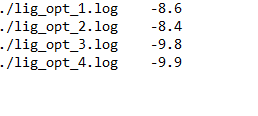

## Discusión


Los resultados obtenidos en AutoDock Vina representan los valores de energía de unión (binding energy) entre los ligandos y la proteína 6W63. Estos valores se expresan en unidades de energía y proporcionan una medida de la afinidad entre el ligando y la proteína. Cuanto más negativo sea el valor de energía de unión, mayor será la afinidad del ligando hacia la proteína.

En este caso, los resultados muestran los valores de energía de unión para cuatro ligandos diferentes, donde se indica el nombre del archivo de registro (log file) correspondiente a cada ligando y el valor de energía obtenido.

./lig_opt_1.log: Energía de unión: -8.6
./lig_opt_2.log: Energía de unión: -8.4
./lig_opt_3.log: Energía de unión: -9.8
./lig_opt_4.log: Energía de unión: -9.9


Los valores negativos indican una interacción favorable entre los ligandos y la proteína, es decir, una mayor afinidad de unión. Los ligandos 3 y 4 presentan los valores más negativos de energía de unión, lo que sugiere una mayor afinidad hacia la proteína 6W63 en comparación con los ligandos 1 y 2.

El uso de un modelo LSTM (Long Short-Term Memory) en el reconocimiento de docking molecular y en la generación de ligandos moleculares ofrece diversas oportunidades y un valor agregado significativo en el campo de la investigación en proteínas, especialmente para proteasas de interés como el COVID-19:

1. Capacidad para capturar secuencias y relaciones temporales: Los modelos LSTM demuestran ser especialmente efectivos en la captura de patrones y relaciones a lo largo del tiempo. En el contexto del reconocimiento de docking molecular, esto resulta relevante al considerar la secuencia de interacciones entre el ligando y la proteína objetivo, mejorando así la precisión y la capacidad predictiva del modelo.


2. Manejo de secuencias de longitud variable: Los modelos LSTM son apropiados para trabajar con secuencias de longitud variable, lo cual es particularmente relevante en el ámbito de las proteínas, donde las secuencias de aminoácidos pueden variar en longitud. Esta característica permite un procesamiento eficiente y preciso de las secuencias de proteínas y ligandos durante el reconocimiento de docking y la generación de ligandos.

3. Generación de ligandos moleculares personalizados: La utilización de un modelo LSTM generativo posibilita la generación de nuevos ligandos moleculares basados en el conocimiento adquirido a partir de los datos de entrenamiento. Esta capacidad resulta útil en la exploración de nuevas estructuras moleculares con potencial actividad contra proteasas de interés, como el COVID-19. La validación de estos ligandos generados mediante herramientas como AutoDock Vina permite evaluar su potencial de unión y afinidad con la proteína objetivo.

4. Optimización y ahorro de tiempo: El enfoque basado en modelos LSTM reduce la necesidad de llevar a cabo un gran número de experimentos de docking molecular y síntesis de ligandos en el laboratorio, lo cual puede resultar costoso y llevar mucho tiempo. Esto permite una exploración más ágil y eficiente de una amplia variedad de posibles ligandos, incrementando así la eficacia del proceso de diseño de fármacos.